In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from statistics import LinearRegression
from scipy.stats import expon, chi2, chi2_contingency, chisquare
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, r2_score
from scipy import stats

In [165]:
df = pd.read_csv('Base de Datos.csv', delimiter=';')

In [166]:
df.head()

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
0,2023,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,71,2393
1,2023,2,7,PARVULARIO LAS ESPIGUITAS,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,15,530
2,2023,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,27,1078
3,2023,4,3,LICEO OCTAVIO PALMA PEREZ,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,69,2727
4,2023,5,1,JOVINA NARANJO FERNANDEZ,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,63,2414


In [167]:
df.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A',
       'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD',
       'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'DC_A', 'HH_A', 'DC_UTP', 'HH_UTP', 'DC_PDIR', 'HH_PDIR', 'DC_DIR',
       'HH_DIR', 'DC_OES', 'HH_OES', 'DC_OF', 'HH_OF', 'DC_JUTP', 'HH_JUTP',
       'DC_IG', 'HH_IG', 'DC_OR', 'HH_OR', 'DC_DIR_SOST', 'HH_DIR_SOST',
       'DC_TP_SOST', 'HH_TP_SOST', 'DC_SUP_SOST', 'HH_SUP_SOST', 'DC_SUBDIR',
       'HH_SUBDIR', 'DC_PROF_ENC', 'HH_PROF_ENC', 'DC_EDUC_TRAD',
       'HH_EDUC_TRAD', 'DC_TOT', 'HH_TOT'],
      dtype='object')

In [168]:
df.describe()

,AGNO,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
count,16654.00,16654.00,16654.00,16654.00,16654.00,16654.00,16654.00,16654.00,16654.00,16654.00,...,16654.00,16654.00,16654.00,16654.00,16654.00,16654.00,16654.00,16654.00,16654.00,16654.00
mean,2023.00,13463.83,4.51,9.25,94.46,9452.49,91.81,2.81,1.88,0.30,...,0.01,0.21,0.05,2.02,0.12,5.35,0.04,1.16,16.75,625.70
std,0.00,10676.37,2.87,3.81,37.83,3785.18,36.28,1.03,0.93,0.46,...,0.08,3.28,0.25,10.61,0.33,14.31,0.28,9.61,23.11,892.99
min,2023.00,1.00,0.00,1.00,11.00,1101.00,11.00,1.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2023.00,5012.50,2.00,6.00,61.00,6116.00,61.00,2.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2023.00,10443.50,5.00,9.00,91.00,9117.00,92.00,3.00,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,219.00
75%,2023.00,20328.75,7.00,13.00,131.00,13119.00,133.00,3.00,2.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.00,950.00
max,2023.00,42192.00,9.00,16.00,163.00,16305.00,151.00,6.00,5.00,1.00,...,2.00,88.00,7.00,289.00,1.00,44.00,13.00,548.00,255.00,11192.00


In [169]:
df['NOM_REG_RBD_A'].unique()

array(['AYP', 'TPCA', 'ANTOF', 'ATCMA', 'COQ', 'VALPO', 'RM', 'LGBO',
       'MAULE', 'NUBLE', 'BBIO', 'ARAUC', 'RIOS', 'LAGOS', 'AYSEN', 'MAG'],
      dtype=object)

In [170]:
df_regiones = df[(df['NOM_REG_RBD_A'] == 'RM') | (df['NOM_REG_RBD_A'] == 'NUBLE')]
df_regiones

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
1330,2023,1646,2,COLEGIO CRISTIANO SAN LUCAS,13,RM,131,13126,QUINTA NORMAL,134,...,0,0,0,0,0,0,0,0,0,0
2935,2023,3638,2,LICEO BICENTENARIO MARTA BRUNET CÁRAVES,16,NUBLE,161,16101,CHILLÁN,81,...,0,0,0,0,0,0,0,0,83,2849
2936,2023,3639,0,LICEO NARCISO TONDREAU,16,NUBLE,161,16101,CHILLÁN,81,...,0,0,0,0,0,0,0,0,85,2889
2937,2023,3640,4,INSTITUTO SUPERIOR DE COMERCIO PROFESOR FERNAN...,16,NUBLE,161,16101,CHILLÁN,81,...,0,0,0,0,0,0,0,0,39,1278
2938,2023,3641,2,INSTITUTO INDUSTRIAL SUPERIOR DE CHILLÁN,16,NUBLE,161,16101,CHILLÁN,81,...,0,0,0,0,0,0,0,0,47,1718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16642,2023,42175,8,JARDIN INFANTIL KIDDY NEST PRESCHOOL,13,RM,131,13114,LAS CONDES,133,...,0,0,0,0,0,0,0,0,0,0
16647,2023,42182,0,SALA CUNA Y JARDIN INFANTIL COUNTRYSIDE PRESCHOOL,13,RM,133,13301,COLINA,137,...,0,0,0,0,0,0,0,0,0,0
16648,2023,42183,9,SALA CUNA Y JARDIN INFANTIL MUNAY MONTESSORI,13,RM,131,13114,LAS CONDES,133,...,0,0,0,0,0,0,0,0,0,0
16649,2023,42184,7,SALA CUNA Y JARDIN INFANTIL EL BOSQUE DE LOS E...,13,RM,131,13114,LAS CONDES,133,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df_stgo= df[(df['NOM_REG_RBD_A'] == 'RM')]
df_stgo

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
1330,2023,1646,2,COLEGIO CRISTIANO SAN LUCAS,13,RM,131,13126,QUINTA NORMAL,134,...,0,0,0,0,0,0,0,0,0,0
5649,2023,6880,2,COLEGIO ANGLO AMERICAN INTERNATIONAL,13,RM,131,13115,LO BARNECHEA,133,...,0,0,0,0,0,0,0,0,0,0
6994,2023,8485,9,LICEO INSTITUTO NACIONAL,13,RM,131,13101,SANTIAGO,131,...,0,0,0,0,0,0,0,0,220,8681
6996,2023,8487,5,LICEO JAVIERA CARRERA,13,RM,131,13101,SANTIAGO,131,...,0,0,1,44,0,0,0,0,150,6024
6997,2023,8488,3,LICEO N° 4 BICENTENARIO ISAURA DINATOR,13,RM,131,13101,SANTIAGO,131,...,0,0,0,0,0,0,0,0,37,1277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16642,2023,42175,8,JARDIN INFANTIL KIDDY NEST PRESCHOOL,13,RM,131,13114,LAS CONDES,133,...,0,0,0,0,0,0,0,0,0,0
16647,2023,42182,0,SALA CUNA Y JARDIN INFANTIL COUNTRYSIDE PRESCHOOL,13,RM,133,13301,COLINA,137,...,0,0,0,0,0,0,0,0,0,0
16648,2023,42183,9,SALA CUNA Y JARDIN INFANTIL MUNAY MONTESSORI,13,RM,131,13114,LAS CONDES,133,...,0,0,0,0,0,0,0,0,0,0
16649,2023,42184,7,SALA CUNA Y JARDIN INFANTIL EL BOSQUE DE LOS E...,13,RM,131,13114,LAS CONDES,133,...,0,0,0,0,0,0,0,0,0,0


In [172]:
df_nuble= df[(df['NOM_REG_RBD_A'] == 'NUBLE')]
df_nuble

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
2935,2023,3638,2,LICEO BICENTENARIO MARTA BRUNET CÁRAVES,16,NUBLE,161,16101,CHILLÁN,81,...,0,0,0,0,0,0,0,0,83,2849
2936,2023,3639,0,LICEO NARCISO TONDREAU,16,NUBLE,161,16101,CHILLÁN,81,...,0,0,0,0,0,0,0,0,85,2889
2937,2023,3640,4,INSTITUTO SUPERIOR DE COMERCIO PROFESOR FERNAN...,16,NUBLE,161,16101,CHILLÁN,81,...,0,0,0,0,0,0,0,0,39,1278
2938,2023,3641,2,INSTITUTO INDUSTRIAL SUPERIOR DE CHILLÁN,16,NUBLE,161,16101,CHILLÁN,81,...,0,0,0,0,0,0,0,0,47,1718
2939,2023,3642,0,INSTITUTO TÉCNICO MABEL CONDEMARÍN GRIMBERG,16,NUBLE,161,16101,CHILLÁN,81,...,0,0,0,0,0,0,0,0,28,882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16548,2023,42016,6,SALA CUNA Y JARDIN INFANTIL PASITOS AL FUTURO,16,NUBLE,161,16101,CHILLÁN,81,...,0,0,0,0,0,0,0,0,0,0
16557,2023,42032,8,COLEGIO HUELLAS,16,NUBLE,161,16101,CHILLÁN,81,...,0,0,0,0,0,0,0,0,6,210
16564,2023,42039,5,ESCUELA ESPECIAL DE LENGUAJE SEMILLAS DE ÑUBLE,16,NUBLE,161,16101,CHILLÁN,81,...,0,0,0,0,0,0,0,0,0,0
16579,2023,42065,4,JARDIN INFANTIL TIC TAC,16,NUBLE,163,16301,SAN CARLOS,81,...,0,0,0,0,0,0,0,0,0,0


**Limpieza de datos**


In [173]:
df_regiones.isnull().sum().head()

AGNO           0
RBD            0
DGV_RBD        0
NOM_RBD        9
COD_REG_RBD    0
dtype: int64

In [174]:
df_regiones.dtypes

AGNO               int64
RBD                int64
DGV_RBD            int64
NOM_RBD           object
COD_REG_RBD        int64
NOM_REG_RBD_A     object
COD_PRO_RBD        int64
COD_COM_RBD        int64
NOM_COM_RBD       object
COD_DEPROV_RBD     int64
NOM_DEPROV_RBD    object
COD_DEPE           int64
COD_DEPE2          int64
RURAL_RBD          int64
ESTADO_ESTAB       int64
DC_A               int64
HH_A               int64
DC_UTP             int64
HH_UTP             int64
DC_PDIR            int64
HH_PDIR            int64
DC_DIR             int64
HH_DIR             int64
DC_OES             int64
HH_OES             int64
DC_OF              int64
HH_OF              int64
DC_JUTP            int64
HH_JUTP            int64
DC_IG              int64
HH_IG              int64
DC_OR              int64
HH_OR              int64
DC_DIR_SOST        int64
HH_DIR_SOST        int64
DC_TP_SOST         int64
HH_TP_SOST         int64
DC_SUP_SOST        int64
HH_SUP_SOST        int64
DC_SUBDIR          int64


-A mi parecer estan todas ok, la unica rara es HH_A_BINARIO que no se que es y está como float

In [175]:
valores = ["na", "Na", "NA", "nA", "nn", "Nn", "NN", "cero", "nan", "", " ", "  "]
conteo = {columna: 0 for columna in df_regiones.columns}

for columna in df_regiones.columns:
    for index, value in df_regiones[columna].items():
      if value in valores:
            conteo[columna] += 1

for columna, conteo in conteo.items():
    print(f'Columna: {columna}, Total de valores encontrados: {conteo}')


Columna: AGNO, Total de valores encontrados: 0
Columna: RBD, Total de valores encontrados: 0
Columna: DGV_RBD, Total de valores encontrados: 0
Columna: NOM_RBD, Total de valores encontrados: 0
Columna: COD_REG_RBD, Total de valores encontrados: 0
Columna: NOM_REG_RBD_A, Total de valores encontrados: 0
Columna: COD_PRO_RBD, Total de valores encontrados: 0
Columna: COD_COM_RBD, Total de valores encontrados: 0
Columna: NOM_COM_RBD, Total de valores encontrados: 0
Columna: COD_DEPROV_RBD, Total de valores encontrados: 0
Columna: NOM_DEPROV_RBD, Total de valores encontrados: 0
Columna: COD_DEPE, Total de valores encontrados: 0
Columna: COD_DEPE2, Total de valores encontrados: 0
Columna: RURAL_RBD, Total de valores encontrados: 0
Columna: ESTADO_ESTAB, Total de valores encontrados: 0
Columna: DC_A, Total de valores encontrados: 0
Columna: HH_A, Total de valores encontrados: 0
Columna: DC_UTP, Total de valores encontrados: 0
Columna: HH_UTP, Total de valores encontrados: 0
Columna: DC_PDIR, T

In [176]:
for columna in df_regiones.columns:
    valores_unicos = df_regiones[columna].unique()
    print(f"Valores únicos en la columna '{columna}': {valores_unicos}")

Valores únicos en la columna 'AGNO': [2023]
Valores únicos en la columna 'RBD': [ 1646  3638  3639 ... 42183 42184 42192]
Valores únicos en la columna 'DGV_RBD': [2 0 4 9 7 5 3 1 8 6]
Valores únicos en la columna 'NOM_RBD': ['COLEGIO CRISTIANO SAN LUCAS' 'LICEO BICENTENARIO MARTA BRUNET CÁRAVES'
 'LICEO NARCISO TONDREAU' ...
 'SALA CUNA Y JARDIN INFANTIL MUNAY MONTESSORI'
 'SALA CUNA Y JARDIN INFANTIL EL BOSQUE DE LOS ENANITOS'
 'JARDIN INFANTIL GARDEN KIDS']
Valores únicos en la columna 'COD_REG_RBD': [13 16]
Valores únicos en la columna 'NOM_REG_RBD_A': ['RM' 'NUBLE']
Valores únicos en la columna 'COD_PRO_RBD': [131 161 163 162 134 135 132 133 136]
Valores únicos en la columna 'COD_COM_RBD': [13126 16101 16103 16305 16301 16303 16304 16302 16106 16108 16104 16109
 16105 16102 16107 16206 16205 16203 16207 16202 16201 16204 13115 13101
 13127 13108 13119 13106 13102 13123 13125 13401 13105 13110 13104 13120
 13114 13132 13503 13113 13129 13118 13122 13201 13130 13121 13111 13109
 1311

In [177]:
filas_duplicadas = df_regiones[df_regiones.duplicated()]

if filas_duplicadas.empty:
    print("No hay filas duplicadas.")
else:
    print("Filas duplicadas encontradas:")
    print(filas_duplicadas)

No hay filas duplicadas.


**3.1 Pregunta 0 (descripción de variables)**

Con el objetivo de familiarizarse y entender mejor la base de datos, se requiere realizar un analisis de esta.

1. Generar un grafico por cada una de las variables. El grafico debe tener un tıtulo descriptivo y debe mostrar
informacion clara de la variable.

2. Se debe indicar por cada una de las variables su tipo (cuantitativa o cualitativa) justificando su decision. Se
debe recordar que el tipo de variable depende de su naturaleza, no del formato en el que se encuentre en la
base de datos.

**LAS VARIABLES SON DE TIPO:**


AGNO (Año de la información): Cuantitativa

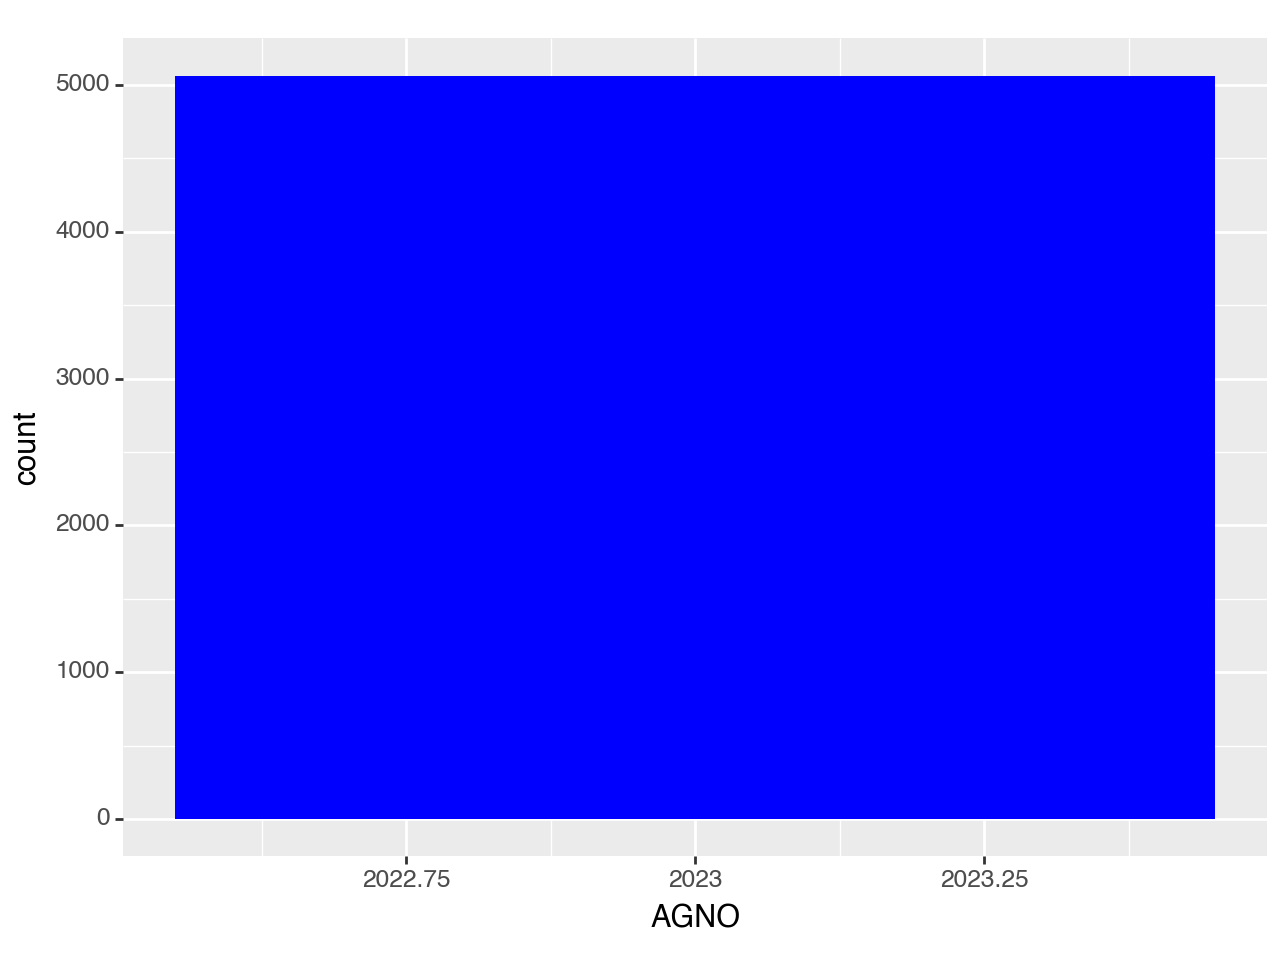

<Figure Size: (640 x 480)>

In [178]:
#1
(ggplot(df_regiones)+
 aes(x="AGNO")+
 geom_bar(fill="blue")
)

RBD(Rol Base de Datos del establecimiento): Cuantitativa

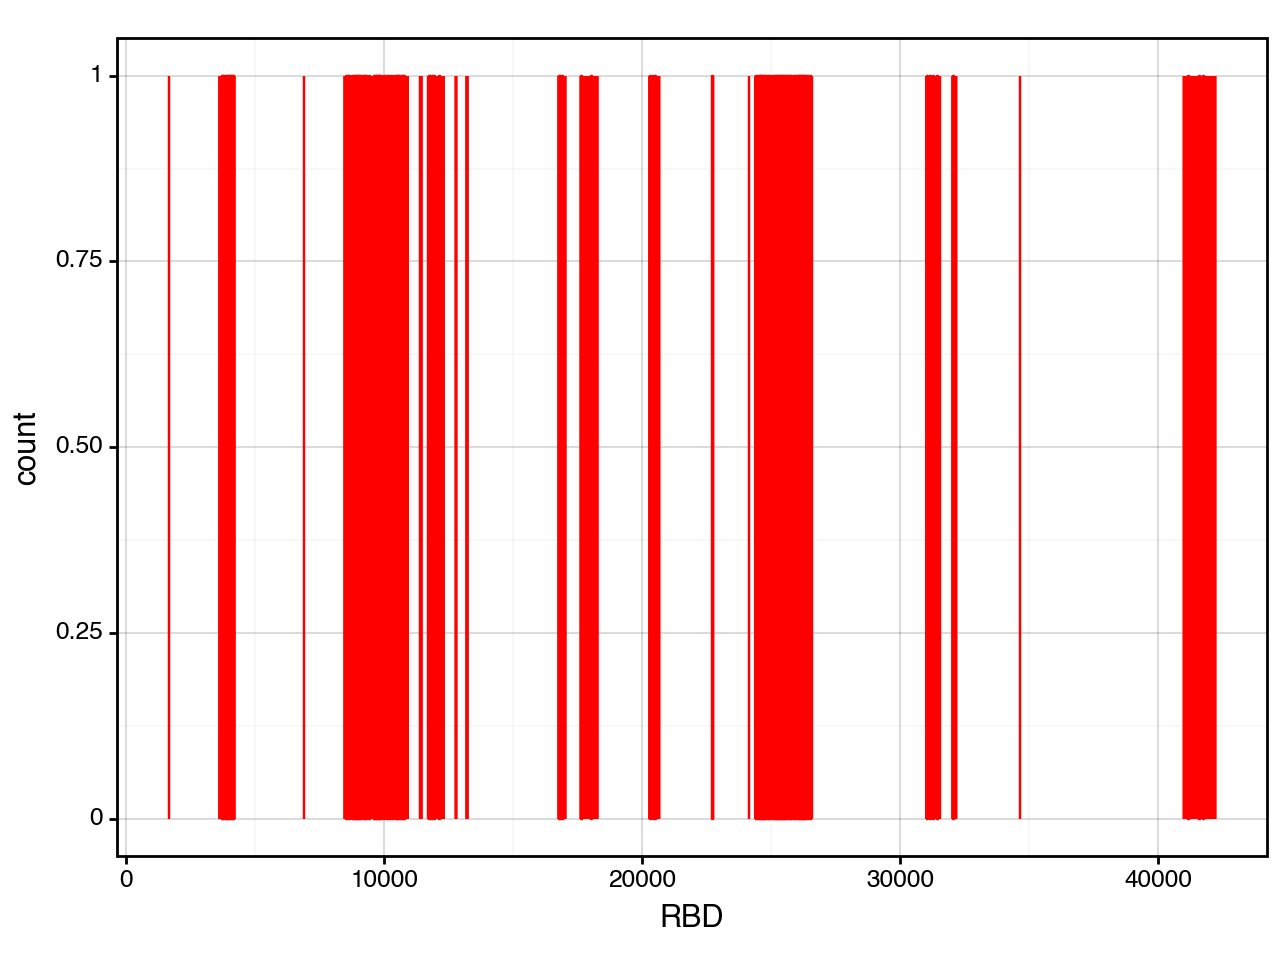

<Figure Size: (640 x 480)>

In [179]:
(ggplot(df_regiones)+
 aes(x="RBD", )+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DGV_RBD(Dígito verificador del RBD): Cualitativa

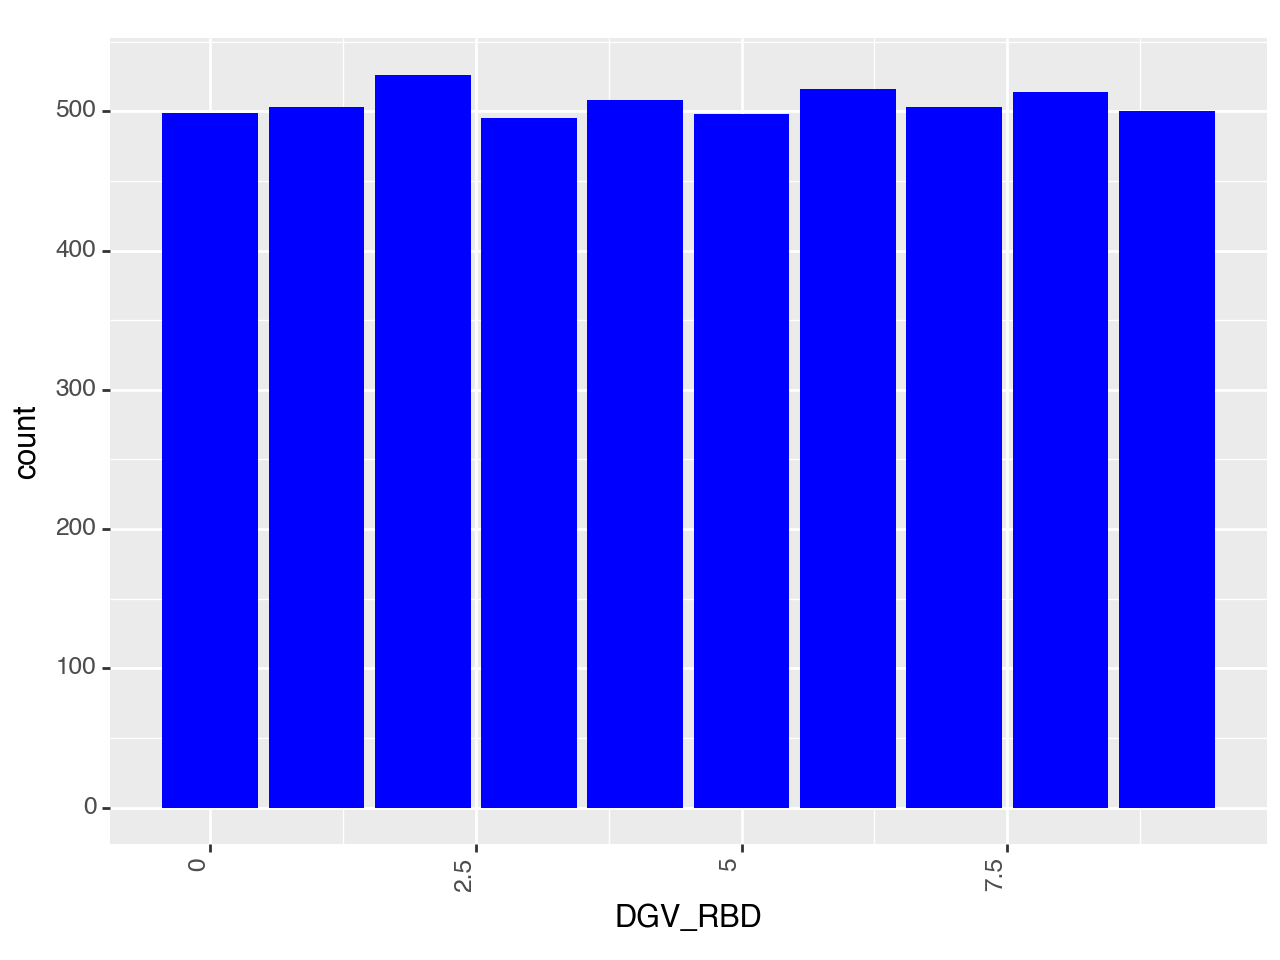

<Figure Size: (640 x 480)>

In [180]:
#3
(ggplot(df_regiones)+
 aes(x="DGV_RBD")+
 geom_bar(fill="blue")+
 theme(axis_text_x=element_text(angle=90,hjust=1)))


NOM_RBD(Nombre del establecimiento): Cualitativa

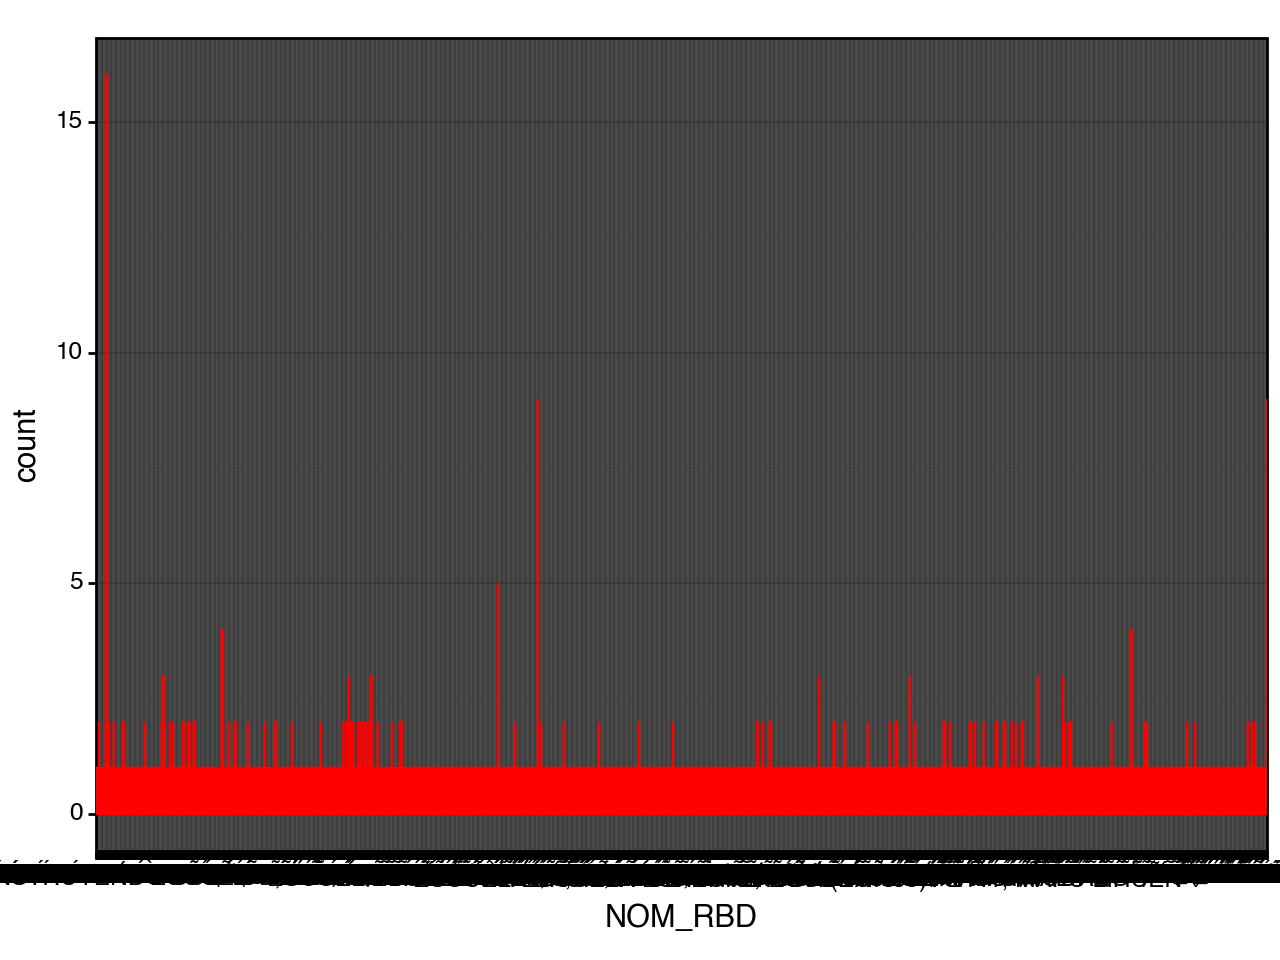

<Figure Size: (640 x 480)>

In [181]:
(ggplot(df_regiones)+
 aes(x="NOM_RBD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

COD_REG_RBD(Código de región en que se ubica el establecimiento): Cualitativa

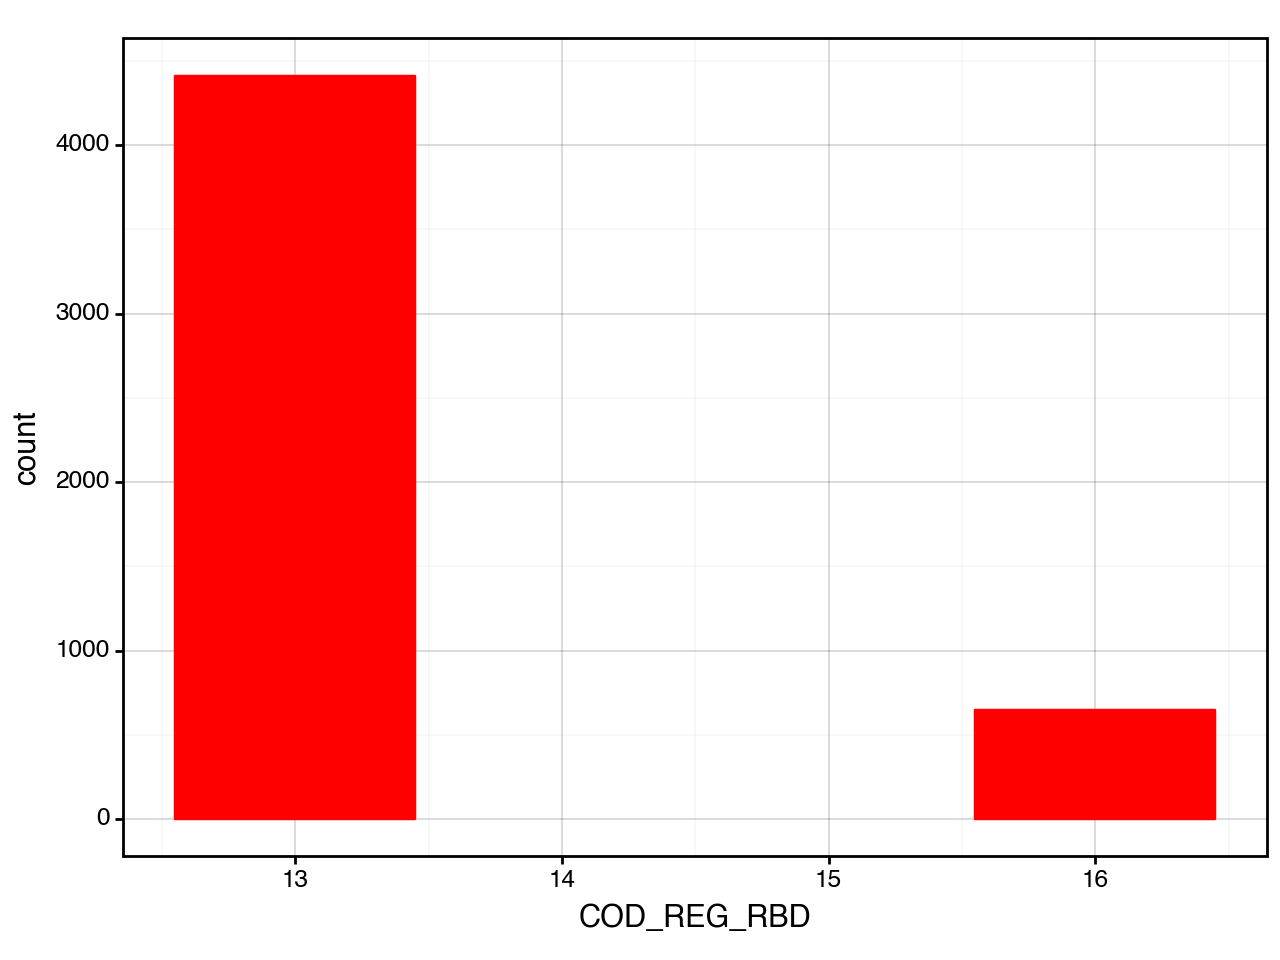

<Figure Size: (640 x 480)>

In [182]:
(ggplot(df_regiones)+
 aes(x="COD_REG_RBD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

NOM_REG_RBD_A(Nombre de la Región abreviado): Cualitativa

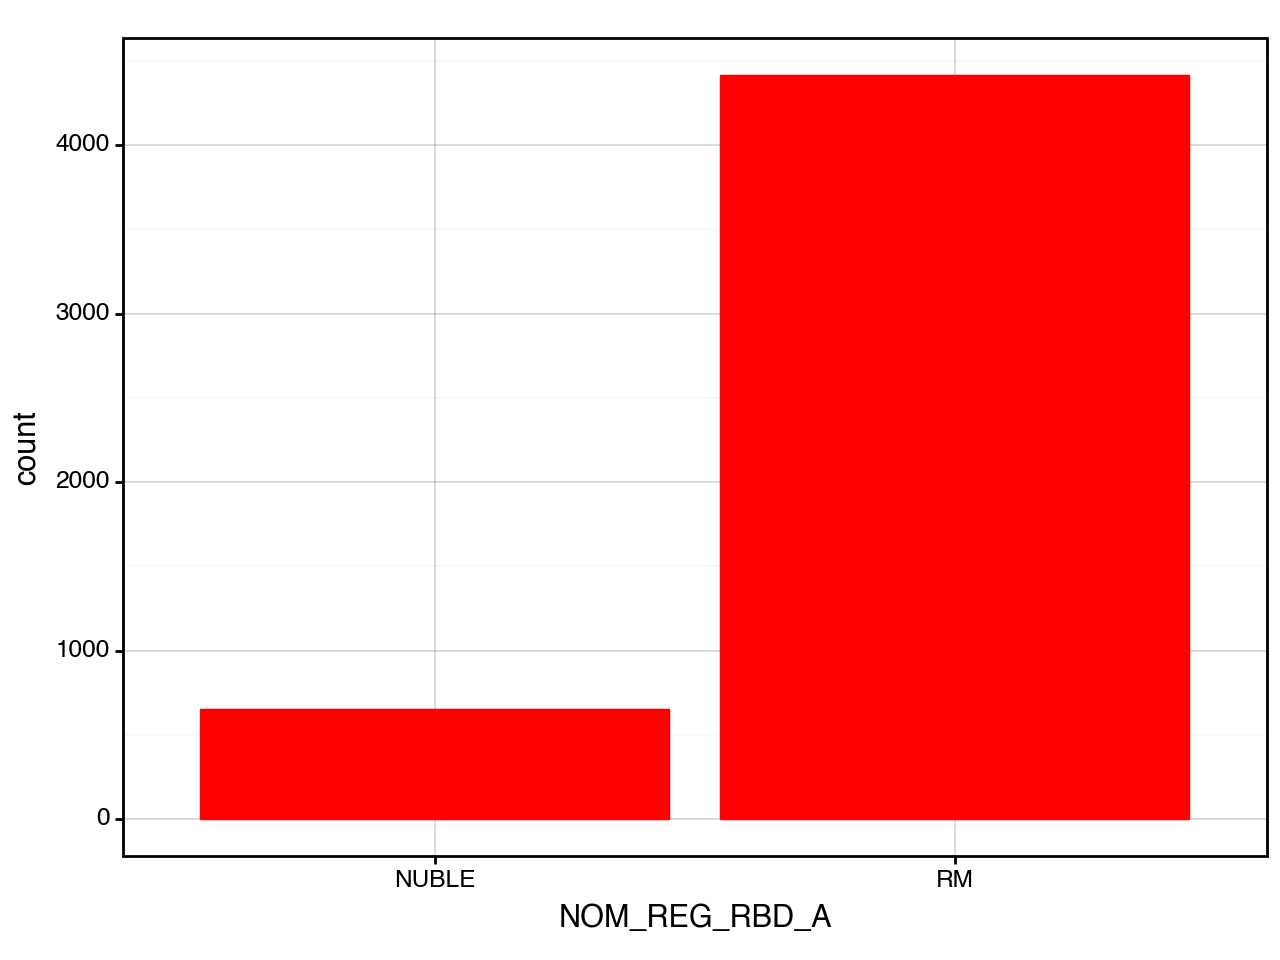

<Figure Size: (640 x 480)>

In [183]:
(ggplot(df_regiones)+
 aes(x="NOM_REG_RBD_A")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

COD_PRO_RBD(Código oficial de provincia en que se ubica el establecimiento): Cualitativa

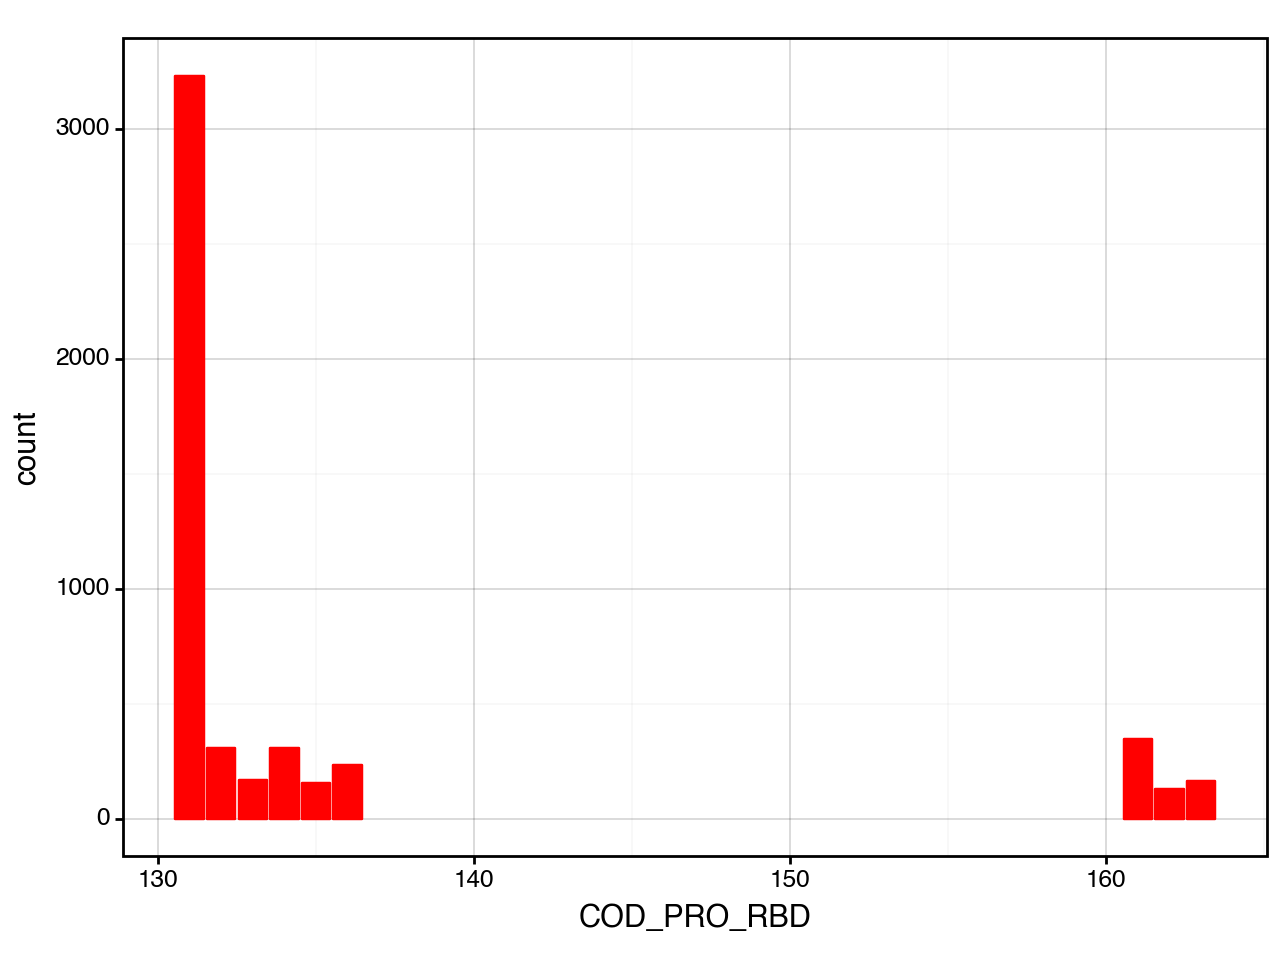

<Figure Size: (640 x 480)>

In [184]:
(ggplot(df_regiones)+
 aes(x="COD_PRO_RBD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

COD_COM_RBD(Código oficial de comuna en que se ubica el establecimiento): Cualitativa

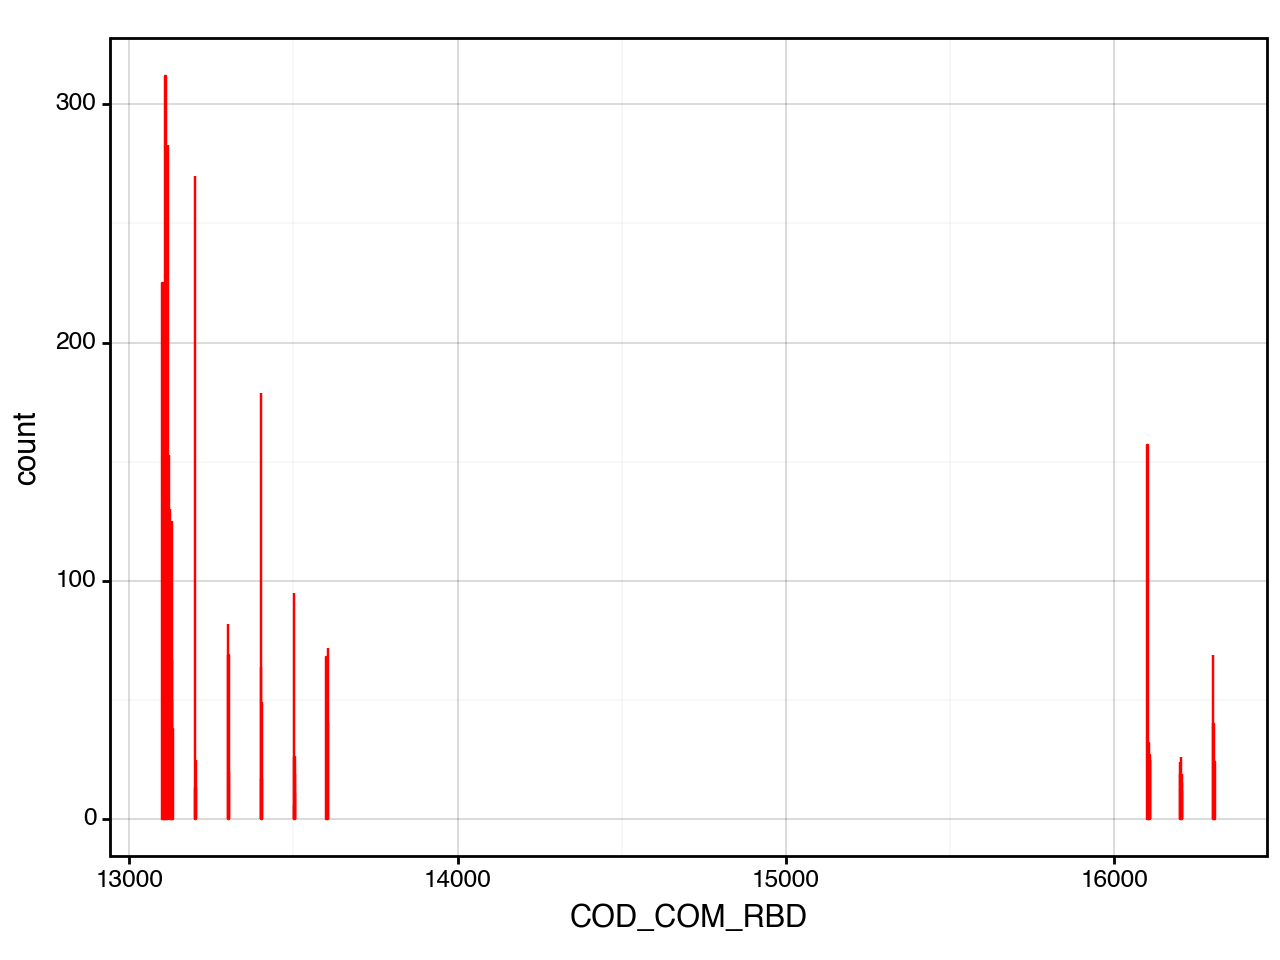

<Figure Size: (640 x 480)>

In [185]:
(ggplot(df_regiones)+
 aes(x="COD_COM_RBD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

NOM_COM_RBD(Nombre de la comuna): Cualitativa

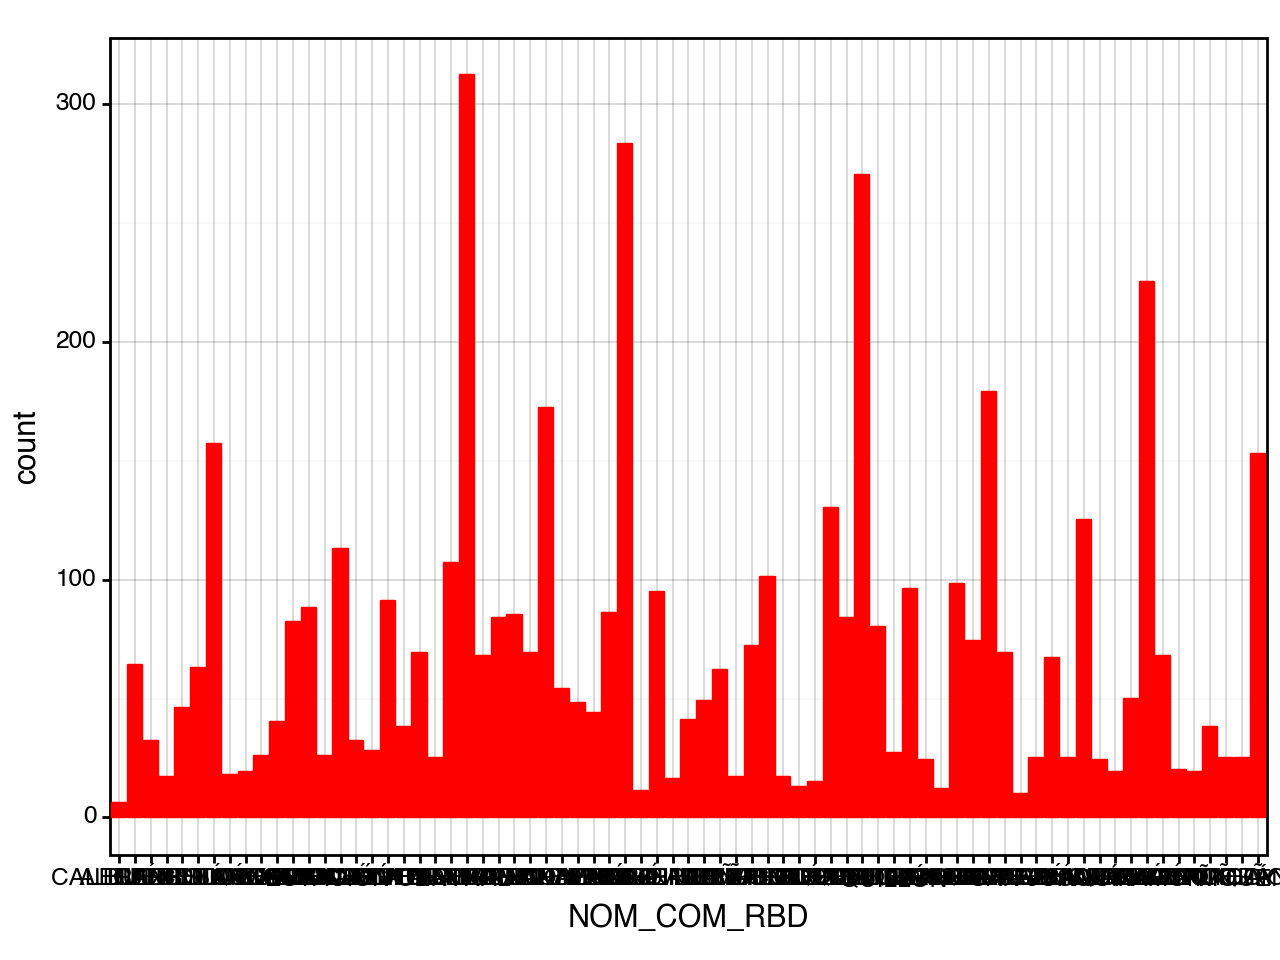

<Figure Size: (640 x 480)>

In [186]:
(ggplot(df_regiones)+
 aes(x="NOM_COM_RBD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

COD_DEPROV_RBD(Código del Departamento Provincial en que se ubica el establecimiento): Cualitativa

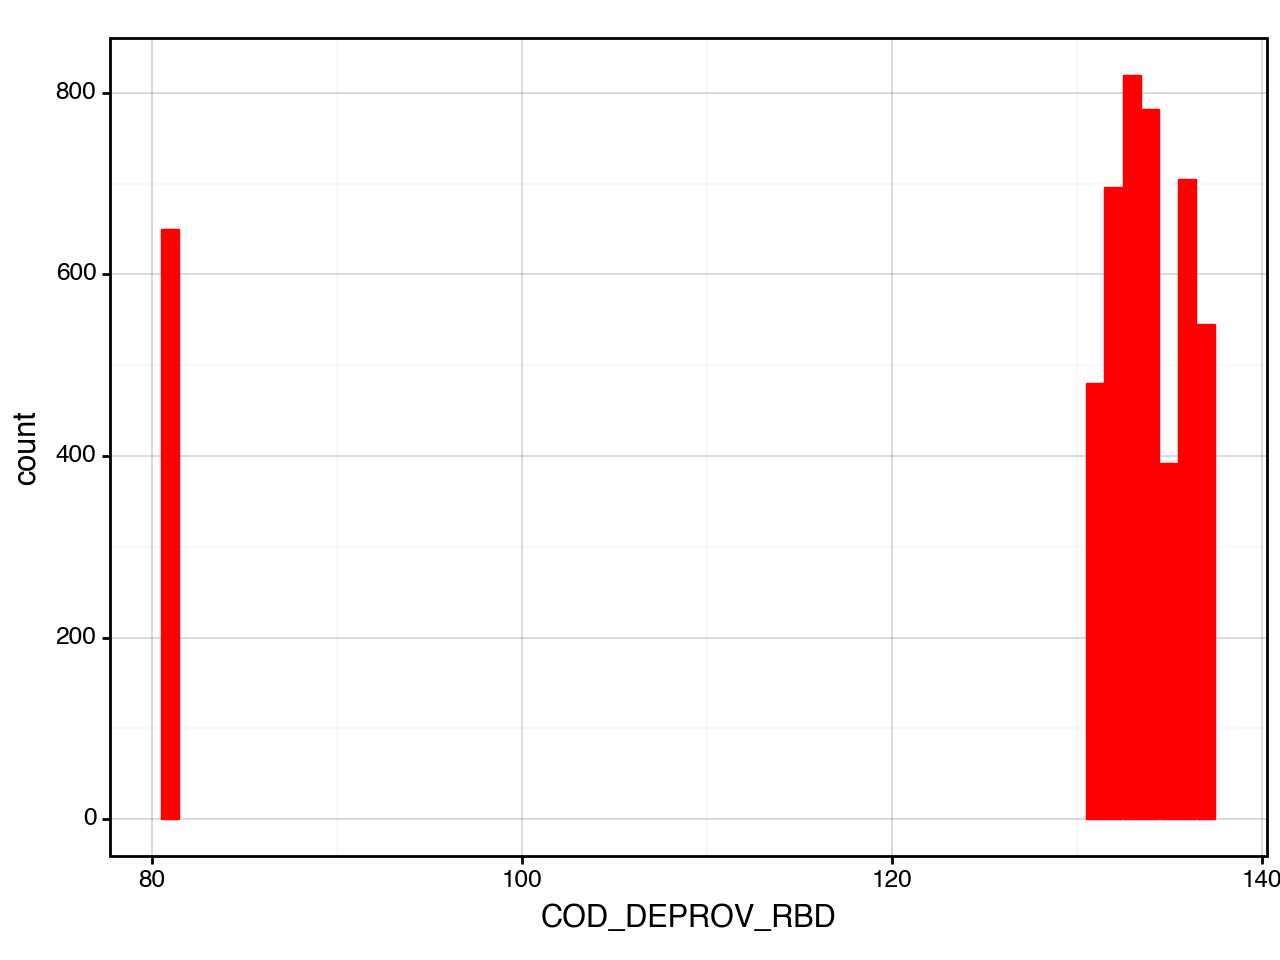

<Figure Size: (640 x 480)>

In [187]:
(ggplot(df_regiones)+
 aes(x="COD_DEPROV_RBD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

NOM_DEPROV_RBD(Nombre del Departamento Provincial en que se ubica el establecimiento): Cualitativa

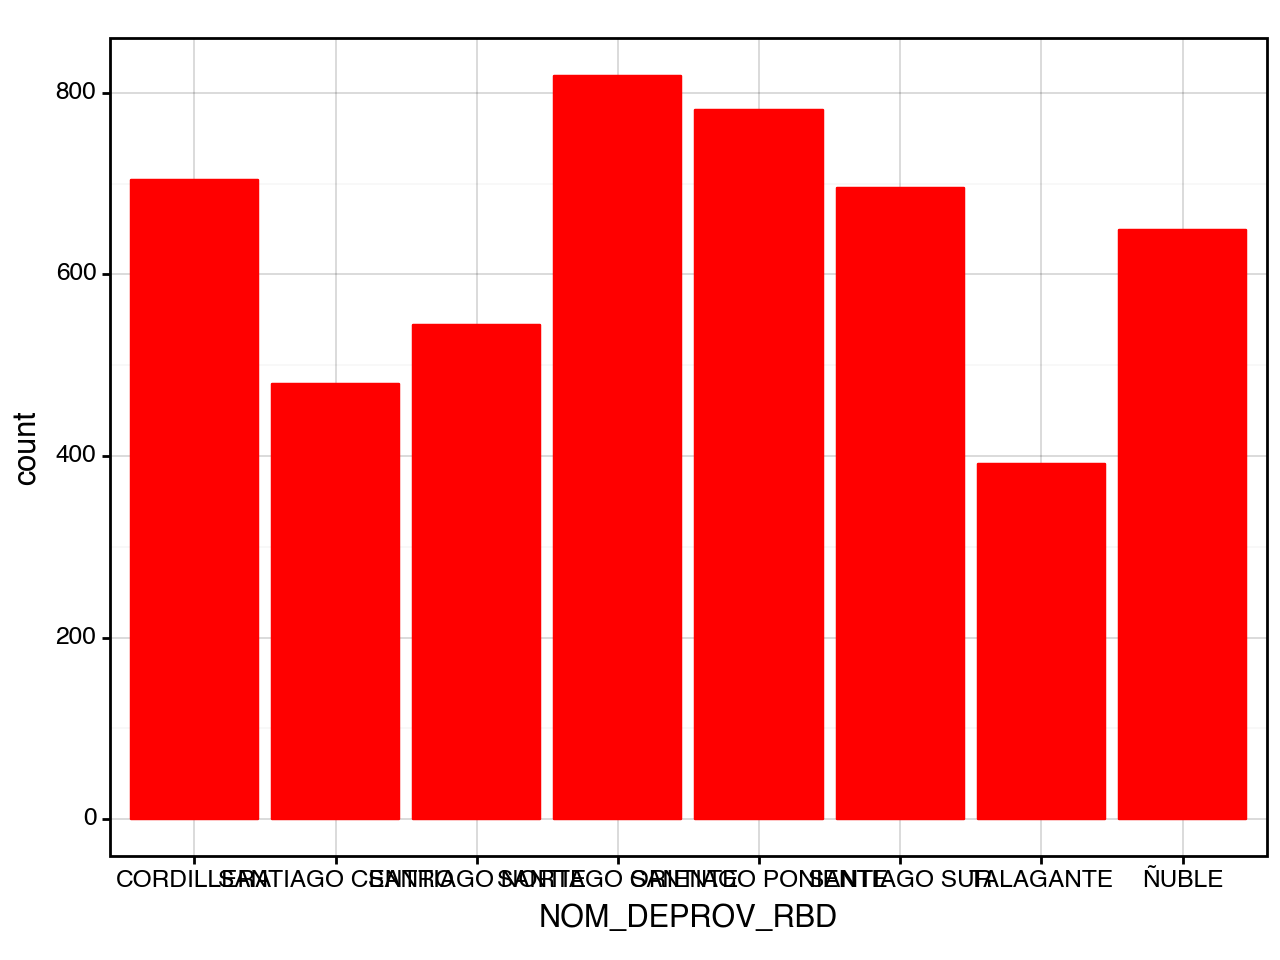

<Figure Size: (640 x 480)>

In [188]:
(ggplot(df_regiones)+
 aes(x="NOM_DEPROV_RBD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

COD_DEPE(Dependencia administrativa del Establecimiento: 1: Corporación Municipal 2: Municipal DAEM 3: Particular Subvencionado 4: Particular Pagado 5: Corporación de Administración Delegada (DL 3166) 6: Servicio Local de Educación 7: JUNJI ): Cualitativa

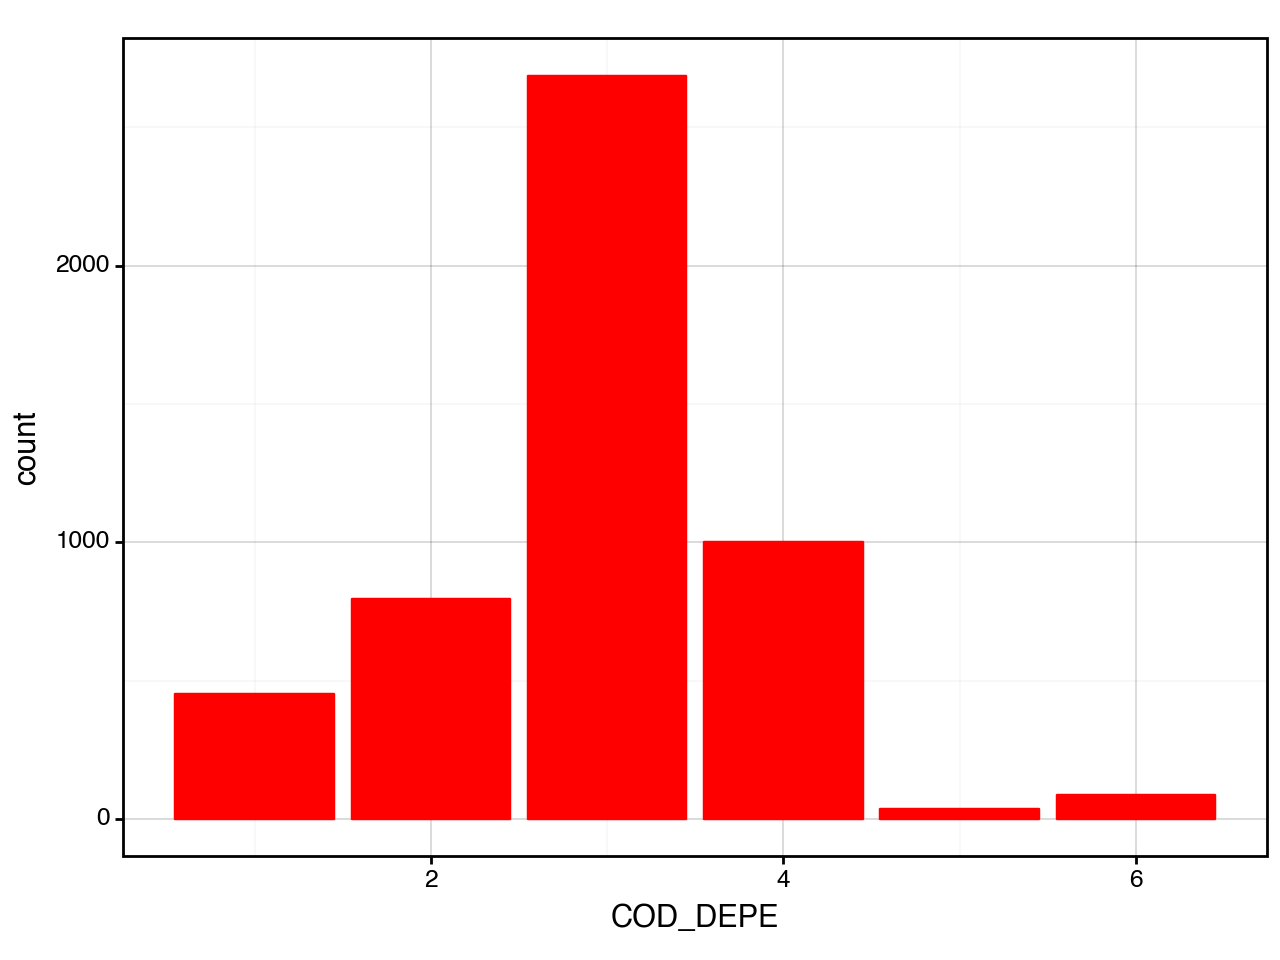

<Figure Size: (640 x 480)>

In [189]:
(ggplot(df_regiones)+
 aes(x="COD_DEPE")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

COD_DEPE2(Código de Dependencia del Establecimiento (agrupado): 1: Municipal 2: Particular Subvencionado 3: Particular Pagado (o no subvencionado) 4: Corporación de Administración Delegada (DL 3166) 5: Servicio Local de Educación 6: JUNJI ): Cualitativa

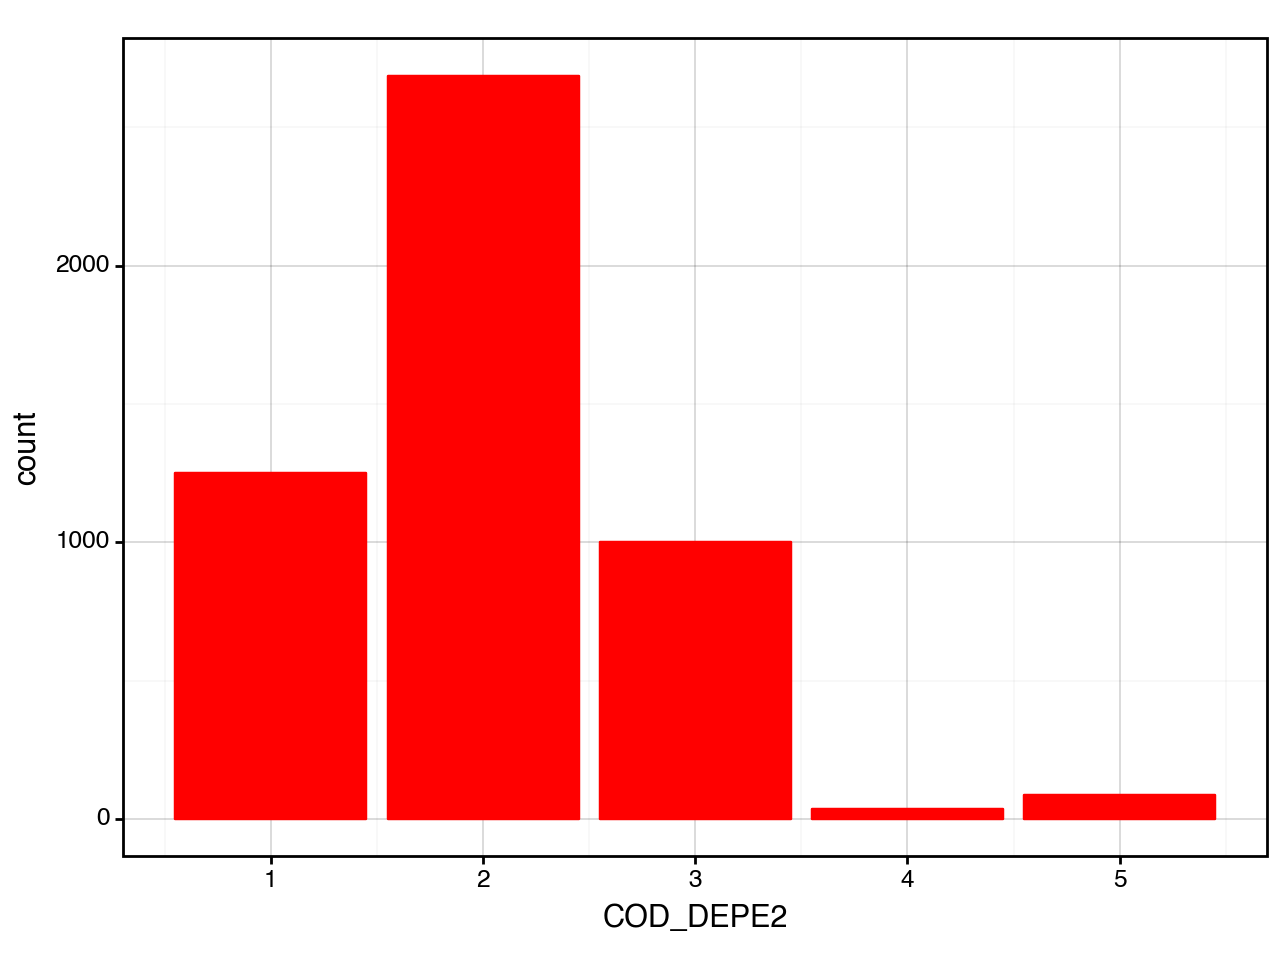

<Figure Size: (640 x 480)>

In [190]:
(ggplot(df_regiones)+
 aes(x="COD_DEPE2")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

RURAL_RBD(Área geográfica en que se ubica el establecimiento 0: Urbana 1: Rural ): Cualitativa

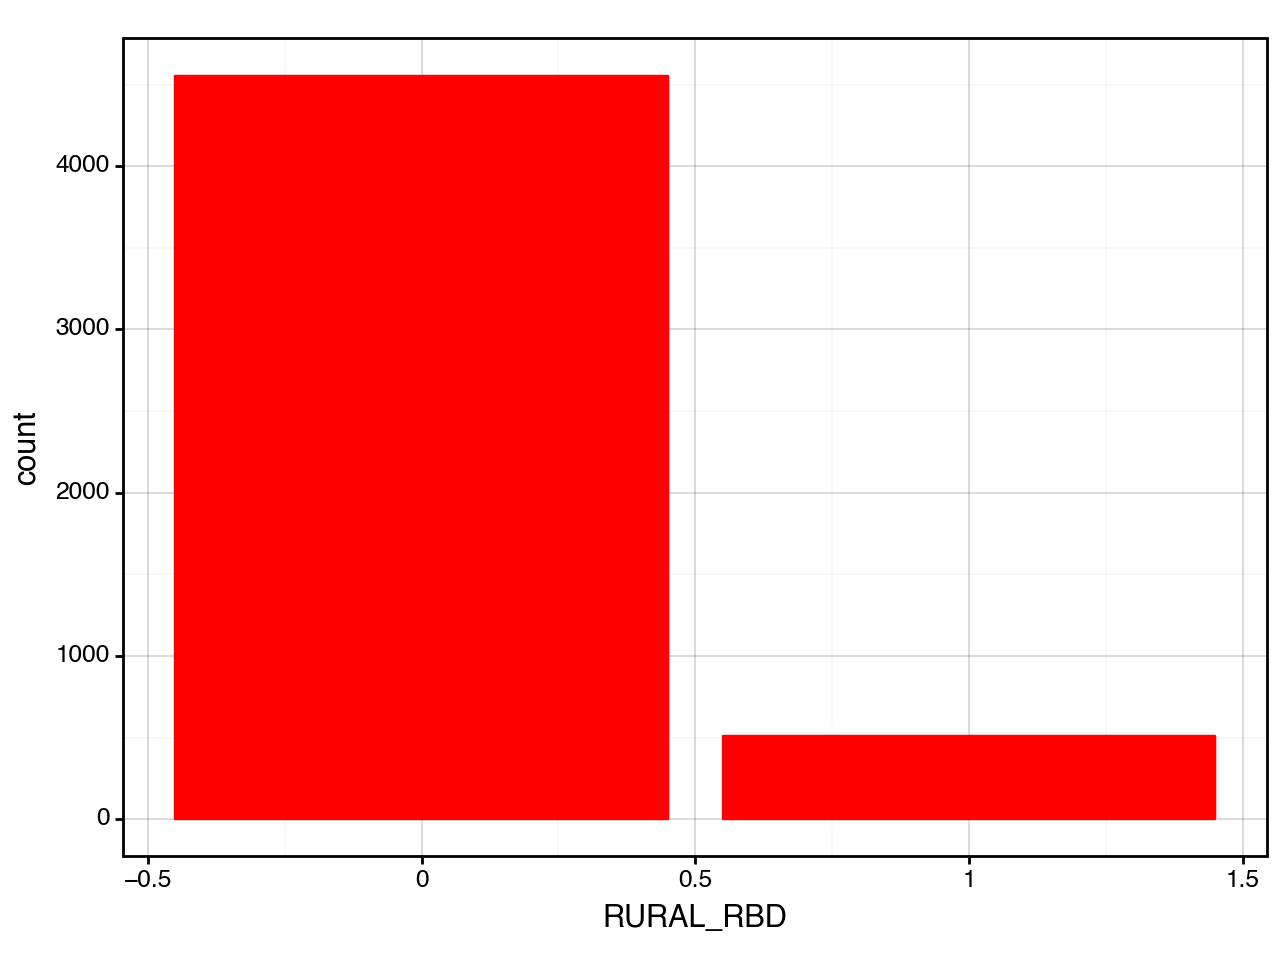

<Figure Size: (640 x 480)>

In [191]:
(ggplot(df_regiones)+
 aes(x="RURAL_RBD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

ESTADO_ESTAB(Estado de funcionamiento del establecimiento 1: Funcionando 2: En Receso 3: Cerrado 4: Autorizado sin Matrícula ): Cualitativa

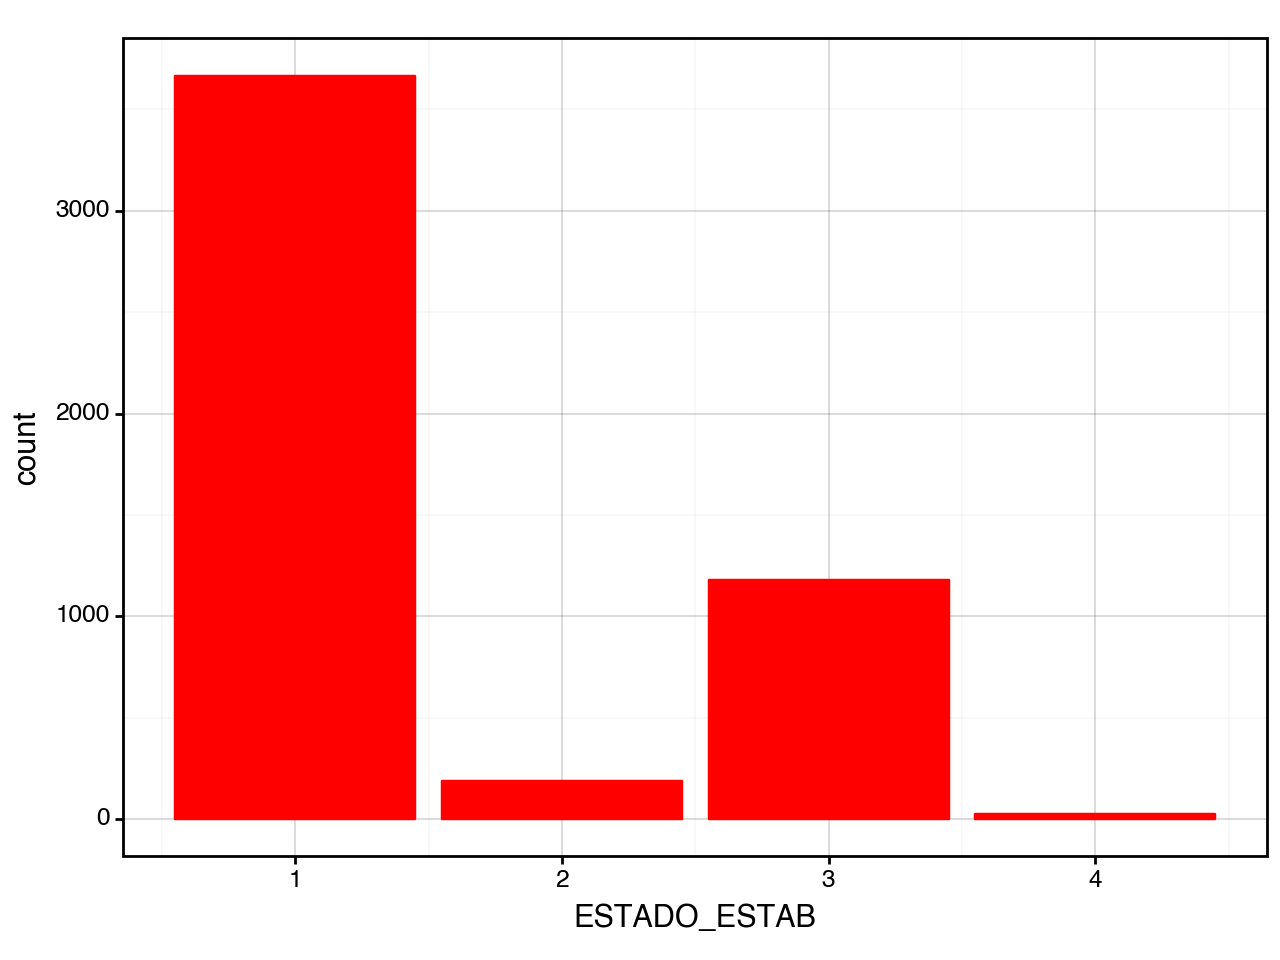

<Figure Size: (640 x 480)>

In [192]:
(ggplot(df_regiones)+
 aes(x="ESTADO_ESTAB")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_A(Total de Docentes de aula): Cuantitativa

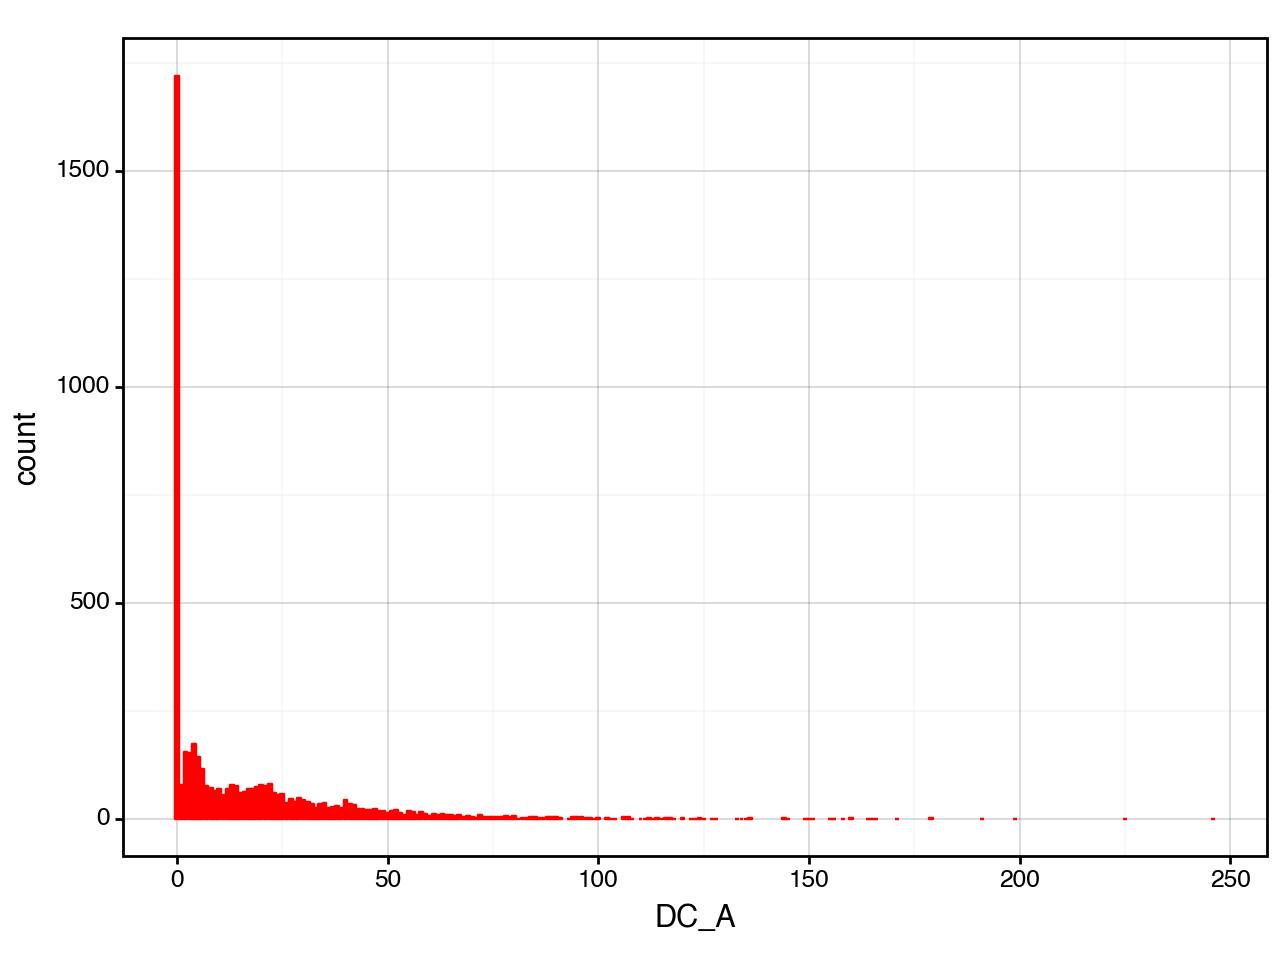

<Figure Size: (640 x 480)>

In [193]:
(ggplot(df_regiones)+
 aes(x="DC_A")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_A(Horas de Contrato de los Docentes de aula): Cuantitativa

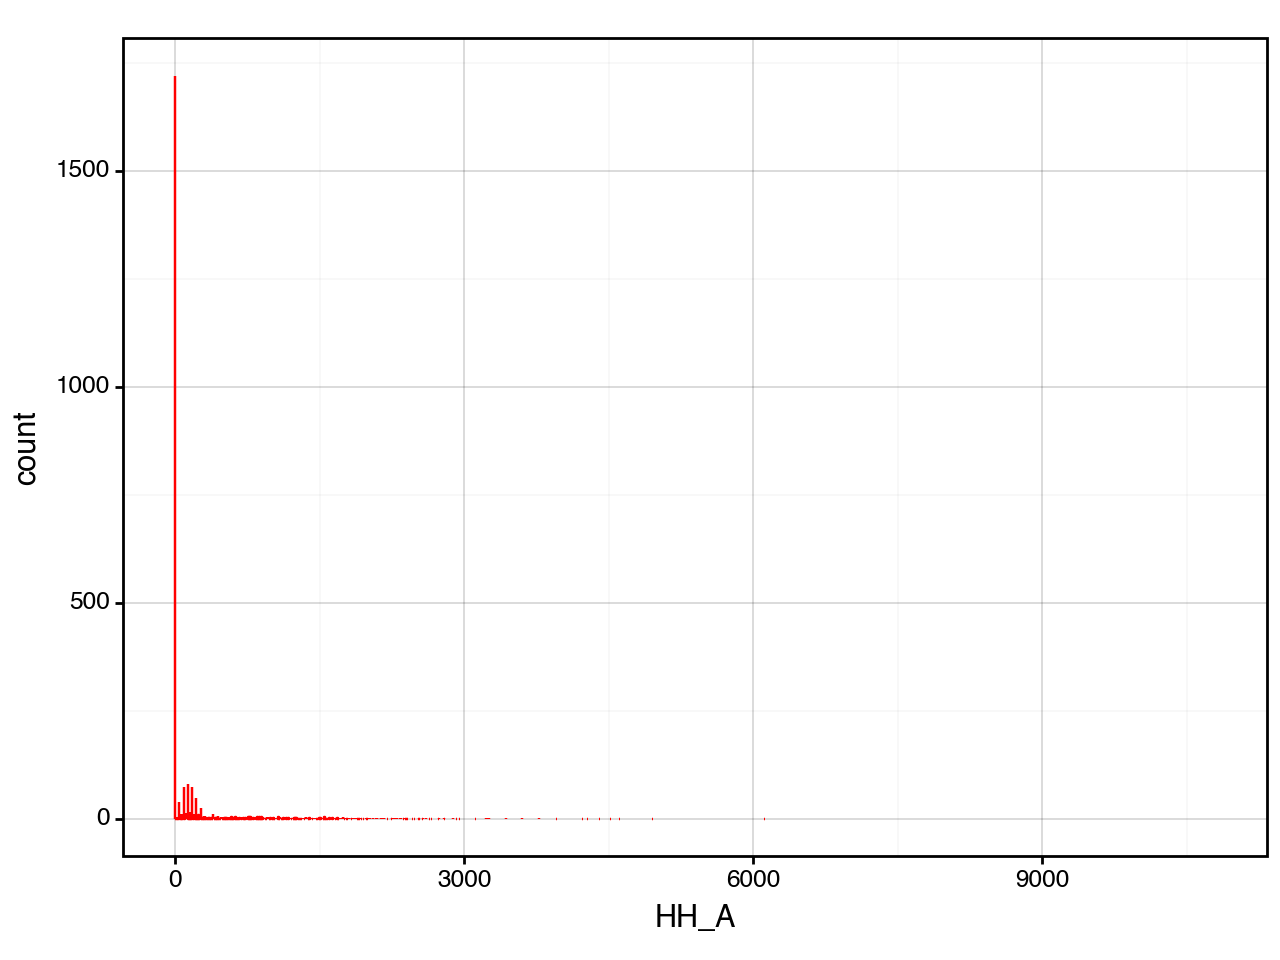

<Figure Size: (640 x 480)>

In [194]:
(ggplot(df_regiones)+
 aes(x="HH_A")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_UTP(Total de Docentes planta Unidad Técnico-Pedagógica): Cuantitativa

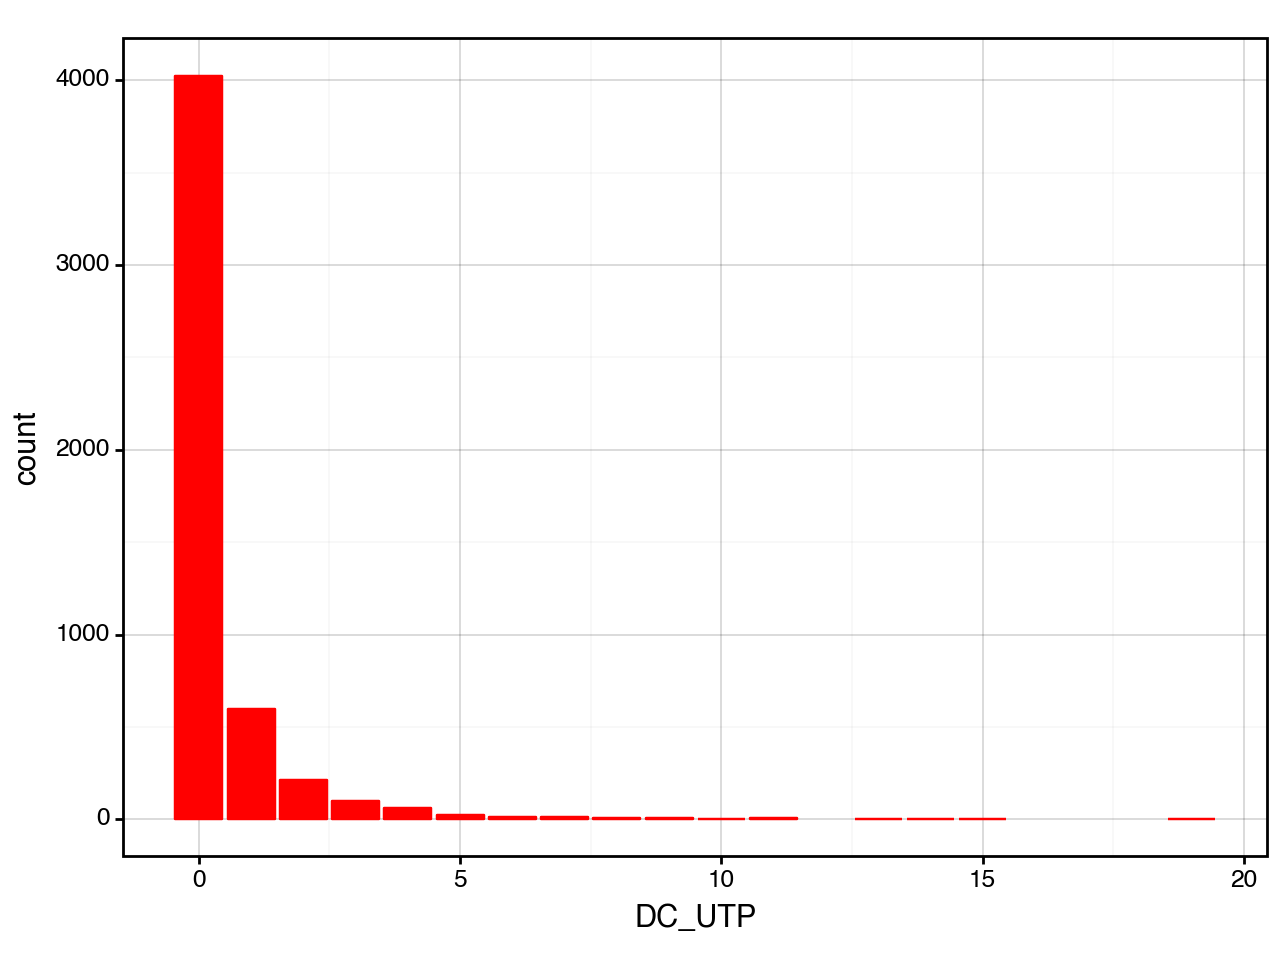

<Figure Size: (640 x 480)>

In [195]:
(ggplot(df_regiones)+
 aes(x="DC_UTP")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_UTP(Horas de Contrato de los Docentes planta Unidad Técnico-Pedagógica): Cuantitativa

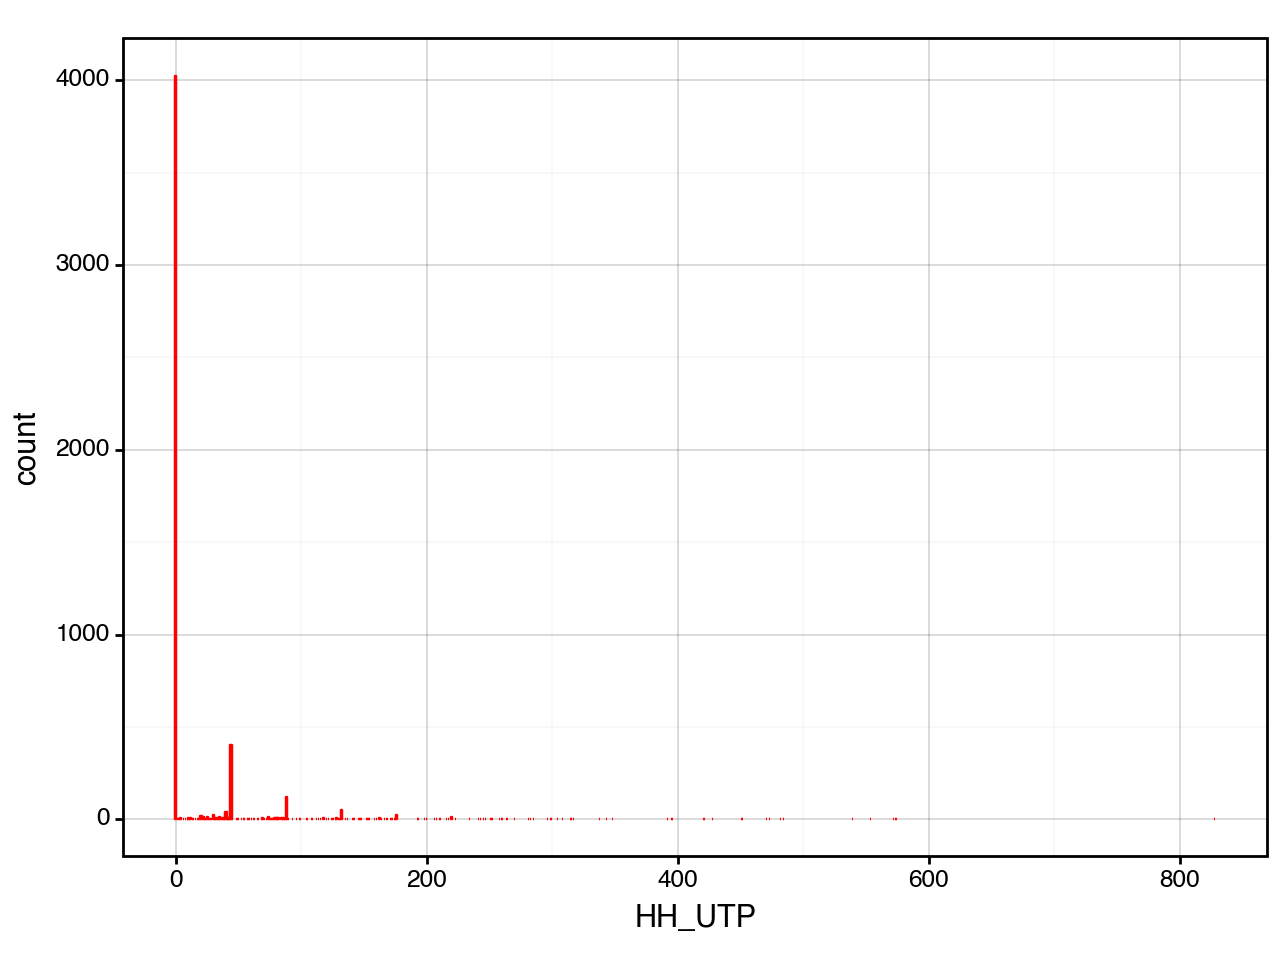

<Figure Size: (640 x 480)>

In [196]:
(ggplot(df_regiones)+
 aes(x="HH_UTP")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_PDIR(Total de Docentes Planta Directiva): Cuantitativa

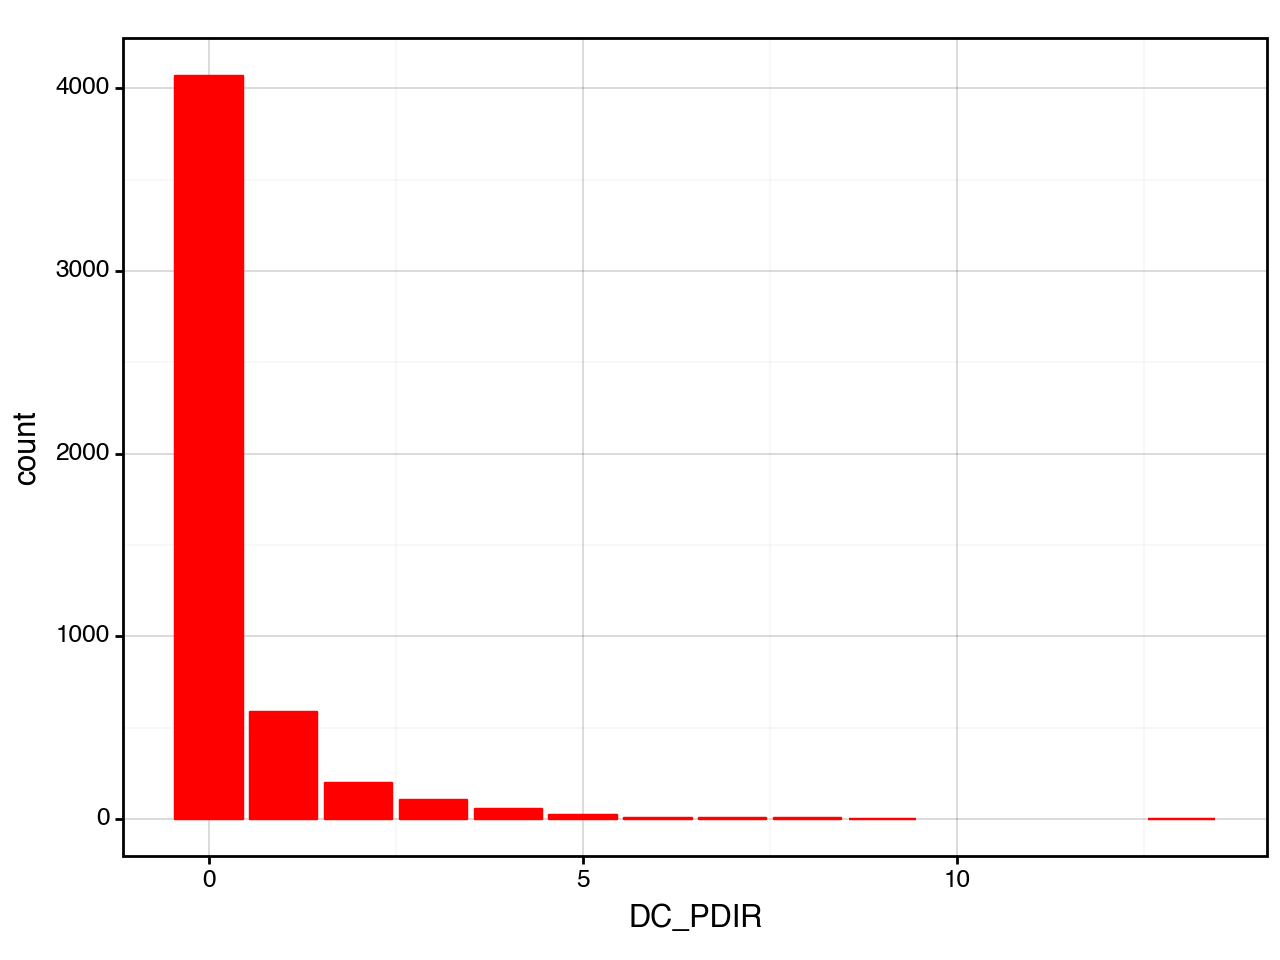

<Figure Size: (640 x 480)>

In [197]:
(ggplot(df_regiones)+
 aes(x="DC_PDIR")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)


HH_PDIR(Horas de Contrato de los docentes de la Planta Directiva): Cuantitativa

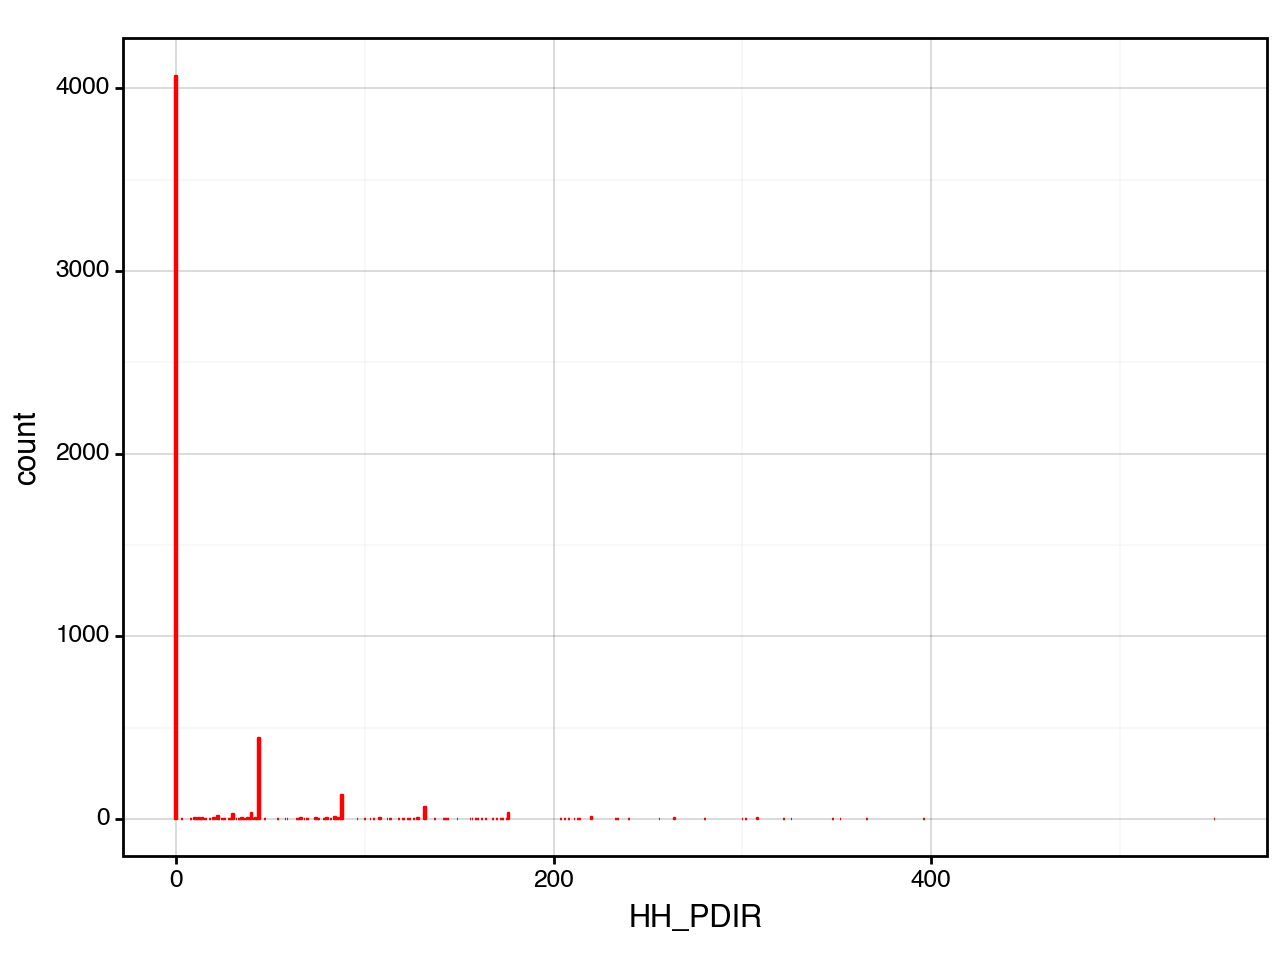

<Figure Size: (640 x 480)>

In [198]:
(ggplot(df_regiones)+
 aes(x="HH_PDIR")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_DIR(Número total de Directores(as)): Cuantitativa

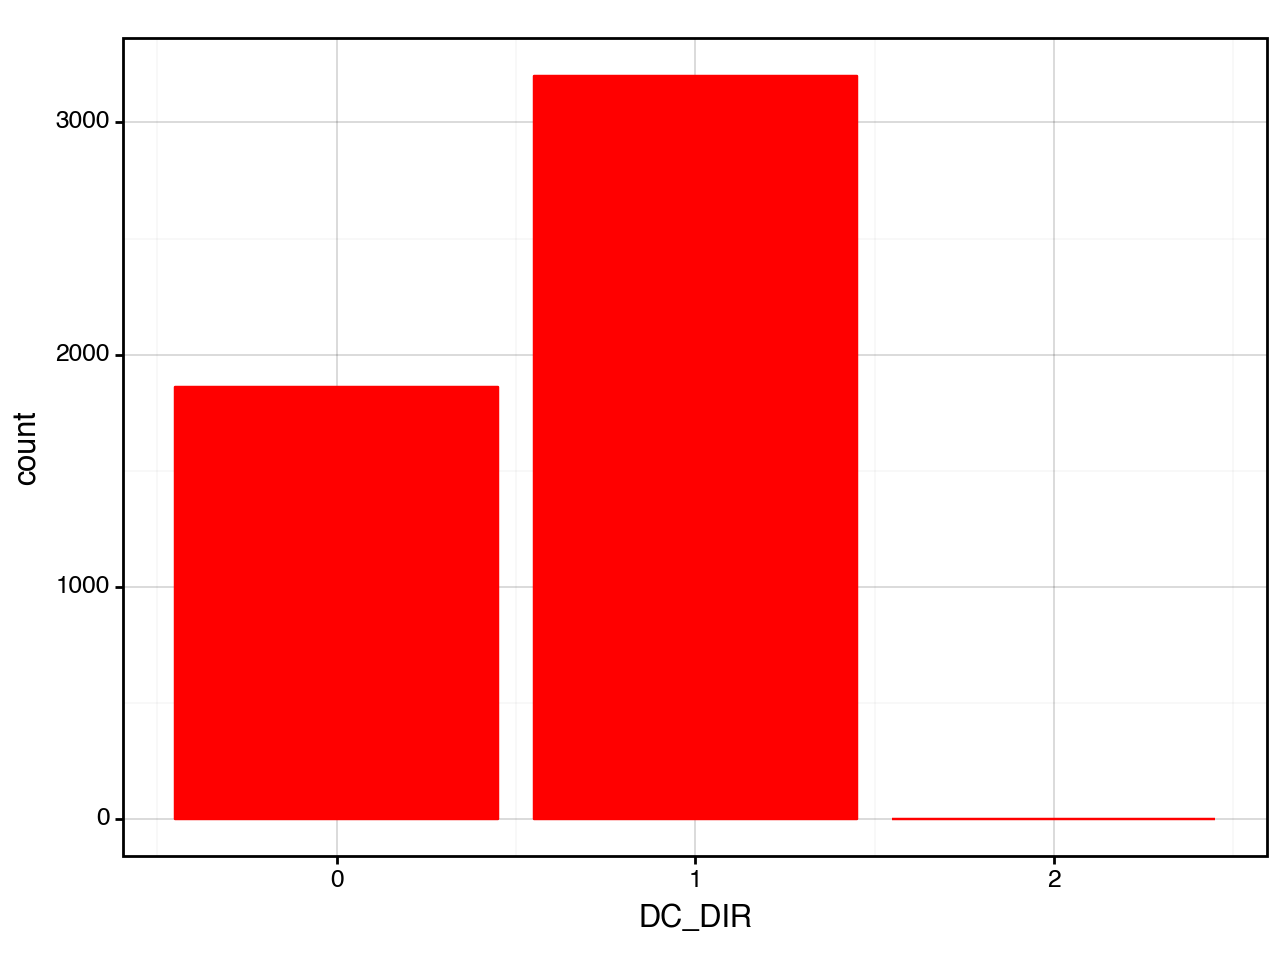

<Figure Size: (640 x 480)>

In [199]:
(ggplot(df_regiones)+
 aes(x="DC_DIR")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_DIR(Horas de Contrato de los Directores(as)): Cuantitativa

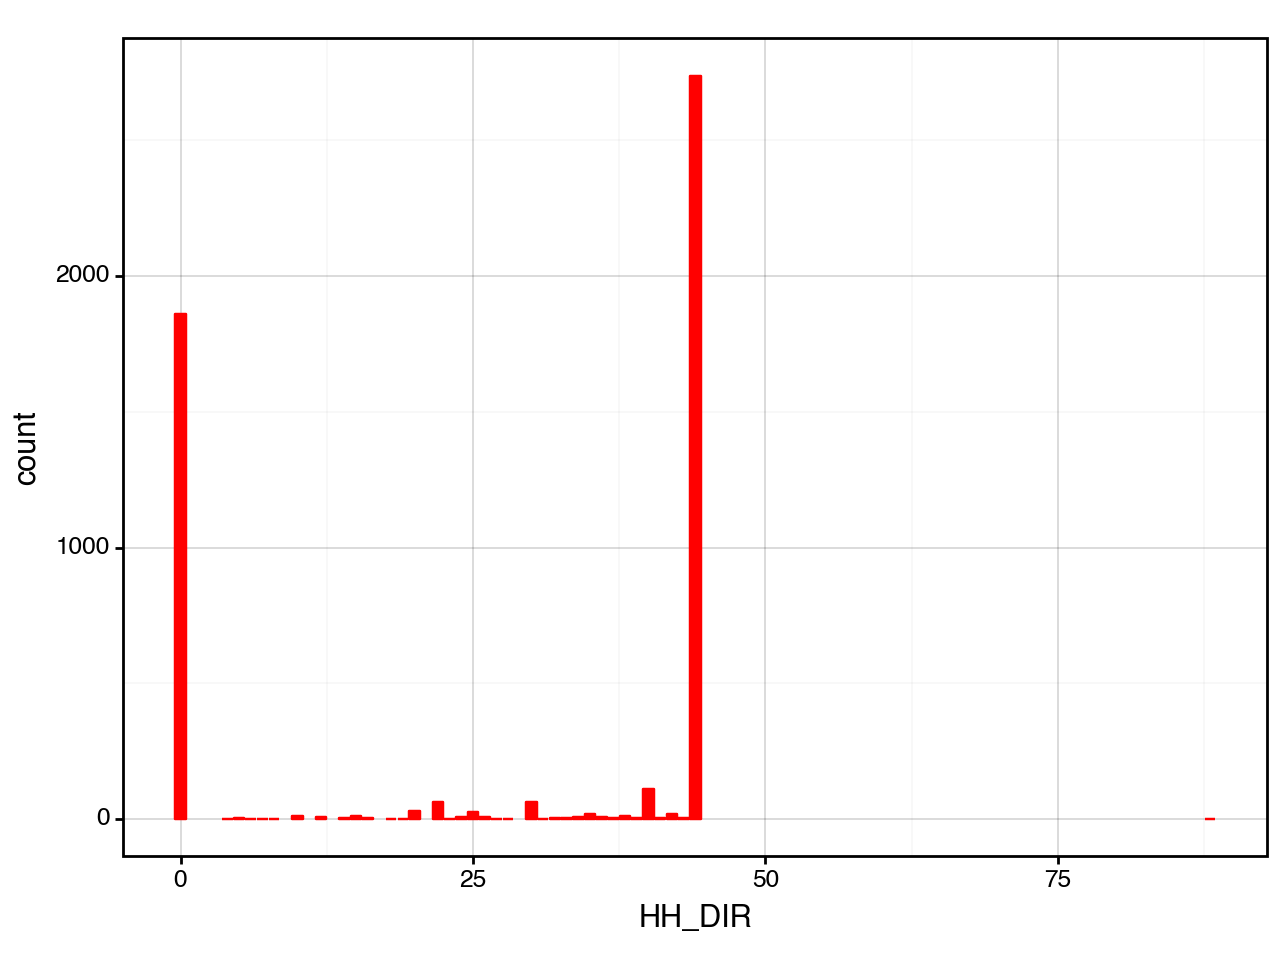

<Figure Size: (640 x 480)>

In [200]:
(ggplot(df_regiones)+
 aes(x="HH_DIR")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_OES(Total de Docentes que ejercen otra función en el establecimiento): Cuantitativa

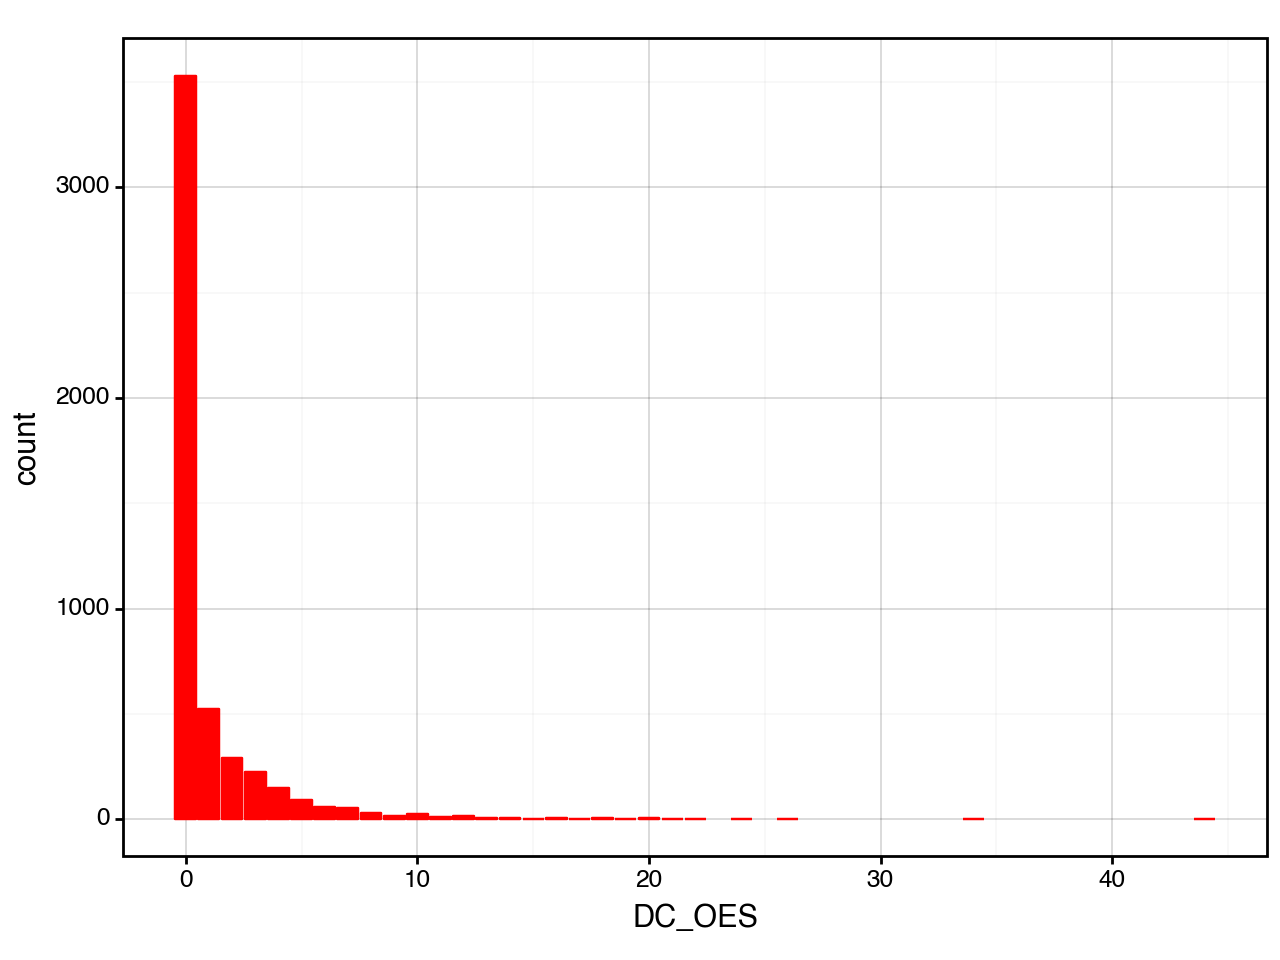

<Figure Size: (640 x 480)>

In [201]:
(ggplot(df_regiones)+
 aes(x="DC_OES")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_OES(Horas de Contrato de los docentes que ejercen otra función en el establecimiento): Cuantitativa

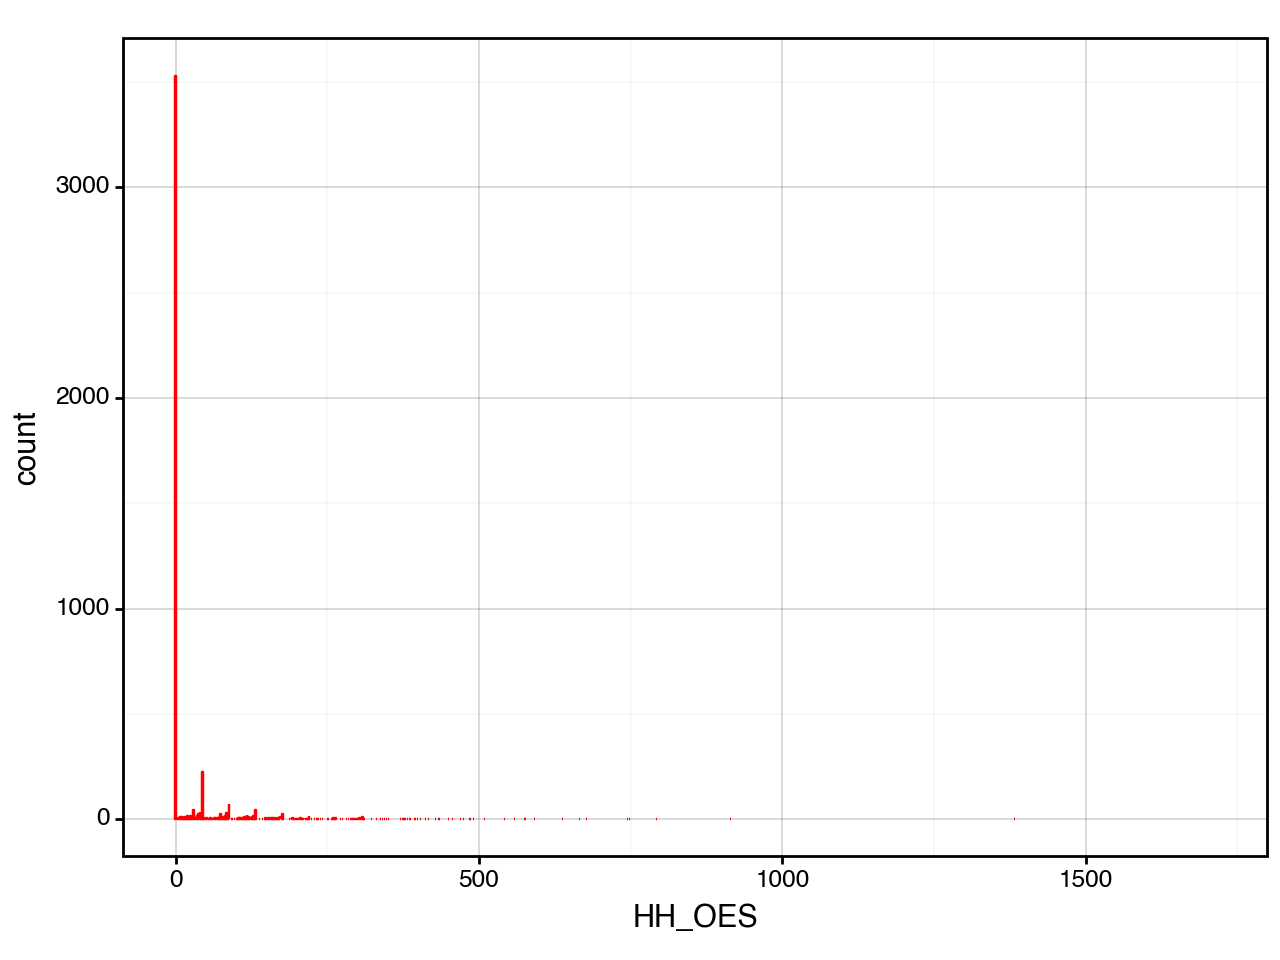

<Figure Size: (640 x 480)>

In [202]:
(ggplot(df_regiones)+
 aes(x="HH_OES")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_OF(Total de Docentes que ejercen otra función fuera del establecimiento): Cuantitativa

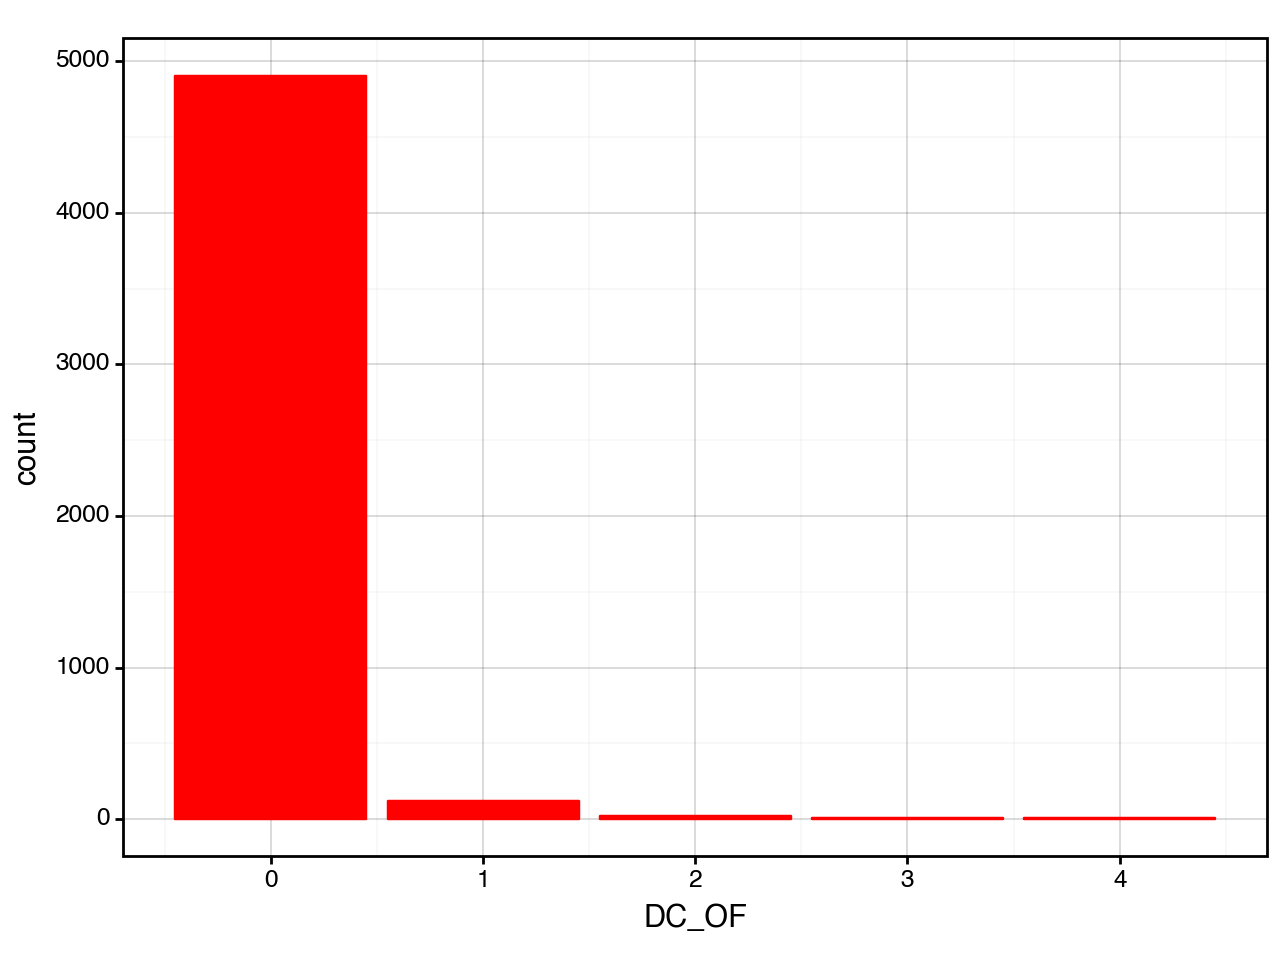

<Figure Size: (640 x 480)>

In [203]:
(ggplot(df_regiones)+
 aes(x="DC_OF")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_OF(Horas de Contrato de los docentes que ejercen otra función fuera del establecimiento): Cuantitativa

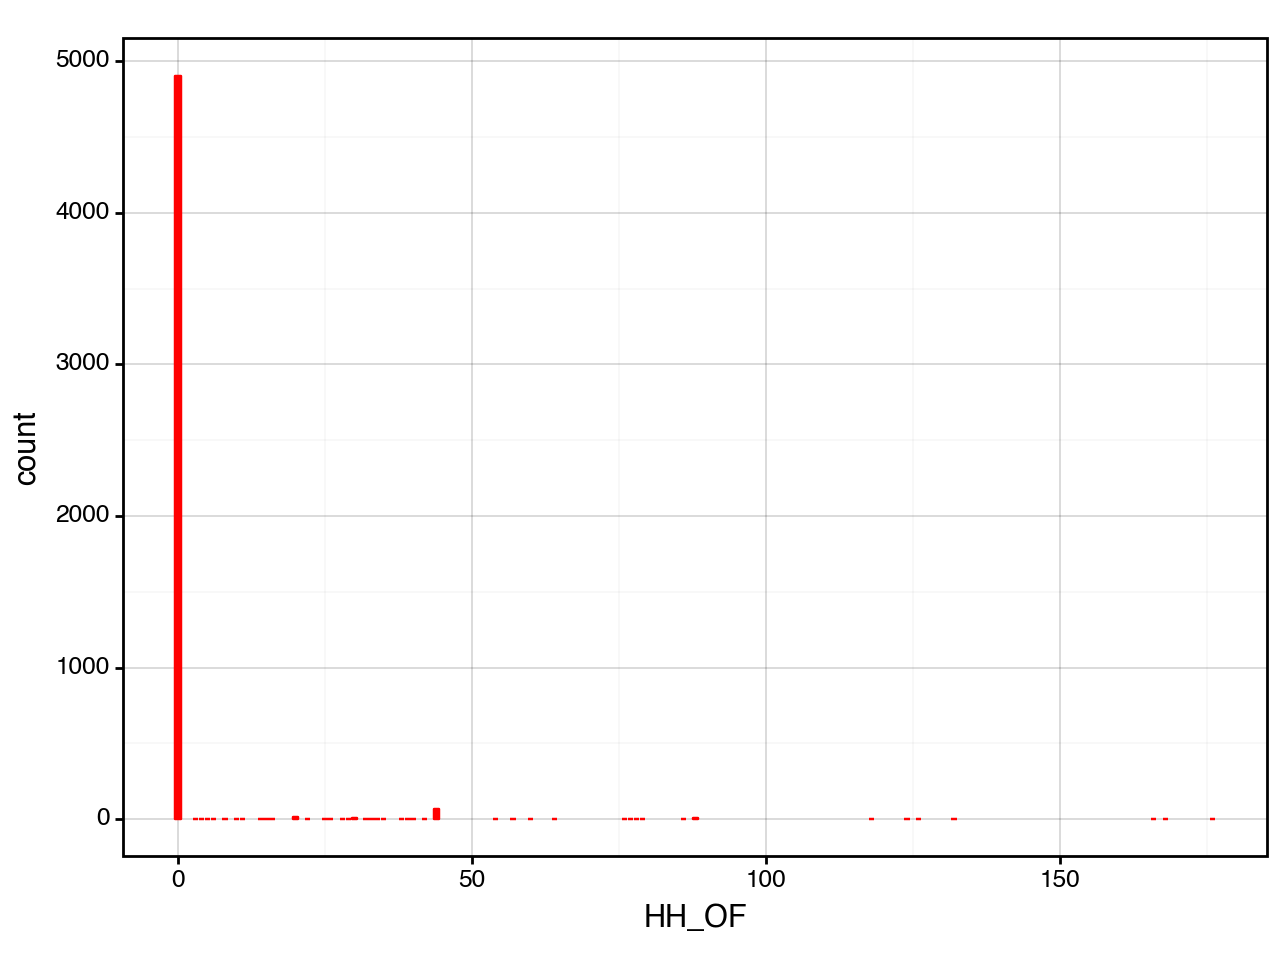

<Figure Size: (640 x 480)>

In [204]:
(ggplot(df_regiones)+
 aes(x="HH_OF")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_JUTP(Total de Jefes de Unidad TécnicoPedagógica): Cuantitativa

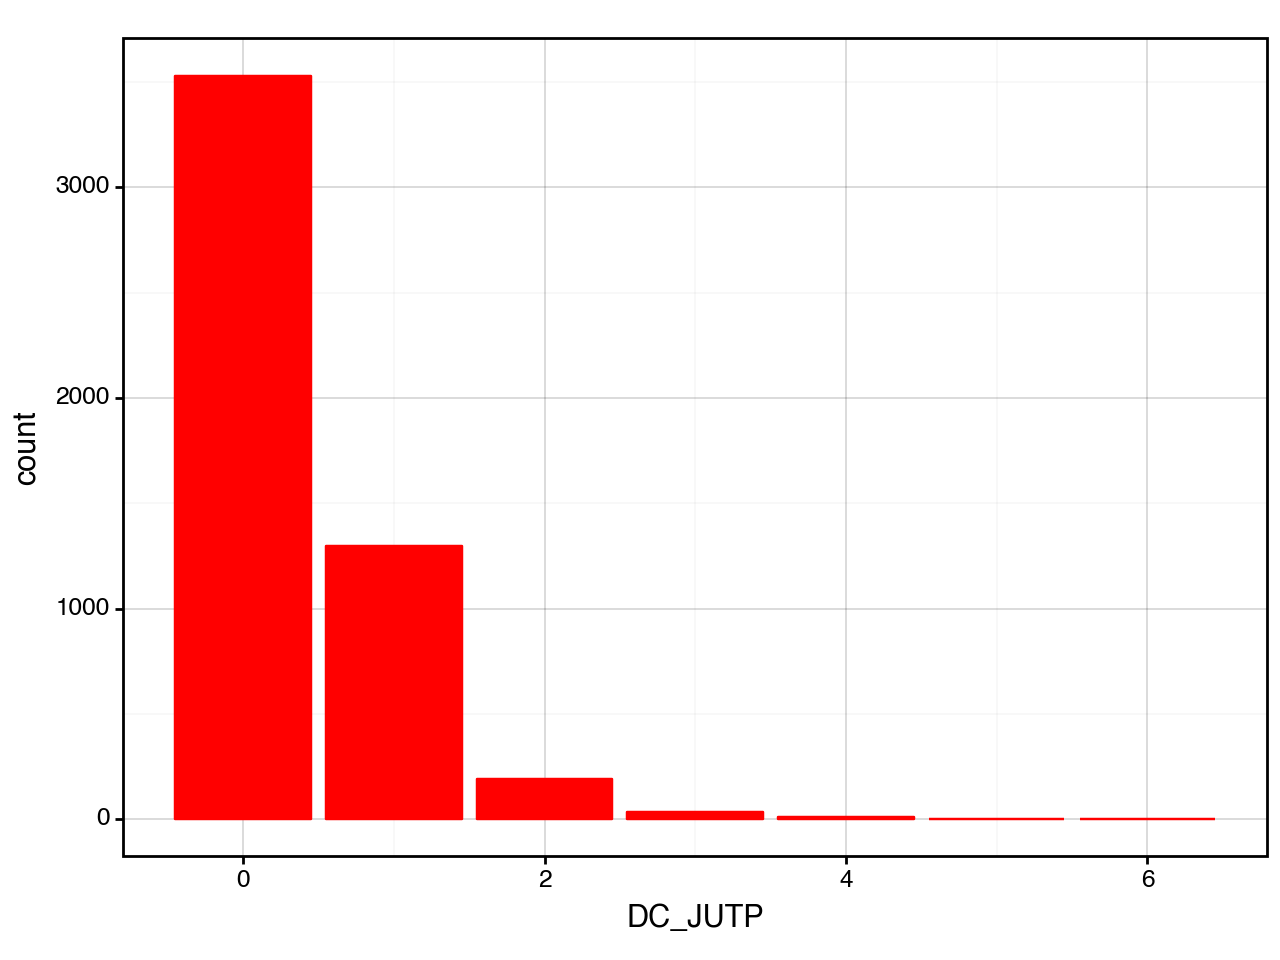

<Figure Size: (640 x 480)>

In [205]:
(ggplot(df_regiones)+
 aes(x="DC_JUTP")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_JUTP(Horas de Contrato de los Jefes de Unidad Técnico-Pedagógica): Cuantitativa

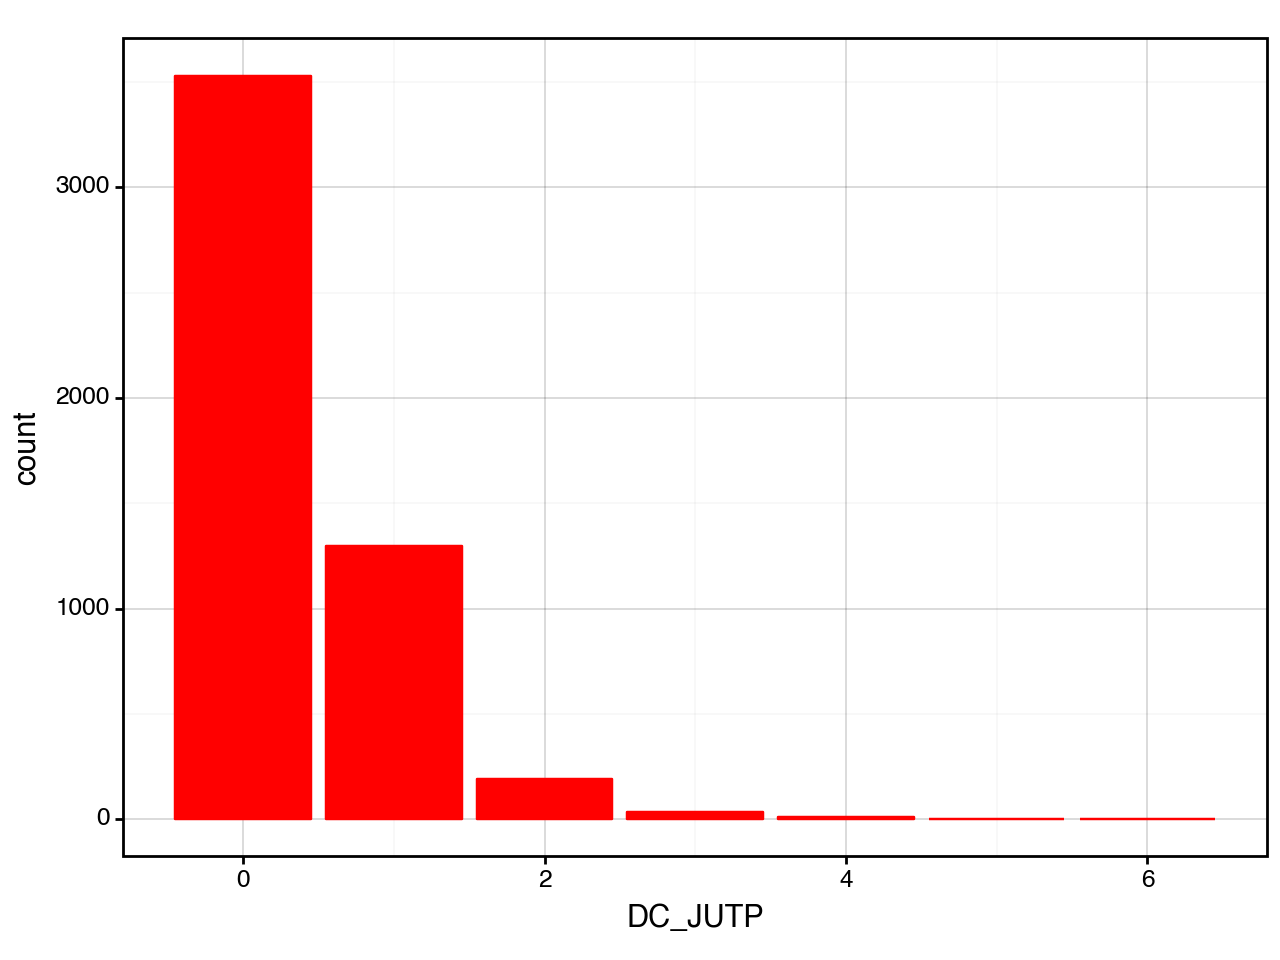

<Figure Size: (640 x 480)>

In [206]:
(ggplot(df_regiones)+
 aes(x="DC_JUTP")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_IG(Total de Inspectores Generales): Cuantitativa

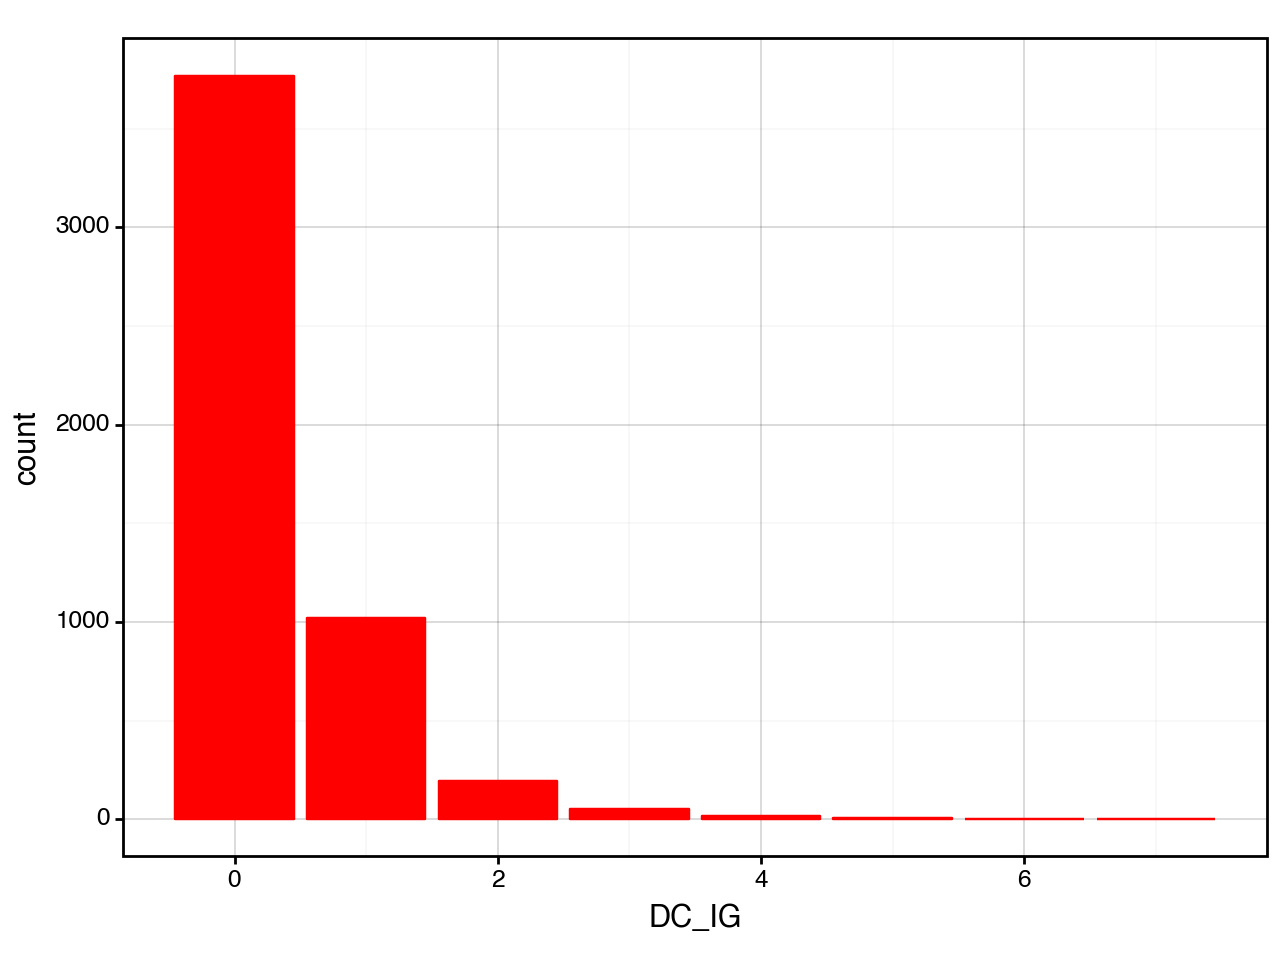

<Figure Size: (640 x 480)>

In [207]:
(ggplot(df_regiones)+
 aes(x="DC_IG")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_IG(Horas de Contrato de los Inspectores Generales): Cuantitativa

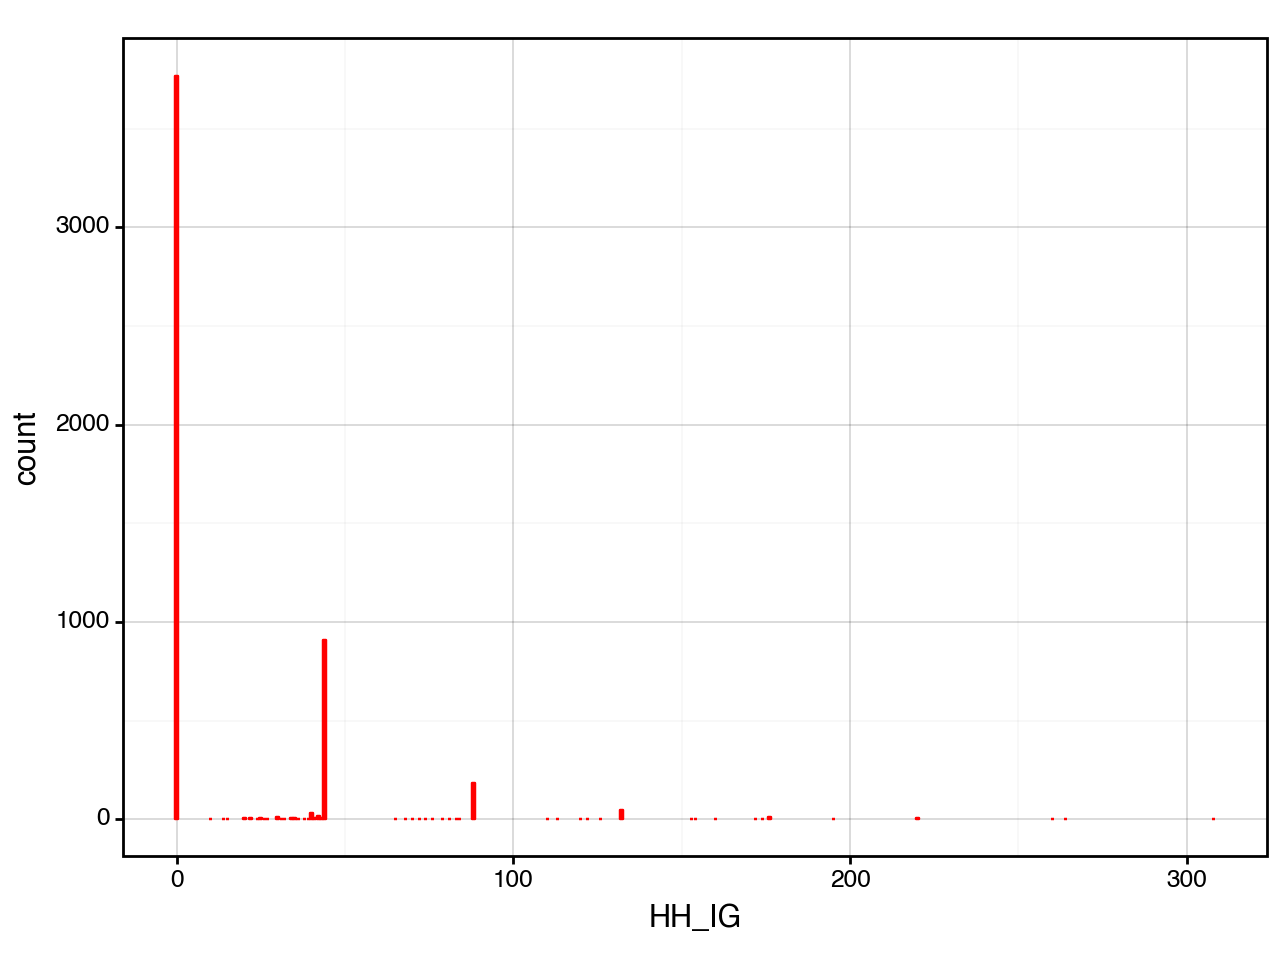

<Figure Size: (640 x 480)>

In [208]:
(ggplot(df_regiones)+
 aes(x="HH_IG")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_OR(Total de Orientadores): Cuantitativa

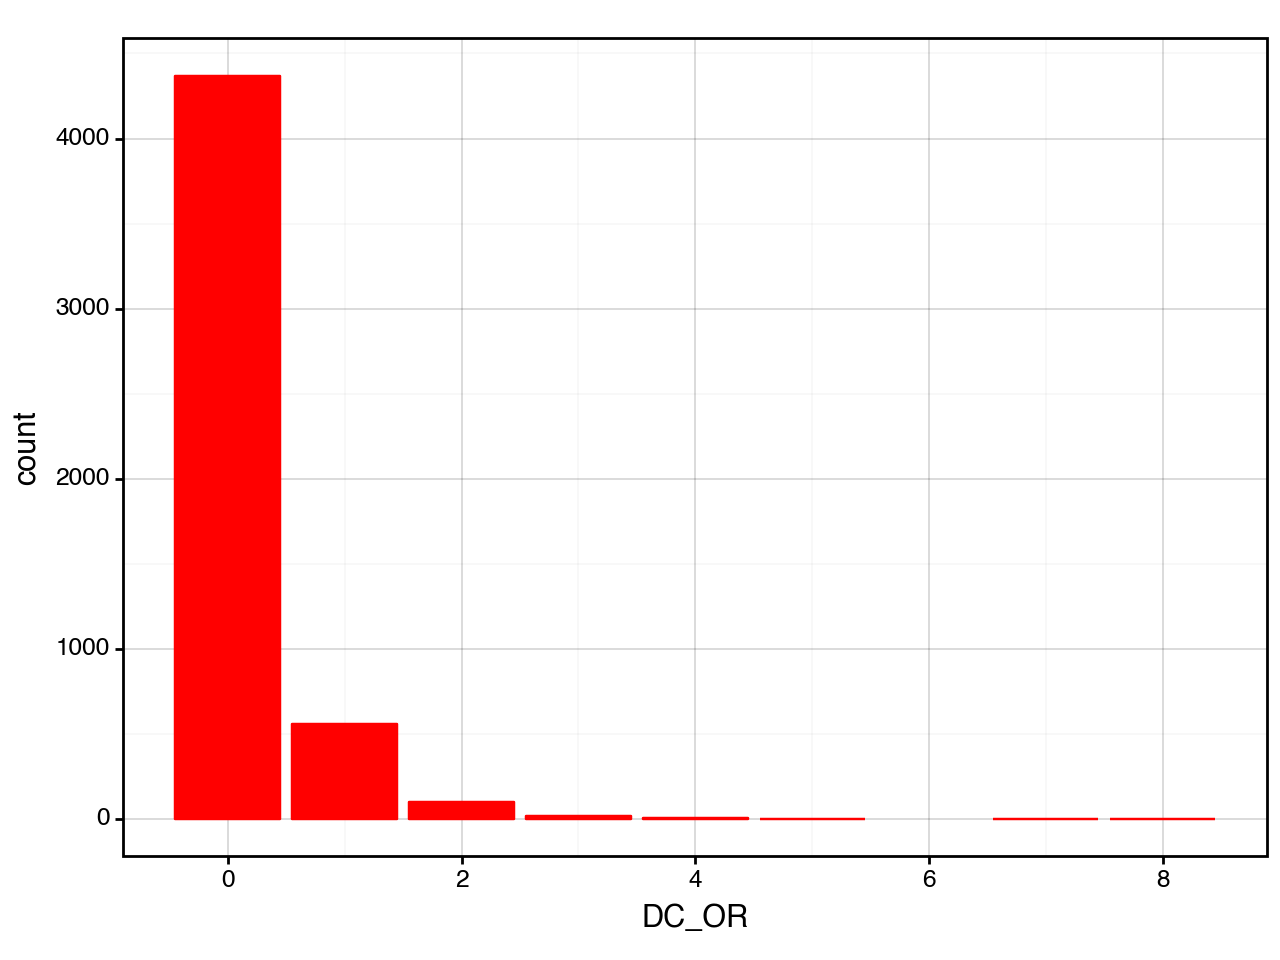

<Figure Size: (640 x 480)>

In [209]:
(ggplot(df_regiones)+
 aes(x="DC_OR")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_OR(Horas de Contrato de los Orientadores): Cuantitativa

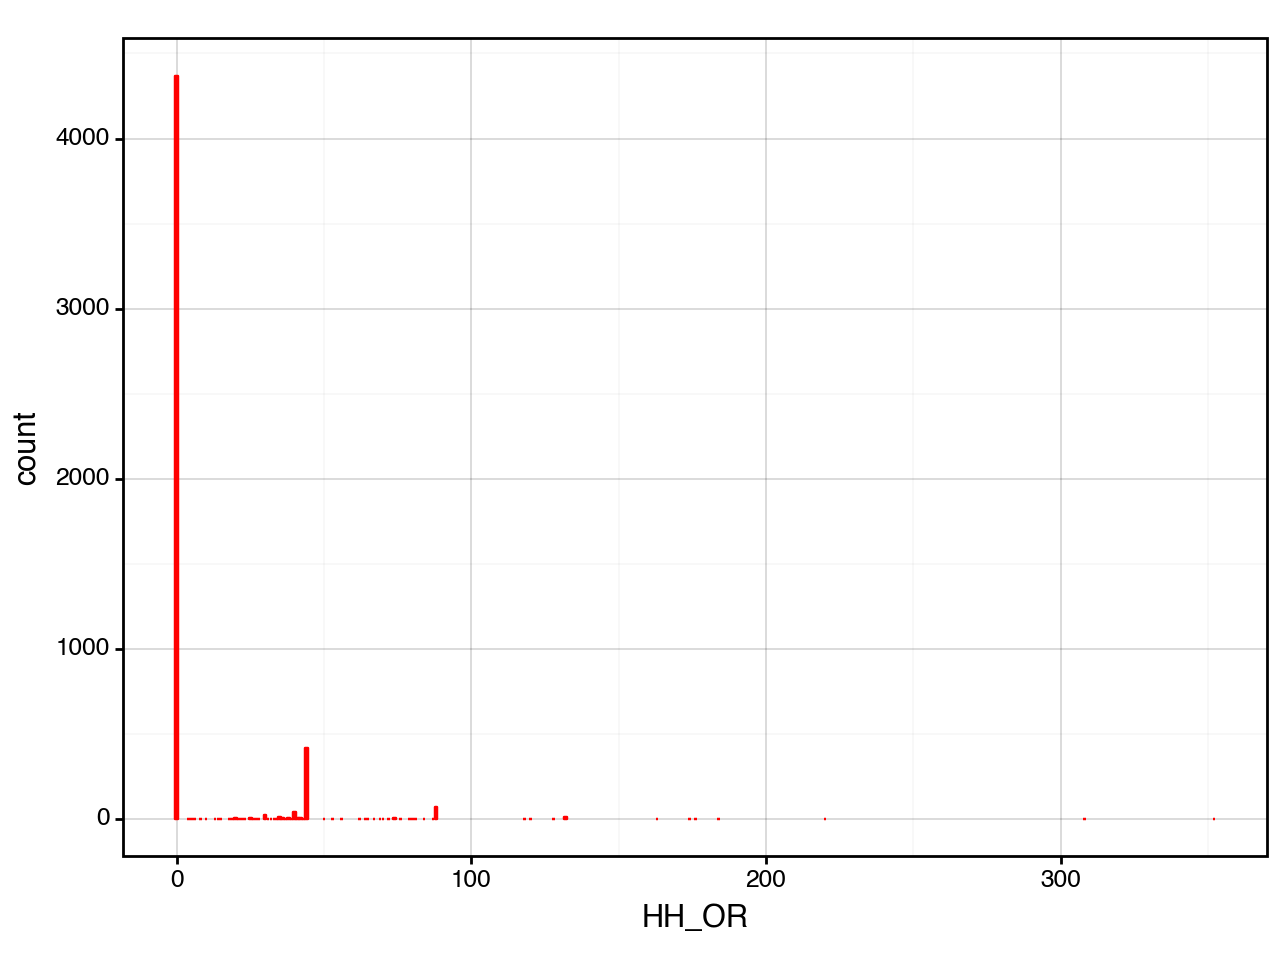

<Figure Size: (640 x 480)>

In [210]:
(ggplot(df_regiones)+
 aes(x="HH_OR")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_DIR_SOST(Total de docentes que cumplen funciones Directivas con el sostenedor): Cuantitativa

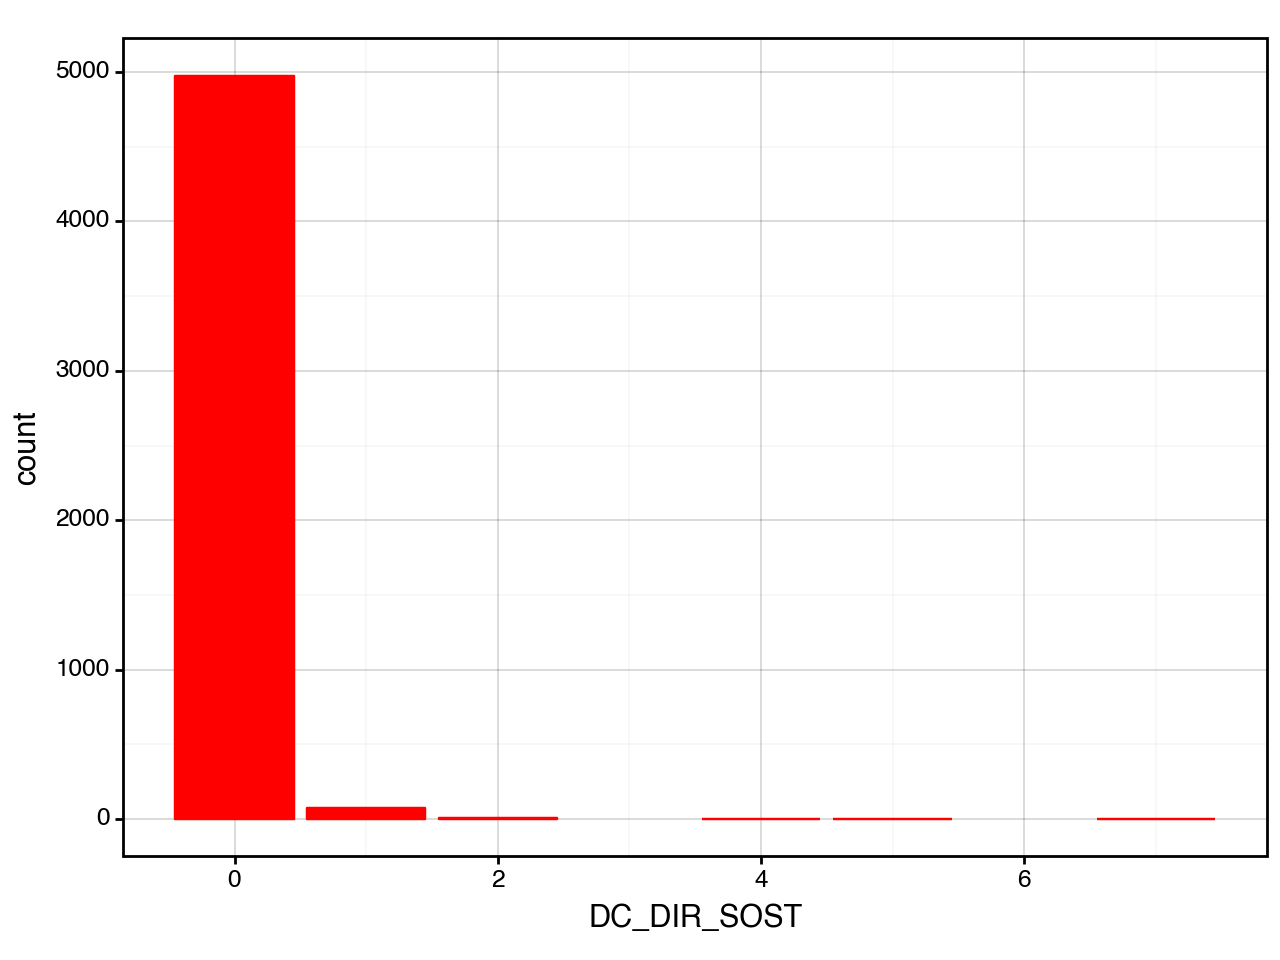

<Figure Size: (640 x 480)>

In [211]:
(ggplot(df_regiones)+
 aes(x="DC_DIR_SOST")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_DIR_SOST(Horas Directivas con el sostenedor): Cuantitativa

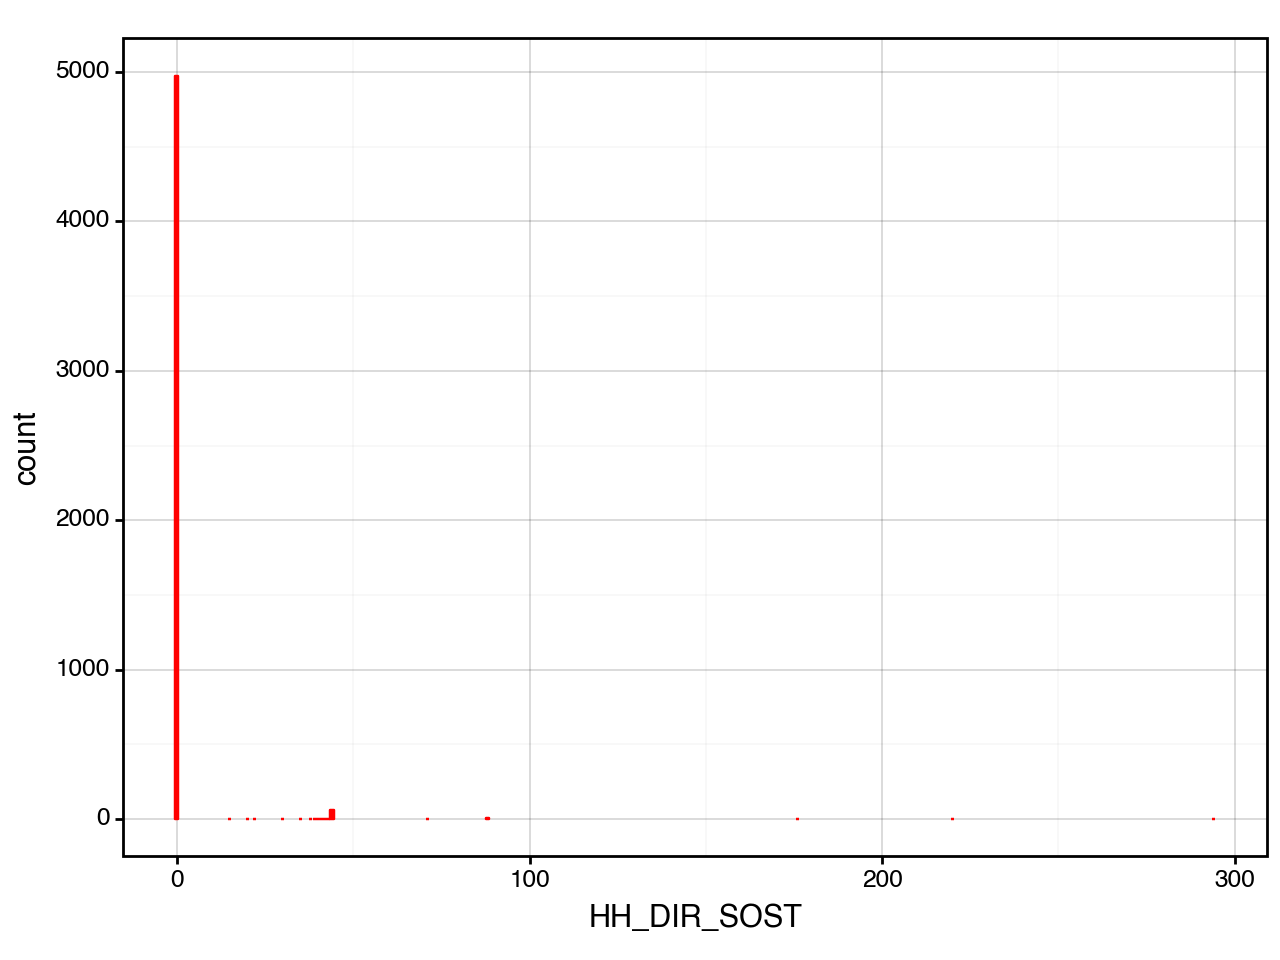

<Figure Size: (640 x 480)>

In [212]:
(ggplot(df_regiones)+
 aes(x="HH_DIR_SOST")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_TP_SOST(Total de docentes que cumplen funciones Técnico-pedagógicas con el sostenedor): Cuantitativa

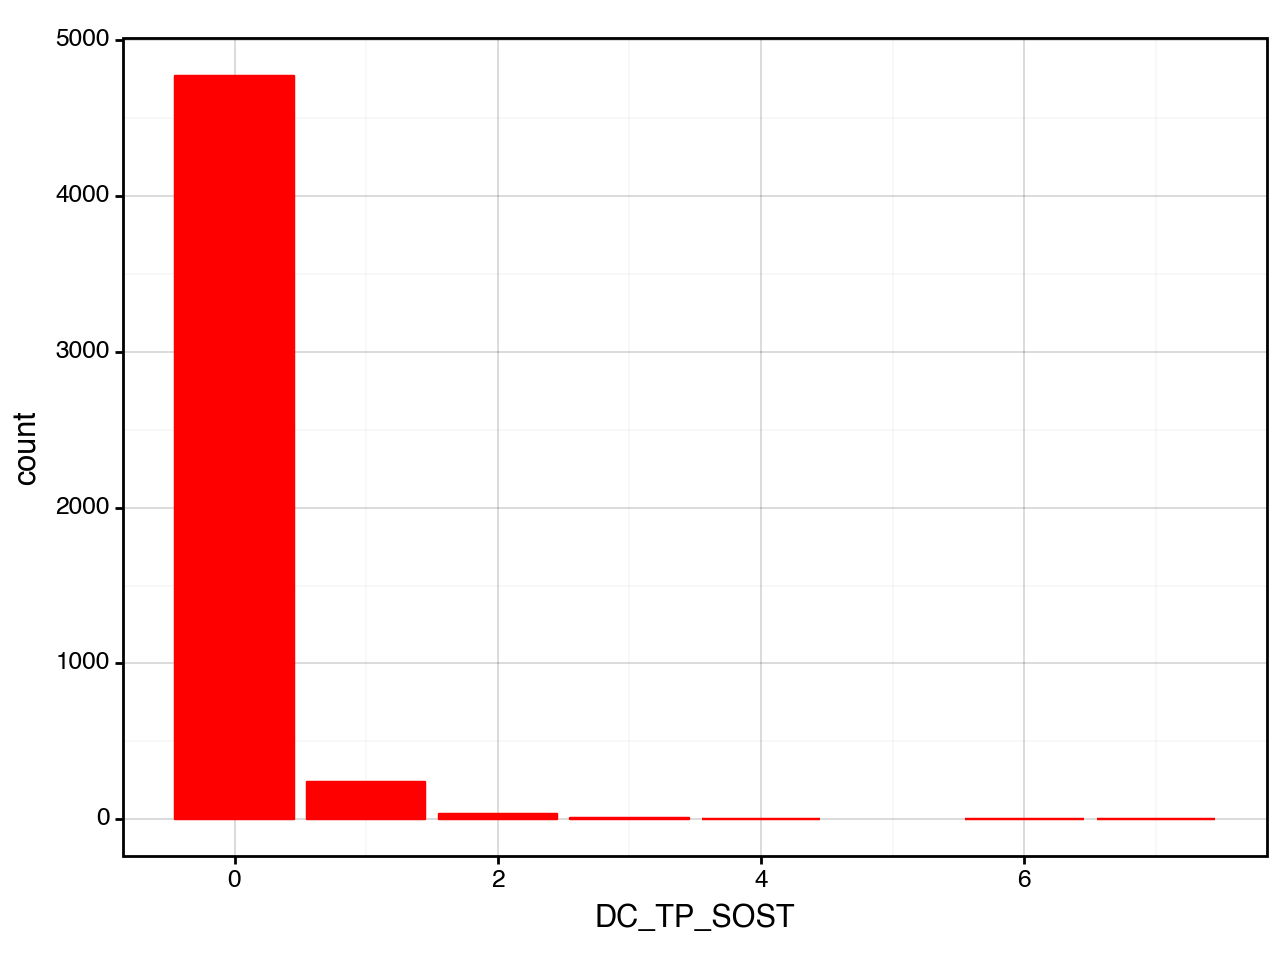

<Figure Size: (640 x 480)>

In [213]:
(ggplot(df_regiones)+
 aes(x="DC_TP_SOST")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)


HH_TP_SOST(Horas Técnico-pedagógicas con el sostenedor): Cuantitativa

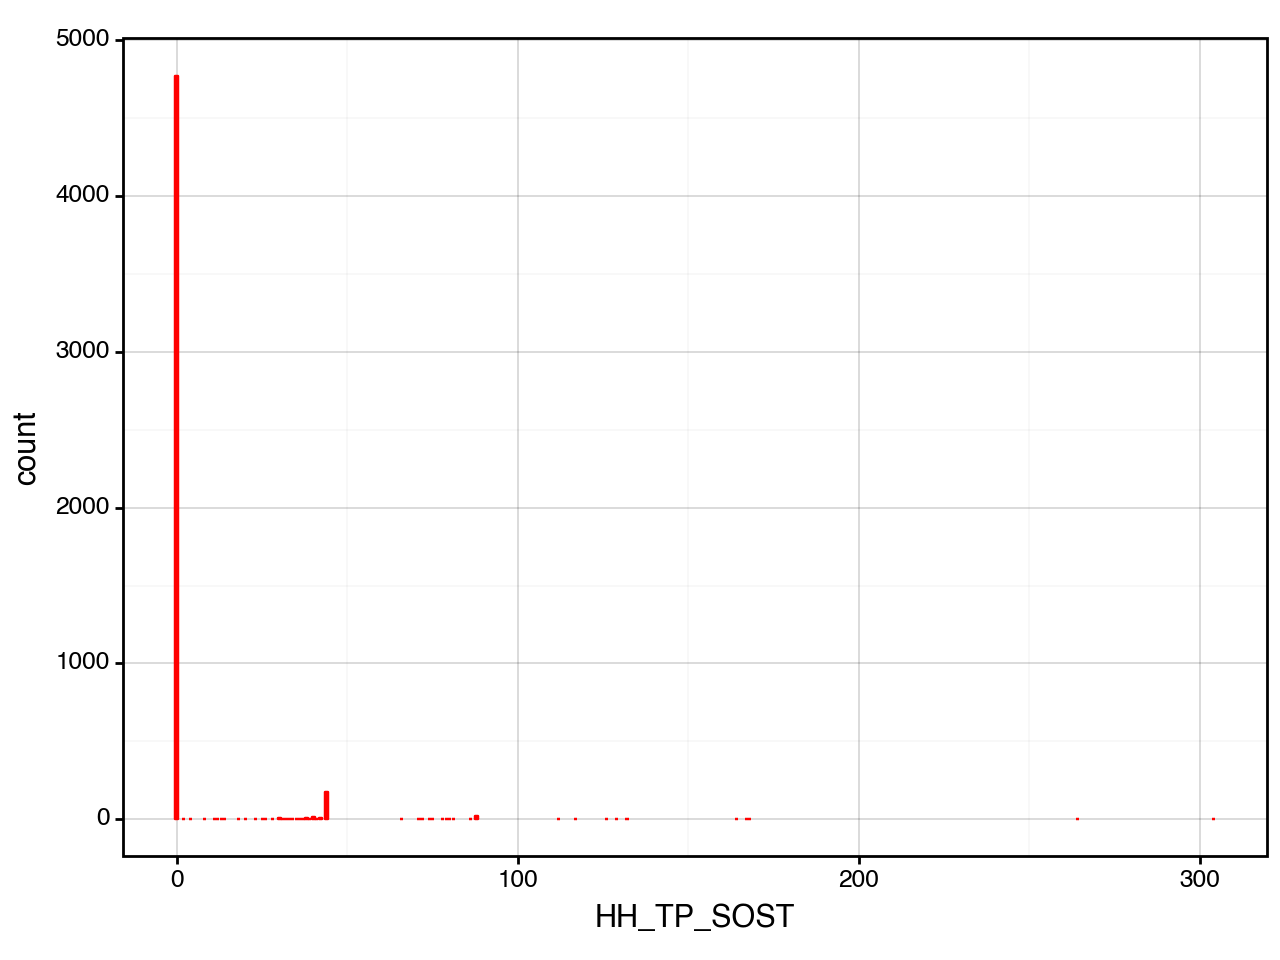

<Figure Size: (640 x 480)>

In [214]:
(ggplot(df_regiones)+
 aes(x="HH_TP_SOST")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)


DC_SUP_SOST(Total de docentes que cumplen funciones de Supervisión con el sostenedor): Cuantitativa

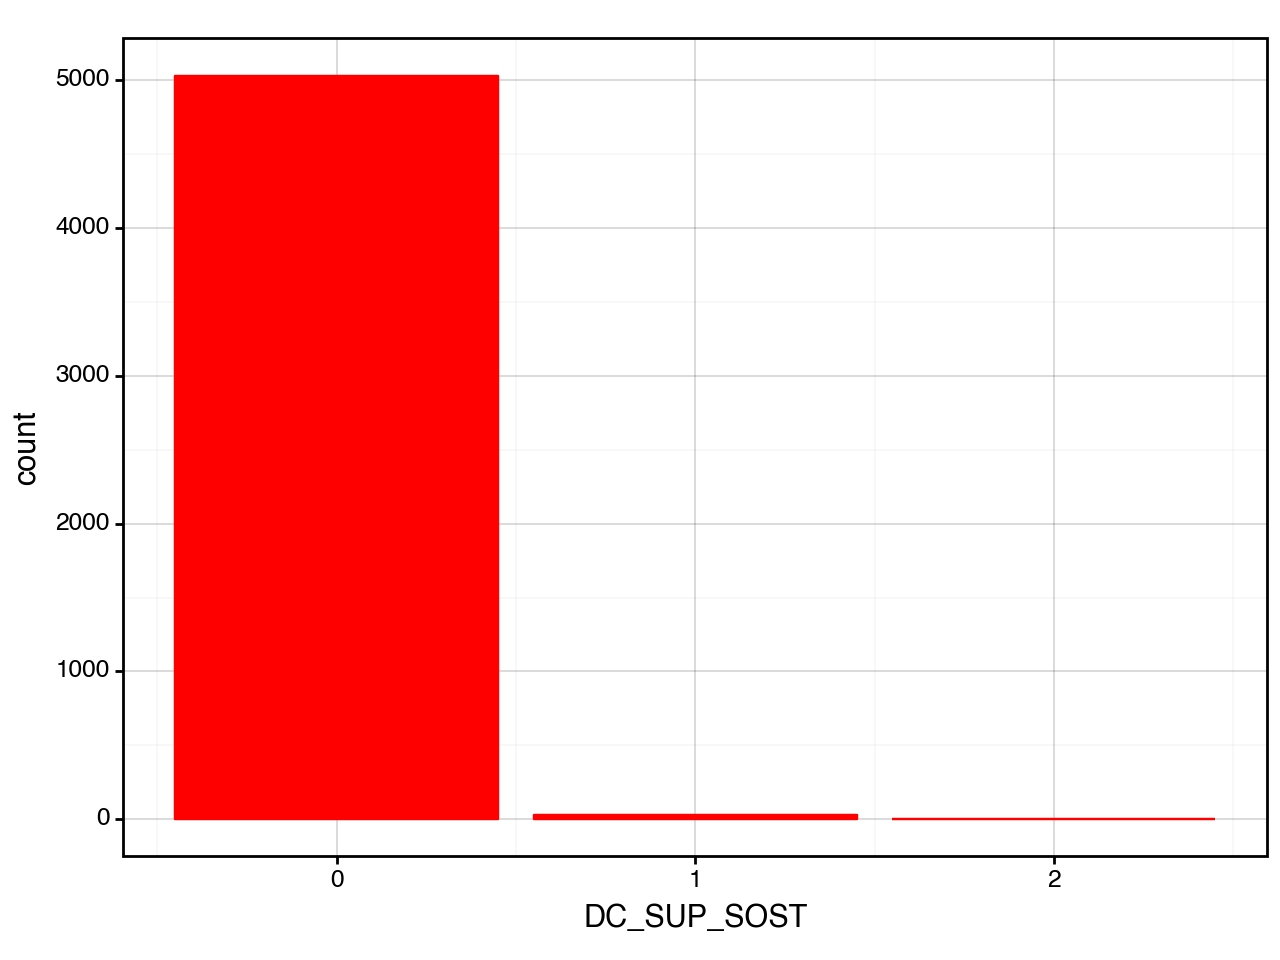

<Figure Size: (640 x 480)>

In [215]:
(ggplot(df_regiones)+
 aes(x="DC_SUP_SOST")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_SUP_SOST(Horas de Supervisión con el sostenedor): Cuantitativa

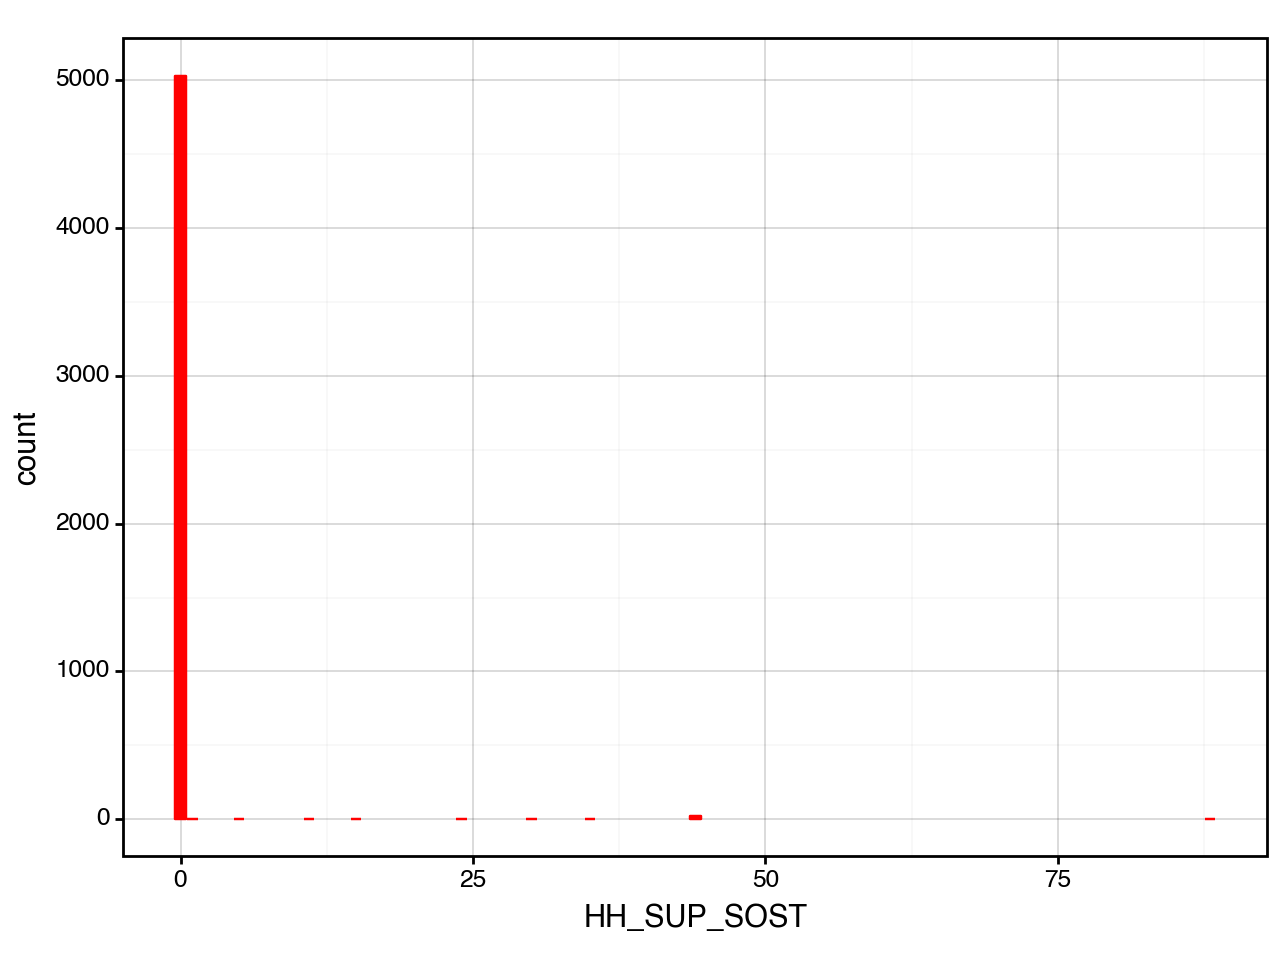

<Figure Size: (640 x 480)>

In [216]:
(ggplot(df_regiones)+
 aes(x="HH_SUP_SOST")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_SUBDIR(Número total de Sub Directores(as)): Cuantitativa

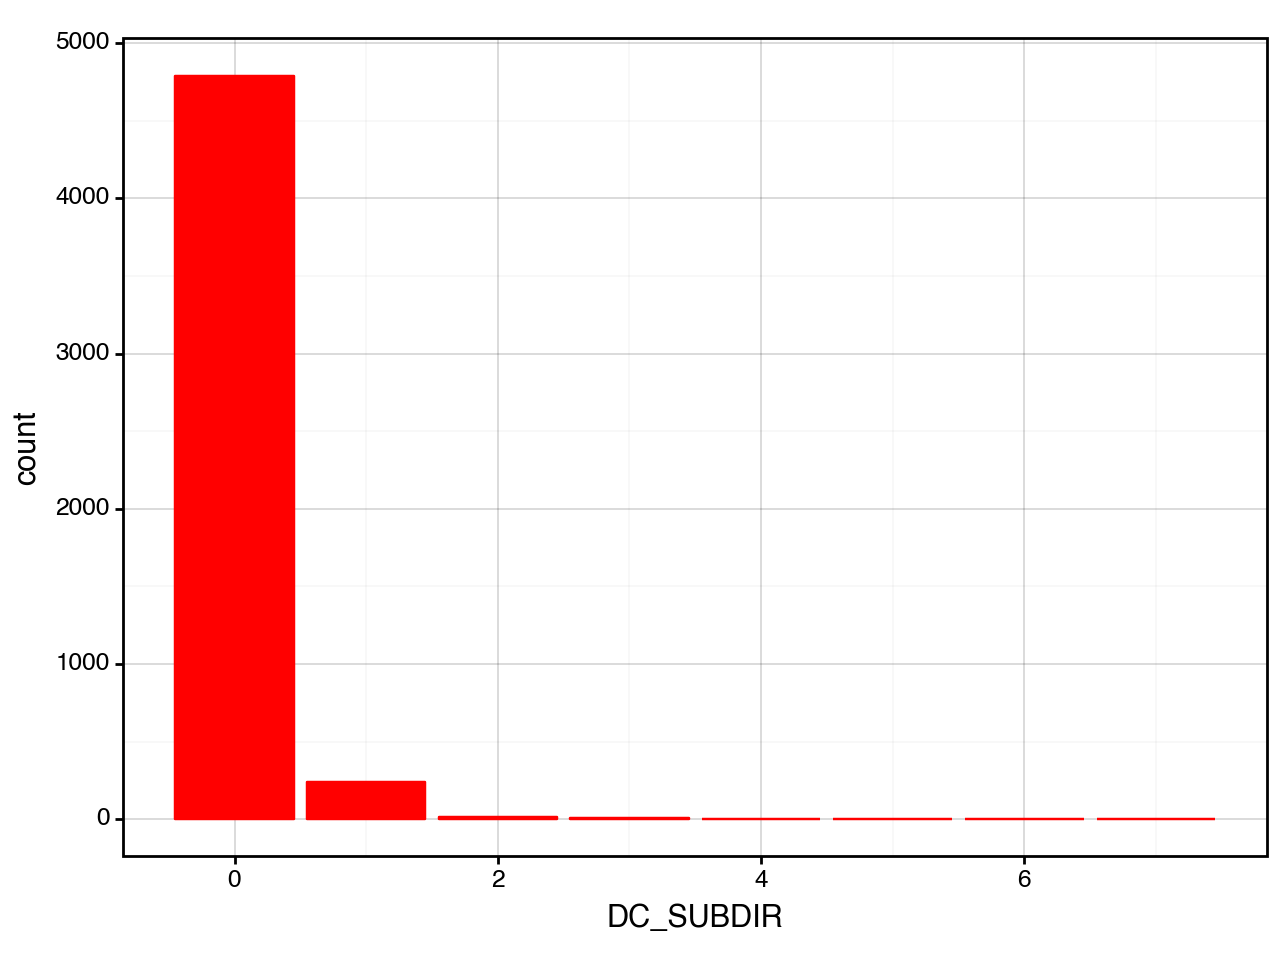

<Figure Size: (640 x 480)>

In [217]:
(ggplot(df_regiones)+
 aes(x="DC_SUBDIR")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_SUBDIR(Horas de Contrato de los SubDirectores(as)): Cuantitativa

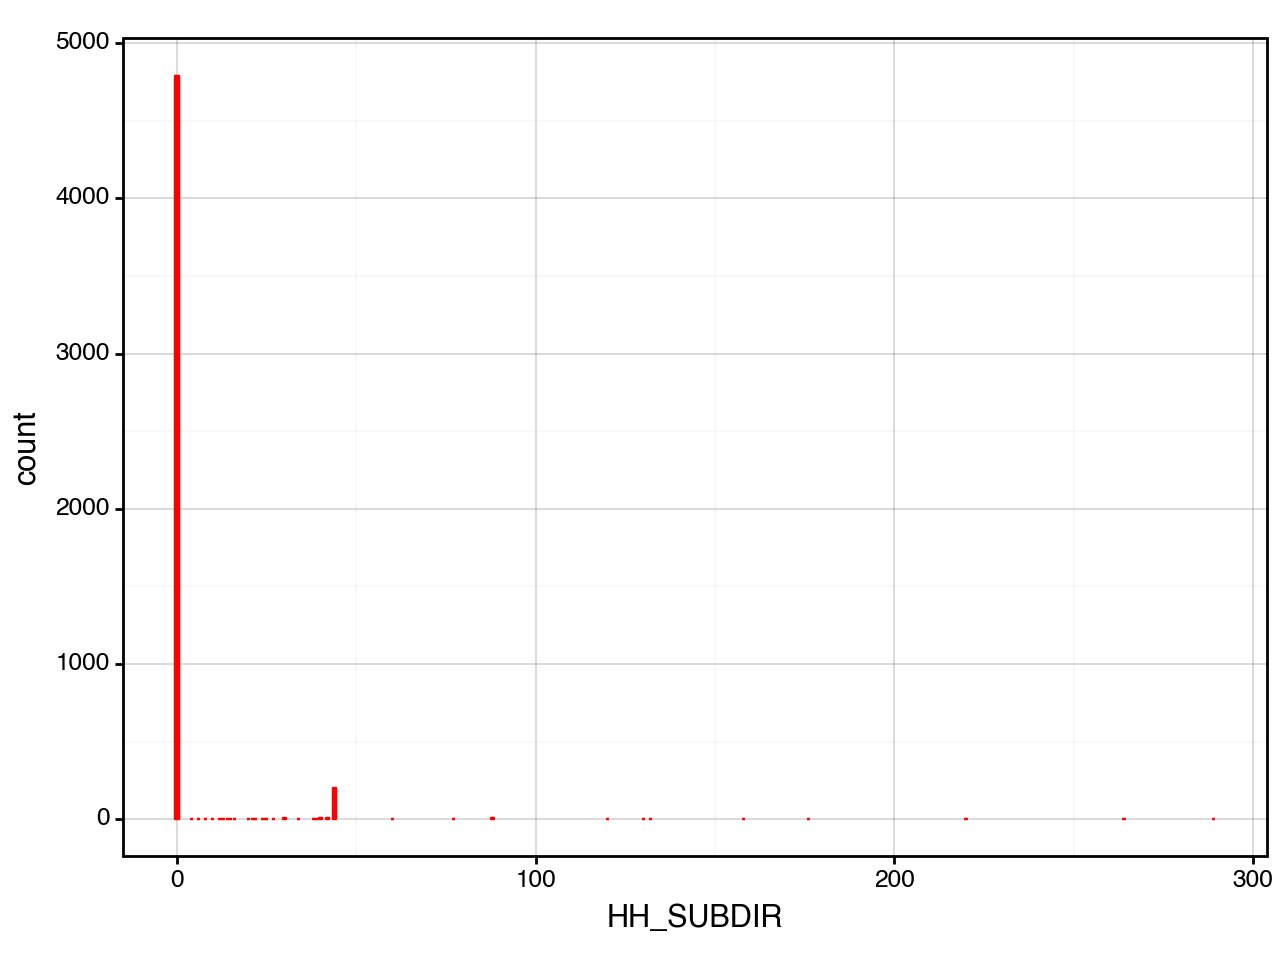

<Figure Size: (640 x 480)>

In [218]:
(ggplot(df_regiones)+
 aes(x="HH_SUBDIR")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_PROF_ENC(Número total de Profesores(as) Encargados): Cuantitativa

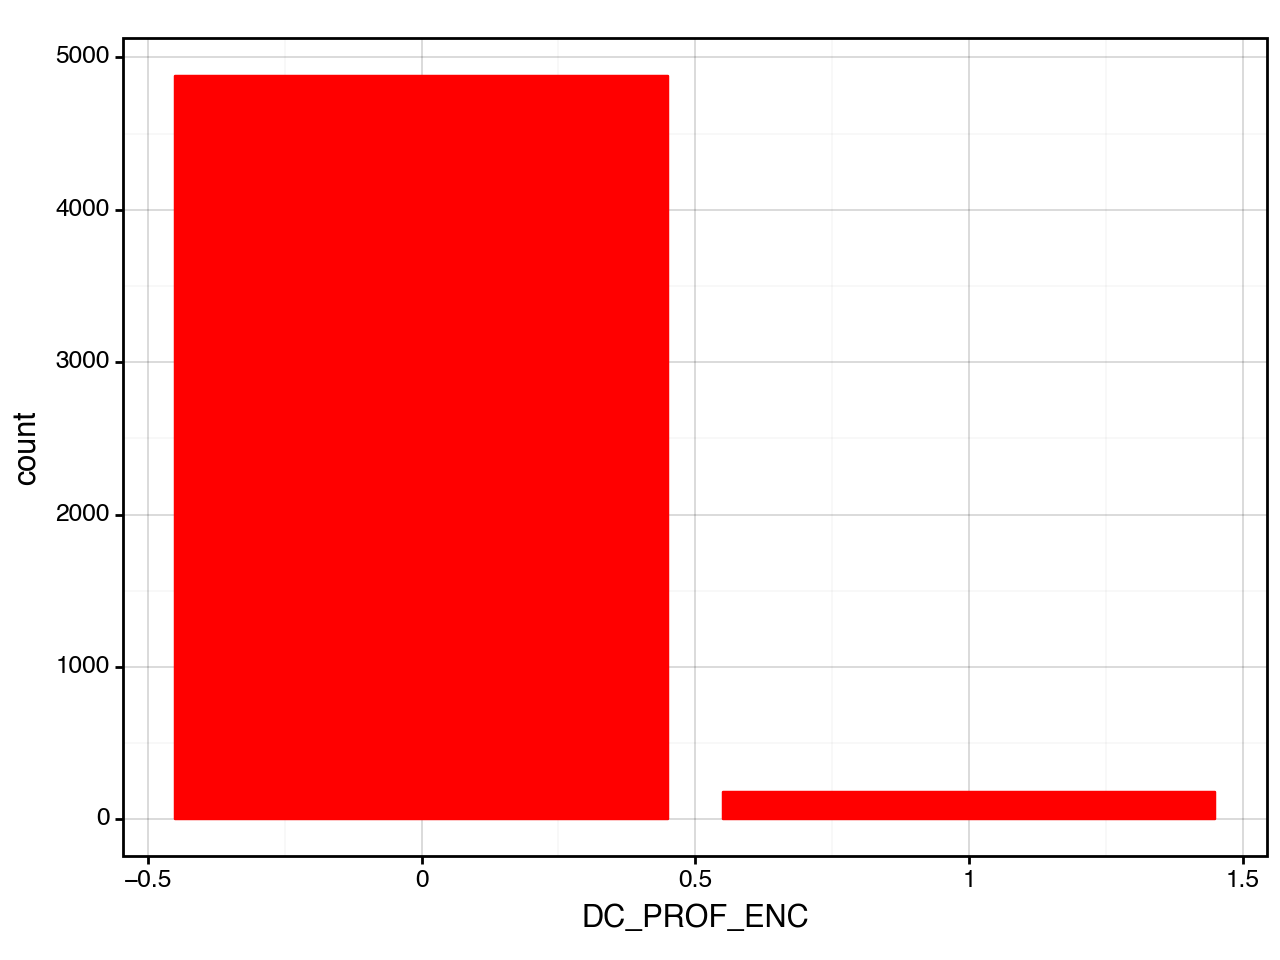

<Figure Size: (640 x 480)>

In [219]:
(ggplot(df_regiones)+
 aes(x="DC_PROF_ENC")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_PROF_ENC(Horas de Contrato de los Profesores(as) Encargados): Cuantitativa

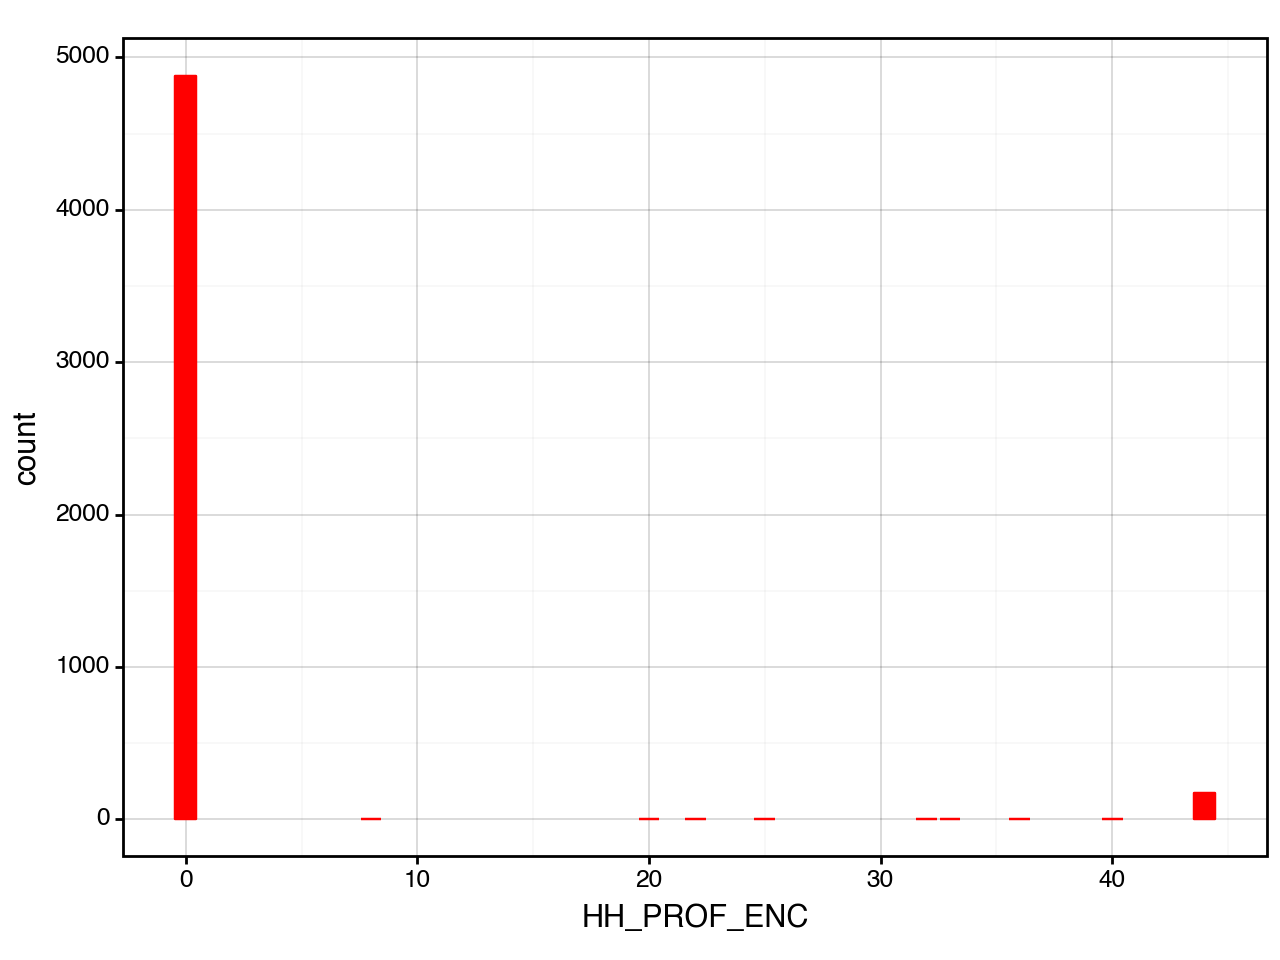

<Figure Size: (640 x 480)>

In [220]:
(ggplot(df_regiones)+
 aes(x="HH_PROF_ENC")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_EDUC_TRAD(Total de Docentes que ejercen como Educadores Tradicionales): Cuantitativa

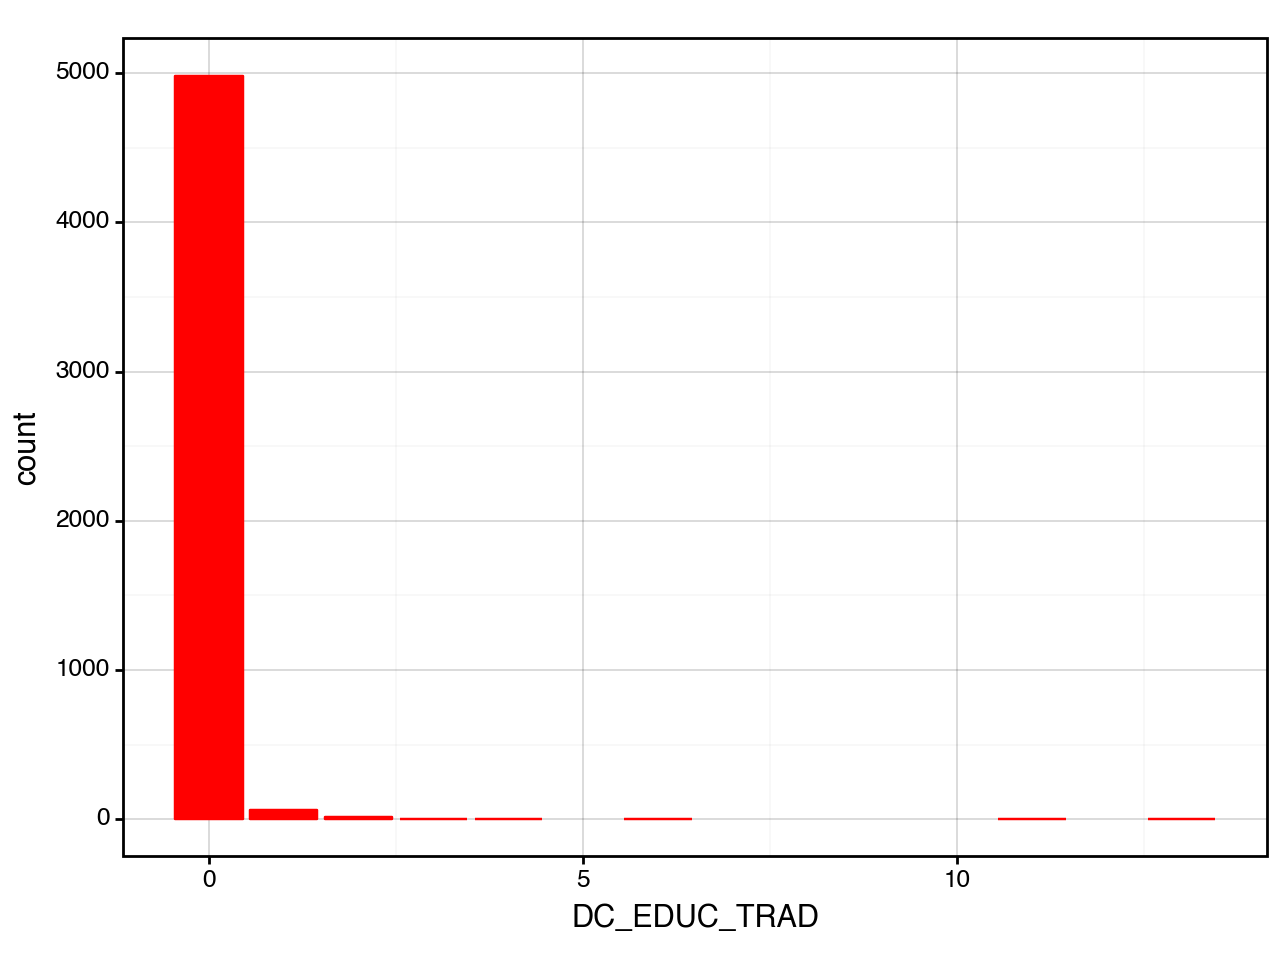

<Figure Size: (640 x 480)>

In [221]:
(ggplot(df_regiones)+
 aes(x="DC_EDUC_TRAD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_EDUC_TRAD(Horas de Contrato de los docentes que ejercen como Educadores Tradicionales): Cuantitativa

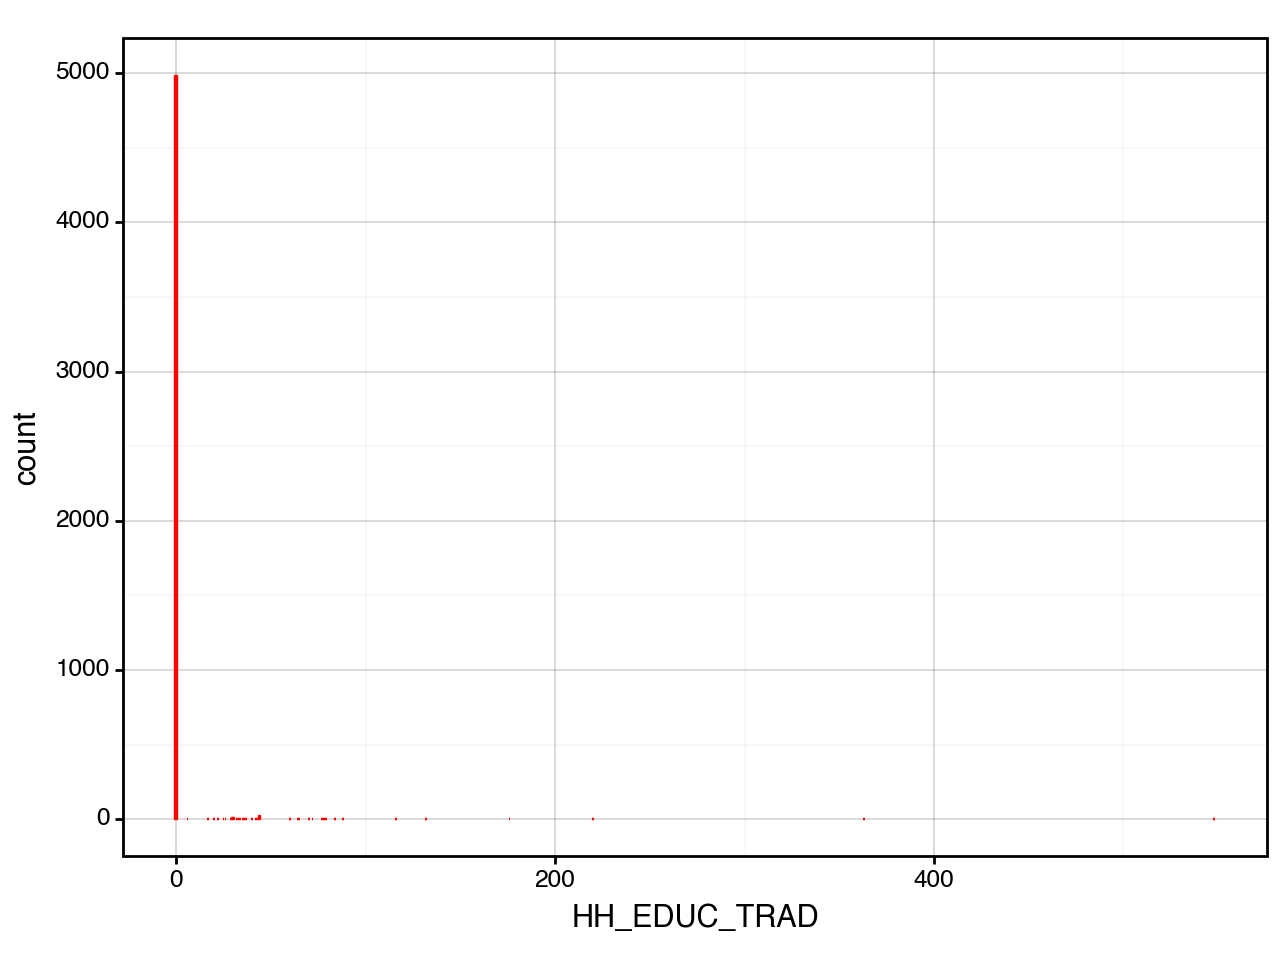

<Figure Size: (640 x 480)>

In [222]:
(ggplot(df_regiones)+
 aes(x="HH_EDUC_TRAD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

DC_TOT(Total de Docentes en el establecimiento): Cuantitativa

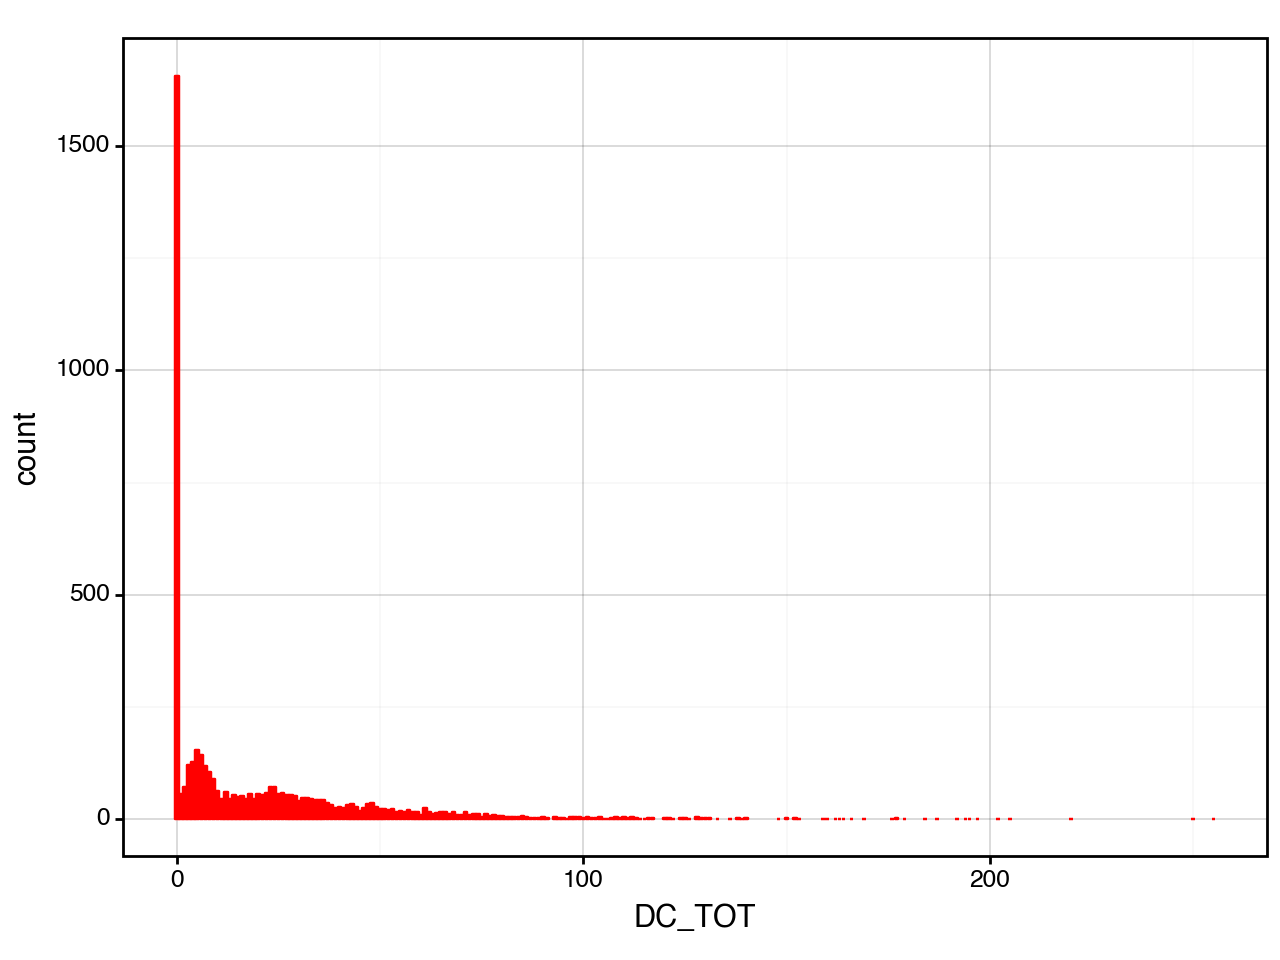

<Figure Size: (640 x 480)>

In [223]:
(ggplot(df_regiones)+
 aes(x="DC_TOT")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

HH_TOT(Total de Horas de contrato en el establecimiento): Cuantitativa

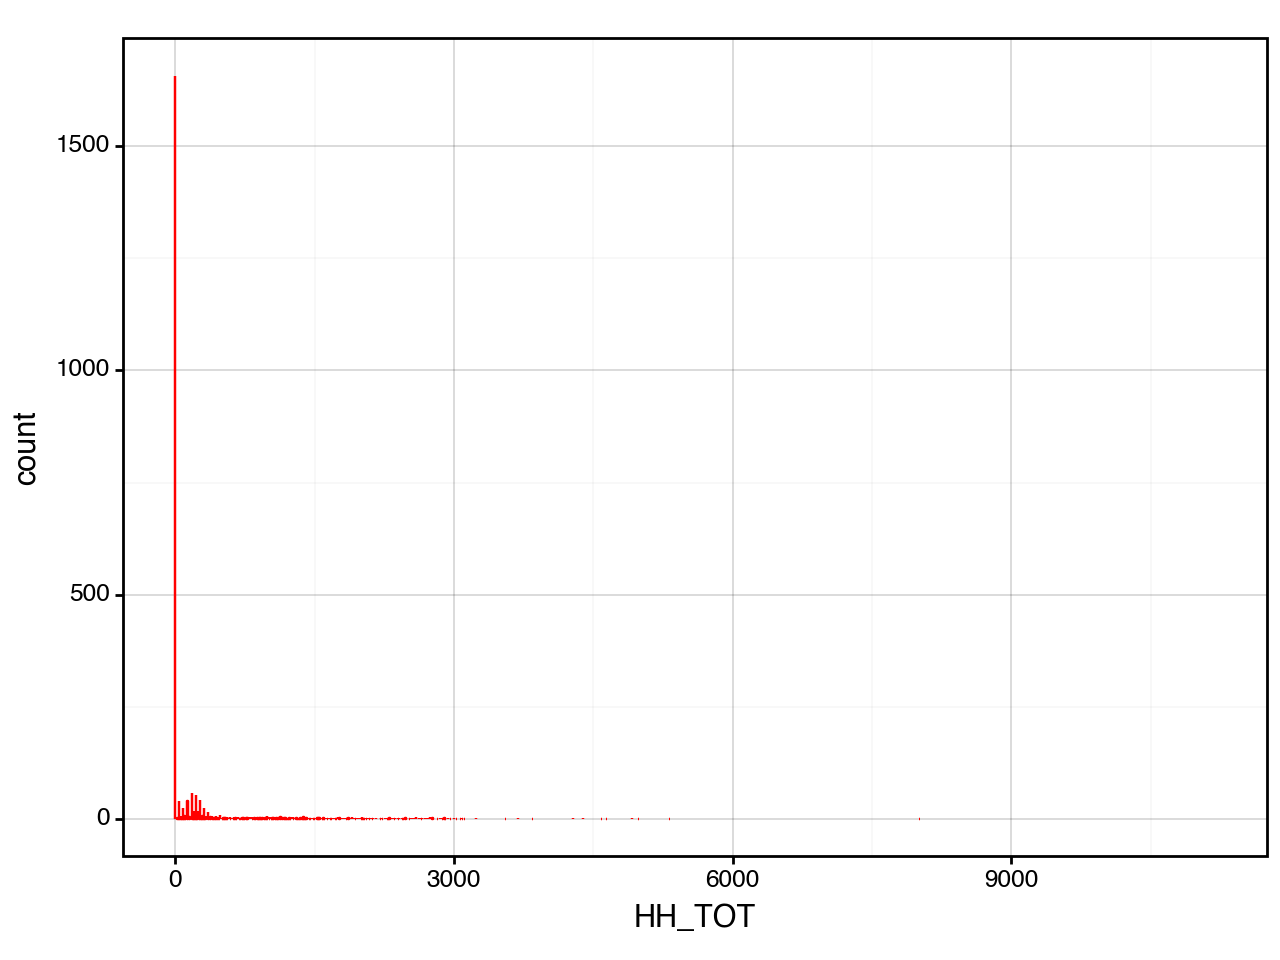

<Figure Size: (640 x 480)>

In [224]:
(ggplot(df_regiones)+
 aes(x="HH_TOT")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

**3.2 Pregunta 1 (test de independencia)**

Los docentes UTP (Unidad Tecnico Pedagogica) en Chile son profesionales de la educacion encargados de la coordinacion pedagogica y tecnica en las instituciones educativas. Se dedican a la planificacion, evaluacion y seguimiento del rendimiento academico de los estudiantes, ofrecen apoyo y orientacion a otros docentes, participan en el desarrollo profesional y gestionan aspectos curriculares. Tambien mantienen comunicacion con los padres para informarles sobre el progreso de los estudiantes, desempeñando un papel fundamental en la mejora de la calidad educativa en
el paıs.

1. Obtenga un grafico apropiado que le permita estudiar la distribucion del numero de docentes pertenecientes a
la planta UTP en los establecimientos educacionales de sus regiones. Discuta las caracterısticas mas relevantes
presentes en sus graficos

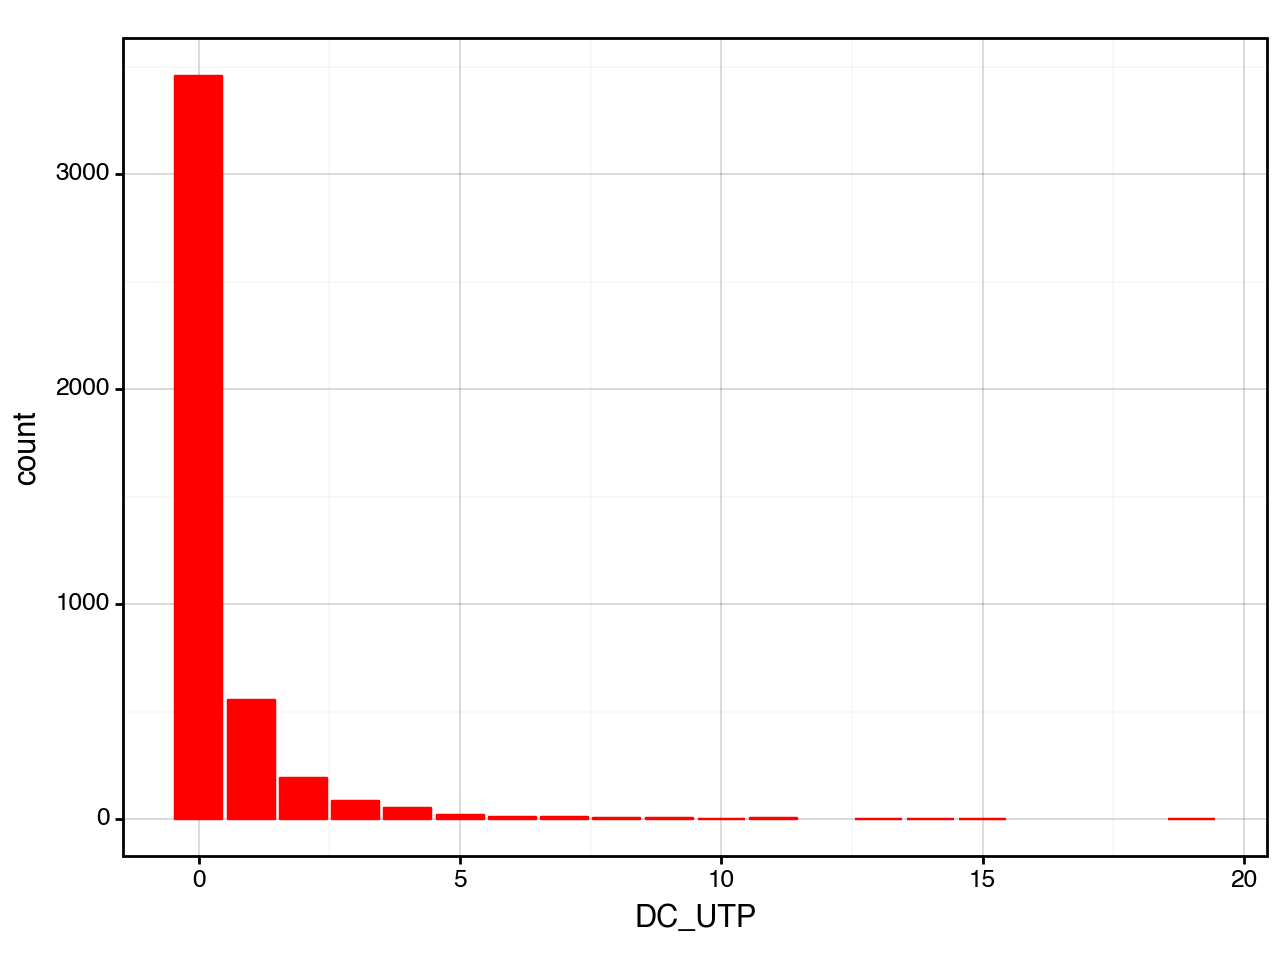

<Figure Size: (640 x 480)>

In [225]:
(ggplot(df_stgo)+
 aes(x="DC_UTP")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

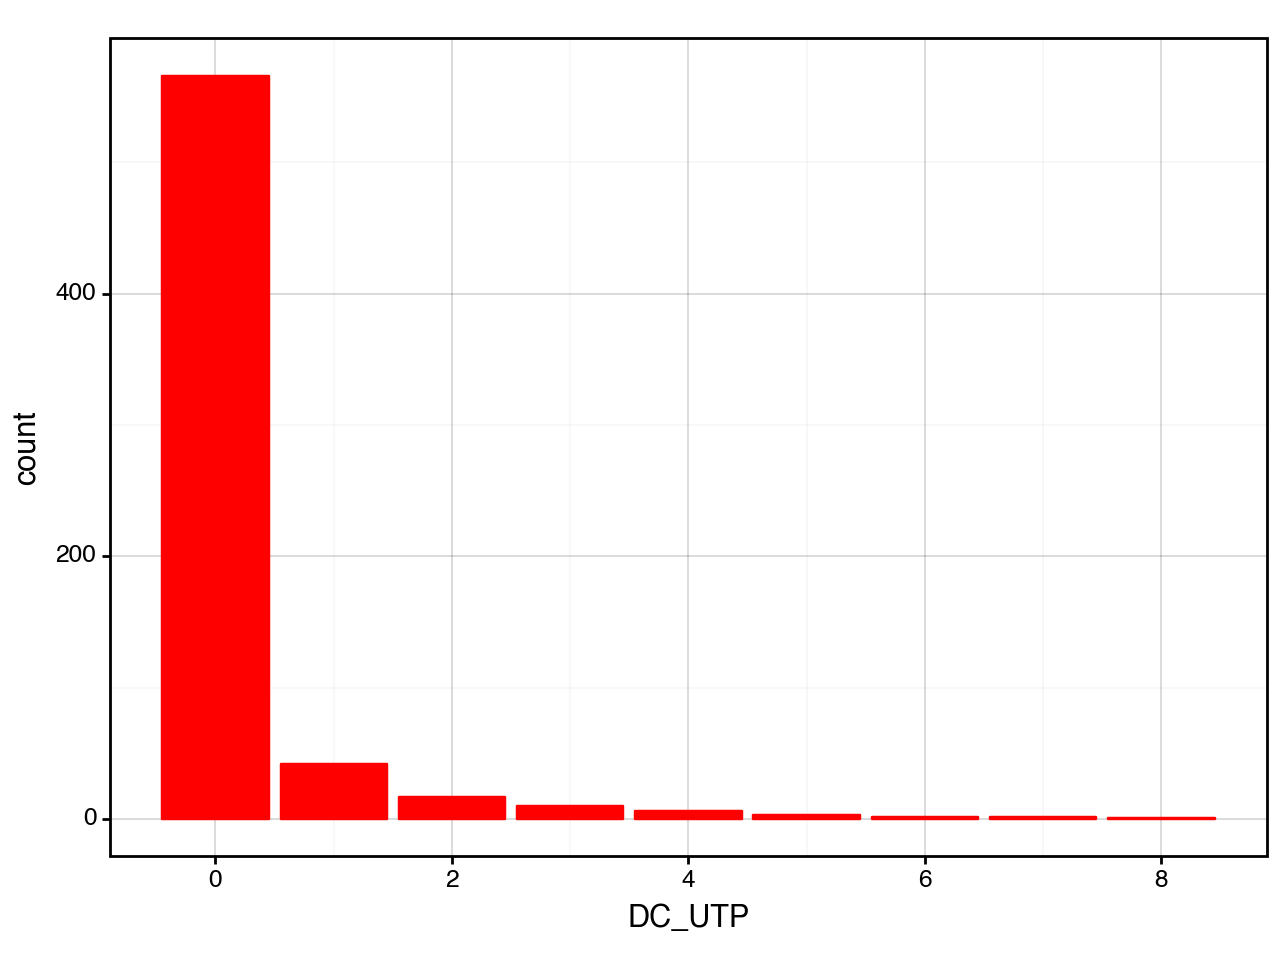

<Figure Size: (640 x 480)>

In [226]:
(ggplot(df_nuble)+
 aes(x="DC_UTP")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

Para realizar estos gráficos utilizamos ggplot. A través de lo que nos indican los gráficos nos podemos dar cuenta que en la región metropolitana hay mayor cantidad de docentes UTP que en la región del Ñuble, esto se puede deber a que en la región metropolitana hay un mayor números de establecimientos, lo que puede implicar que en está región se pueda requerir un mayor apoyo pedagógico y coordinación al ser más habitantes

2. Al Ministerio de Educacion le preocupa que existan diferencias en el numero de docentes UTP entre los distintos tipos de establecimientos (municipales, particulares subvencionados y particulares pagados). Implemente un test de independencia chi-cuadrado que le permita concluir si existe dependencia entre el tipo de establecimiento: (solo considere municipales, particulares subvencionados y particulares pagados) y el numero
de docentes UTP. En particular:

• Reporte la tabla de frecuencias observadas y esperadas.

• Reporte el p-valor obtenido y concluya con un valor α = 0.05. Interprete sus resultados.

In [227]:
# Filtrar los tipos de establecimientos de interés: municipales (1), particulares subvencionados (2) y particulares pagados (3)
tipos_establecimiento_interes = [1, 2, 3]
df_filtrado = df_regiones[df_regiones['COD_DEPE2'].isin(tipos_establecimiento_interes)]

# Calcular la tabla de contingencia para el número de docentes UTP y el tipo de establecimiento
tabla_contingencia = pd.crosstab(df_filtrado['COD_DEPE2'], df_filtrado['DC_UTP'])
print("Tabla de Frecuencias Observadas (se muestra así para entender el formato y luego pasar a df ya que de otro modo no funciona el codigo):")
print(tabla_contingencia)

tabla_contingencia=(np.array(tabla_contingencia))

# Realizar el test chi-cuadrado de independencia
chi2, p_valor, tabla_esperada, _ = chi2_contingency(tabla_contingencia)
print("\nTabla de Frecuencias Observadas:")
print(tabla_contingencia)

# Calcular la tabla de frecuencia esperada
total_observaciones = tabla_contingencia.sum()
fila_totals = tabla_contingencia.sum(axis=1)
columna_totals = tabla_contingencia.sum(axis=0)

# Calcular la tabla de frecuencia esperada usando la fórmula
tabla_frecuencia_esperada = np.outer(fila_totals, columna_totals) / total_observaciones
np.set_printoptions(precision=2, suppress=True)
print("\nTabla de Frecuencia Esperada:")
print(tabla_frecuencia_esperada)
print("\nP-valor obtenido:", p_valor)

# Interpretar los resultados con α = 0.05
alpha = 0.05
if p_valor < alpha:
    print("\nEl p-valor es menor que alpha (0.05), se rechaza la hipótesis nula.")
    print("Hay evidencia suficiente para afirmar una asociación significativa entre el tipo de establecimiento y el número de docentes UTP.")
else:
    print("\nEl p-valor es mayor que alpha (0.05), no se rechaza la hipótesis nula.")
    print("No hay suficiente evidencia para afirmar una asociación significativa entre las variables.")


Tabla de Frecuencias Observadas (se muestra así para entender el formato y luego pasar a df ya que de otro modo no funciona el codigo):
DC_UTP       0    1    2   3   4   5   6   7   8   9   10  11  13  14  15  19
COD_DEPE2                                                                    
1           964  167   61  34  11   2   4   2   2   1   0   1   1   0   0   0
2          2092  346  123  53  34  13   7   6   2   4   2   3   0   1   0   1
3           888   56   20   7  10   6   1   5   1   2   0   2   0   1   1   0

Tabla de Frecuencias Observadas:
[[ 964  167   61   34   11    2    4    2    2    1    0    1    1    0
     0    0]
 [2092  346  123   53   34   13    7    6    2    4    2    3    0    1
     0    1]
 [ 888   56   20    7   10    6    1    5    1    2    0    2    0    1
     1    0]]

Tabla de Frecuencia Esperada:
[[ 998.58  144.07   51.65   23.8    13.93    5.32    3.04    3.29    1.27
     1.77    0.51    1.52    0.25    0.51    0.25    0.25]
 [2146.55  309.68  1

3. Obtenga un grafico apropiado para mostrar la distribucion del numero de docentes de planta UTP por establecimiento. Finalmente, muestre como esa distribucion cambia (o no) para los distintos establecimientos: Municipales, particulares suvencionados y particulares pagados. Incluya una breve discusion sobre si lo que observa en sus graficos concuerda con lo obtenido en la implementacion del test anterior.

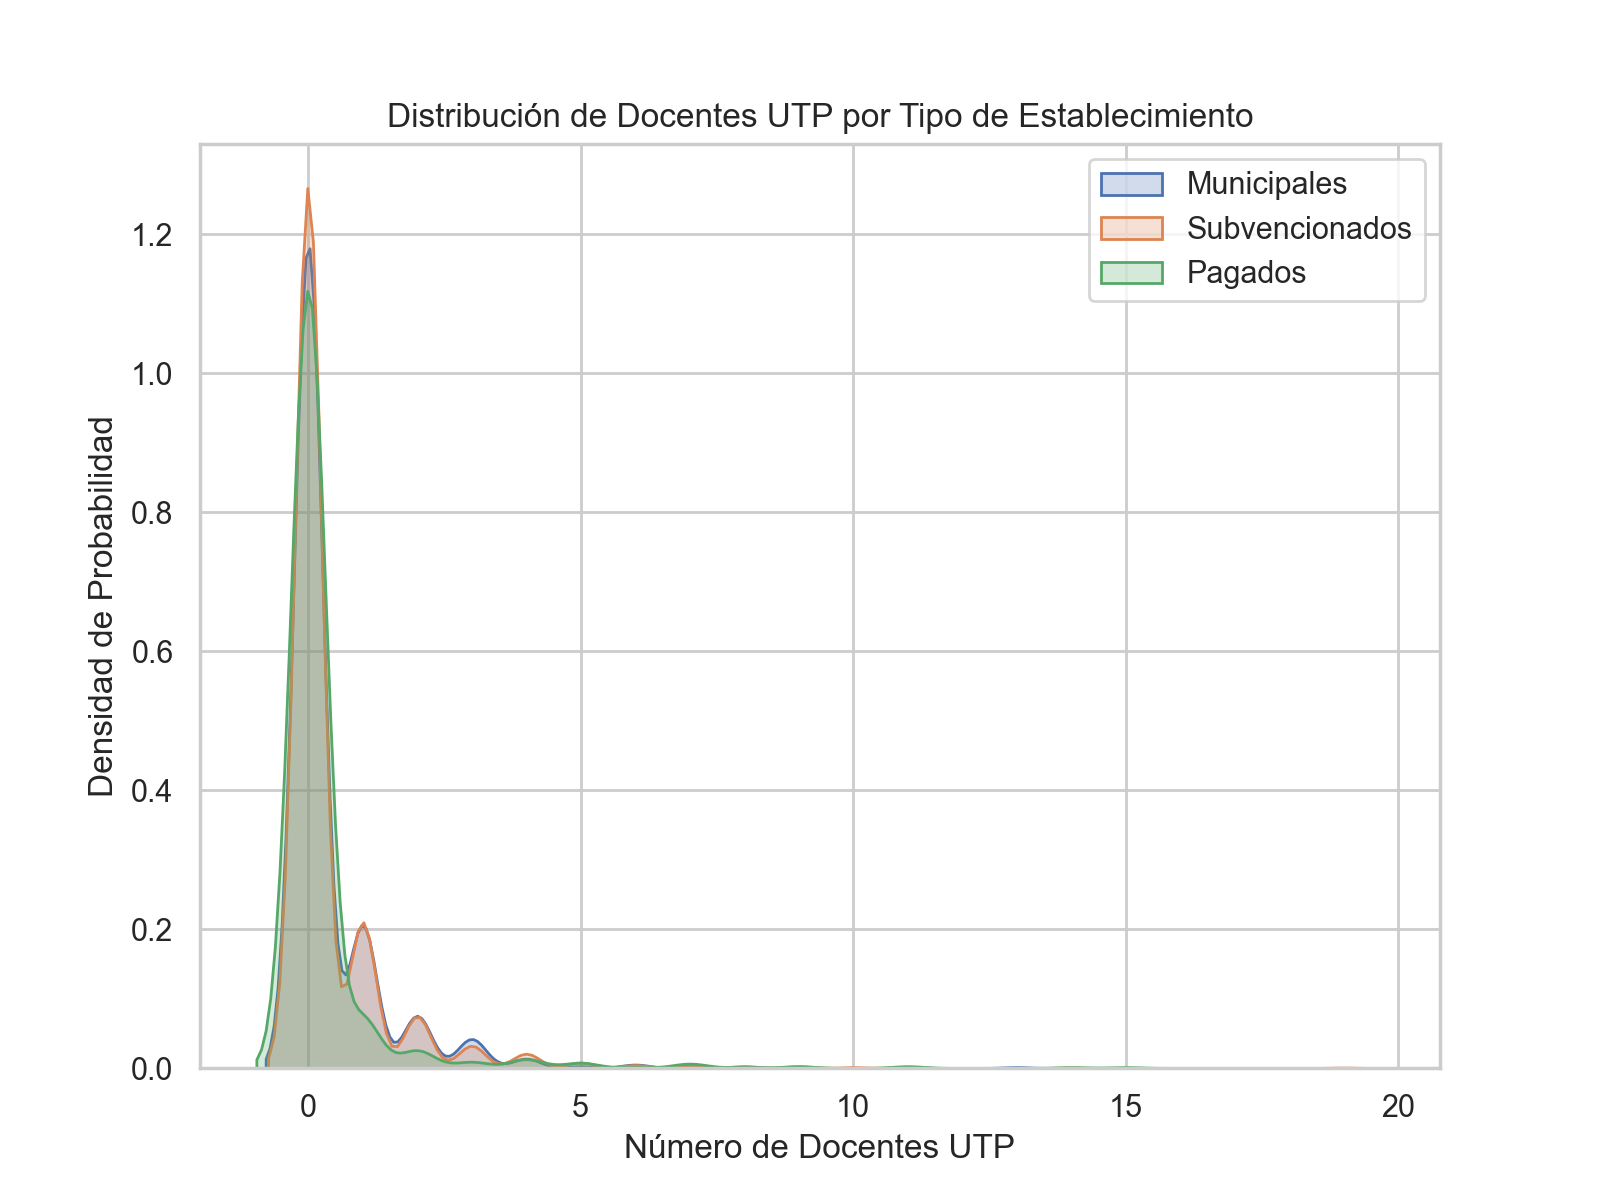

In [228]:
# Filtrar los datos por tipo de establecimiento
municipales = df_regiones[df_regiones['COD_DEPE2'] == 1]['DC_UTP']
subvencionados = df_regiones[df_regiones['COD_DEPE2'] == 2]['DC_UTP']
pagados = df_regiones[df_regiones['COD_DEPE2'] == 3]['DC_UTP']

# Gráfico de densidad para comparar las distribuciones
plt.figure(figsize=(8, 6))
sns.kdeplot(municipales, fill=True, label='Municipales')
sns.kdeplot(subvencionados, fill=True, label='Subvencionados')
sns.kdeplot(pagados, fill=True, label='Pagados')
plt.title('Distribución de Docentes UTP por Tipo de Establecimiento')
plt.xlabel('Número de Docentes UTP')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

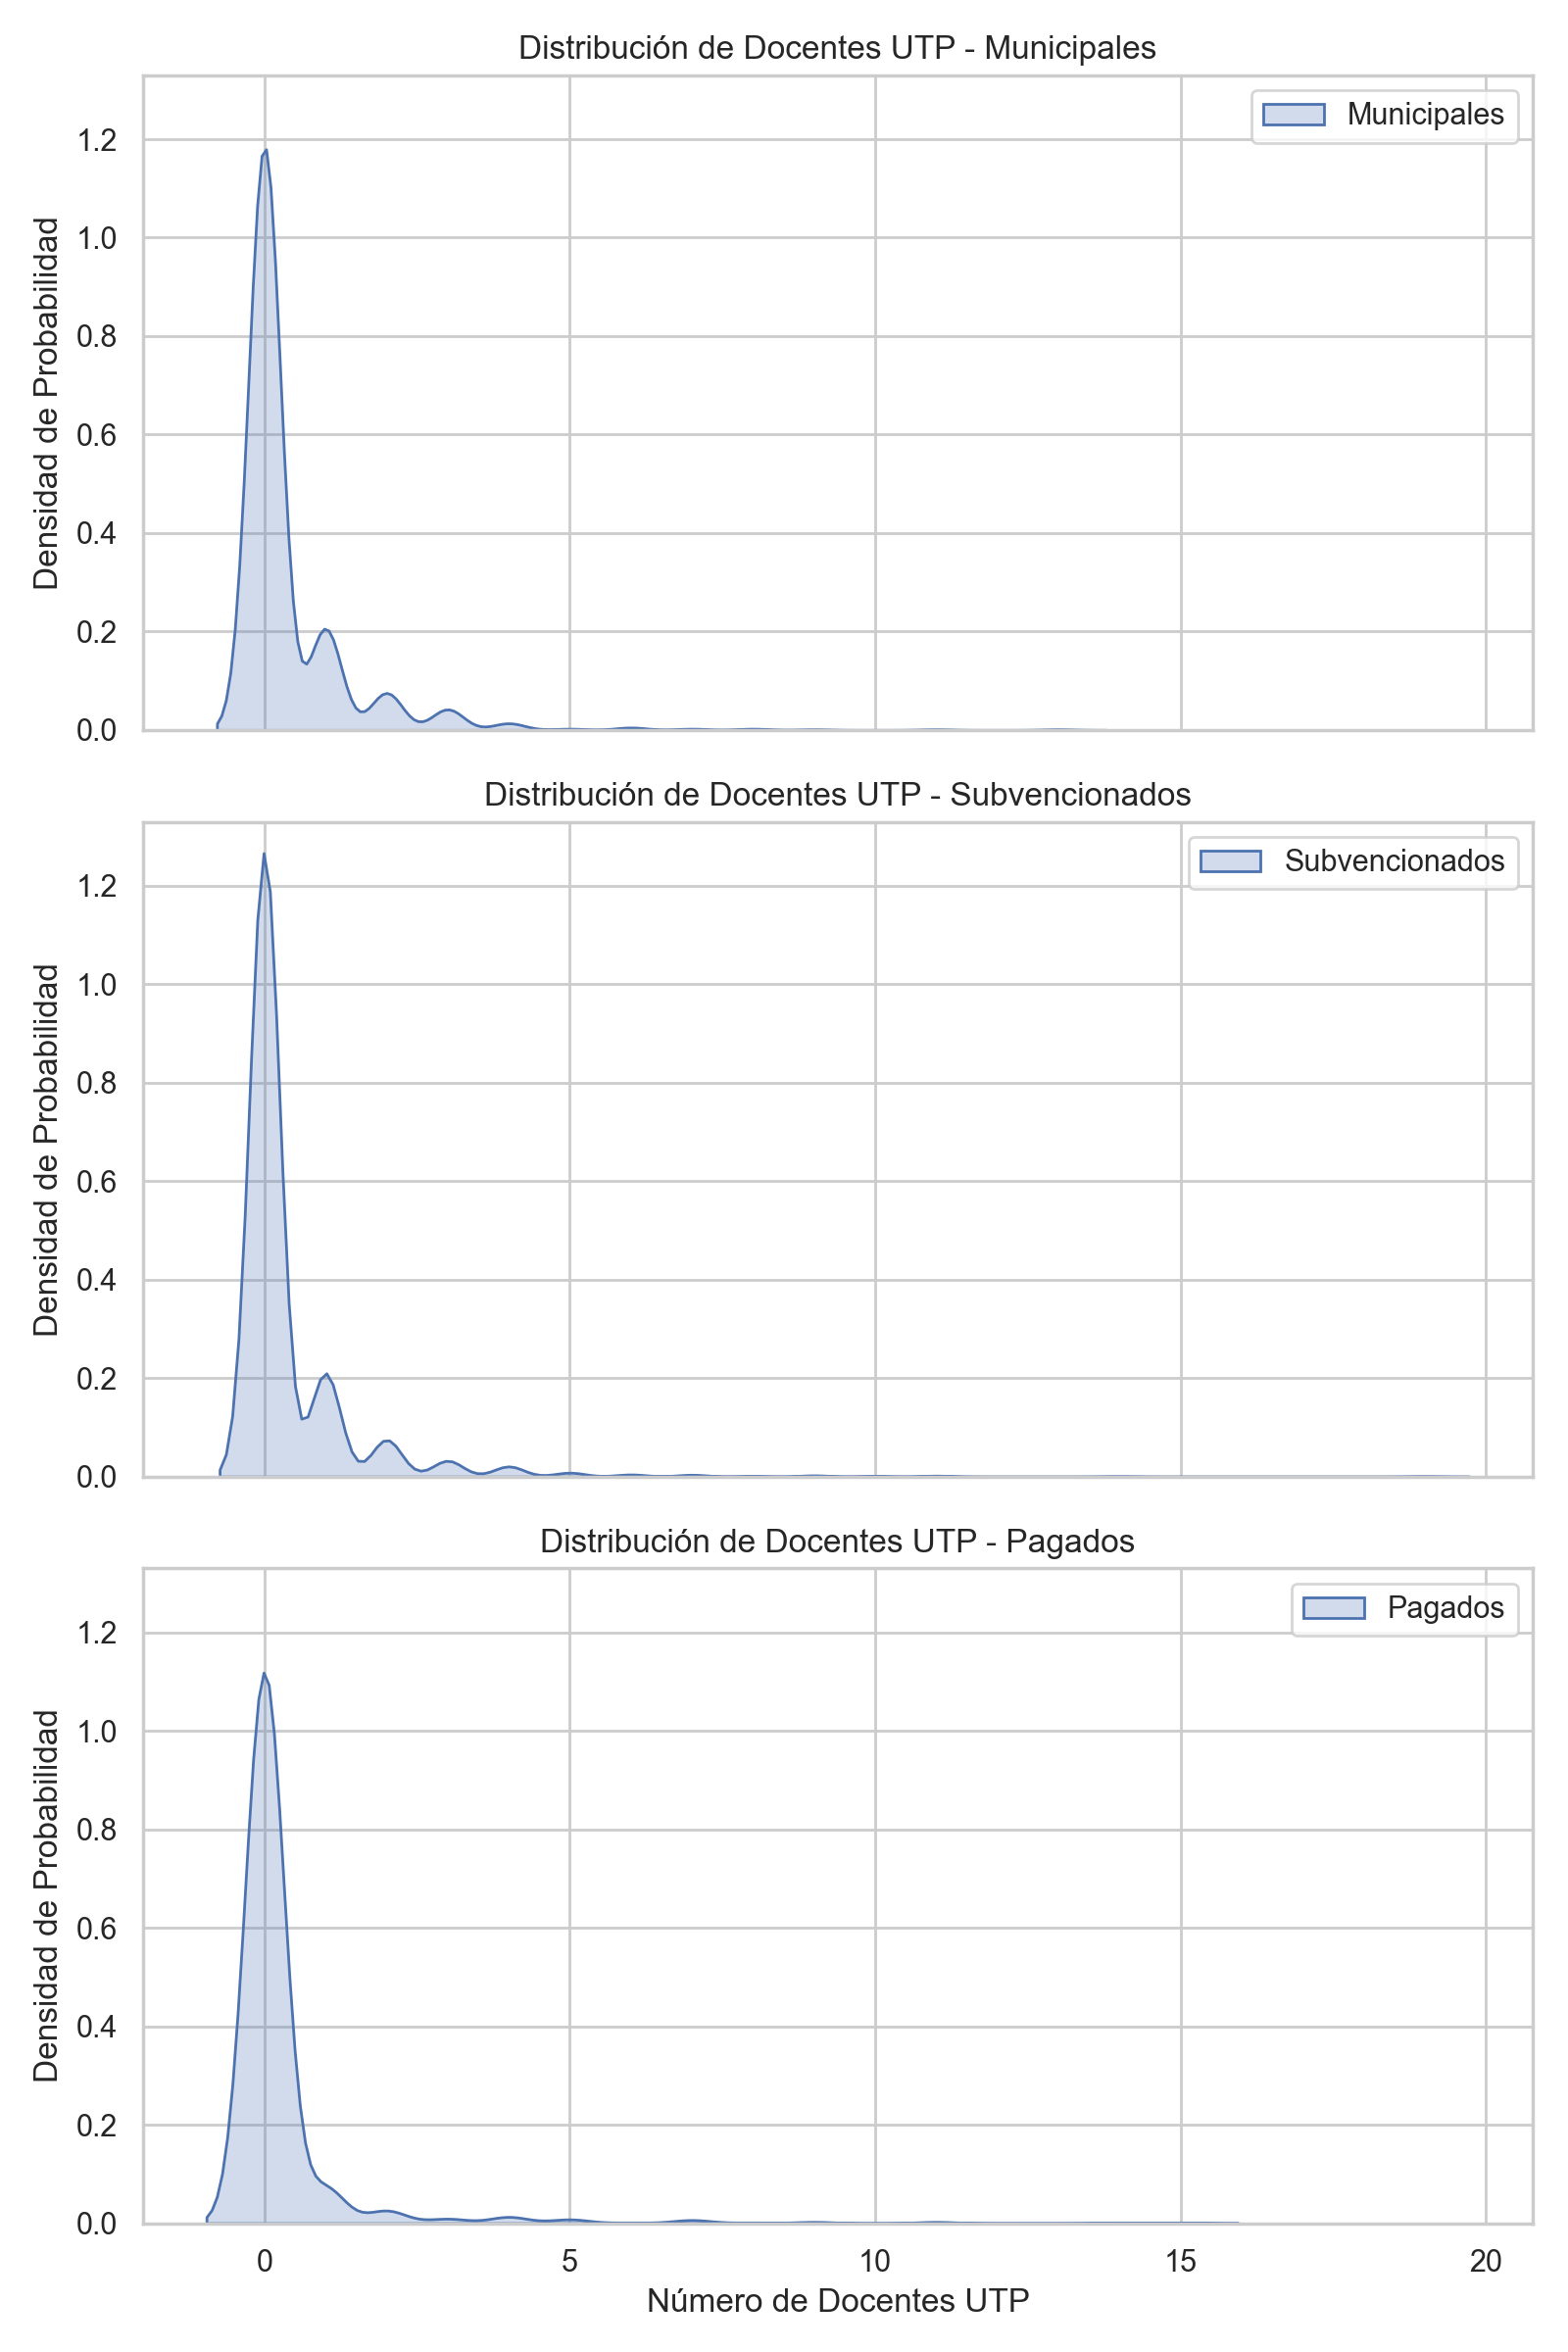

In [229]:
sns.set(style="whitegrid")

# Creamos subgráficos para cada tipo de establecimiento
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True, sharey=True)

# Gráfico de densidad para municipales
sns.kdeplot(municipales, ax=axs[0], fill=True, label='Municipales')
axs[0].set_title('Distribución de Docentes UTP - Municipales')
axs[0].set_ylabel('Densidad de Probabilidad')
axs[0].legend()

# Gráfico de densidad para subvencionados
sns.kdeplot(subvencionados, ax=axs[1], fill=True, label='Subvencionados')
axs[1].set_title('Distribución de Docentes UTP - Subvencionados')
axs[1].set_ylabel('Densidad de Probabilidad')
axs[1].legend()

# Gráfico de densidad para pagados
sns.kdeplot(pagados, ax=axs[2], fill=True, label='Pagados')
axs[2].set_title('Distribución de Docentes UTP - Pagados')
axs[2].set_xlabel('Número de Docentes UTP')
axs[2].set_ylabel('Densidad de Probabilidad')
axs[2].legend()

plt.tight_layout()
plt.show()

Podemos interpretar que si hay relación entre ambas variables y el tipo de establecimiento, ya que el cambio en el número de los docentes UTP dependiendo si el establecimiento es municipal, subvencionado o pagado no es tan significativo, sin embargo, se observa que hay más docentes UTP en los establecimientos municipales y subvencionados, ya que en el caso de los pagados, la distribucion se ve en casi en su totalidad distribuida en el cero.



**3.3 Pregunta 2 (test de bondad de ajuste)**

En Chile, las “Horas de Contrato” (variable HH_A) para los docentes de aula se refieren a la cantidad de horas que los
profesores est´an contratados para trabajar en una institucion educativa durante un perıodo especıfico, generalmente
un año escolar. La cantidad de horas de contrato puede variar segun el nivel educativo y el tipo de establecimiento
educacional.
En el contexto de un estudio educativo, se plantea la hipotesis de que las Horas de Contrato de los Docentes
de Aula siguen una distribucion exponencial. Para investigar esta afirmacion, sigua los siguientes pasos:

1. Analisis Visual: Genere un histograma de densidad para la variable en cuestion y añada en este grafico la funcion de densidad asociada a la distribucion exponencial. Disculta sobre la factibilidad de la hipotesis planteada en el estudio utilizando el histograma generado.

**Hint**: Recuerde que la densidad de la distribucion exponencial esta dada por:
f(x) = λ exp{−λx},
y que para la construccion de su grafico es razonable estimar el parametro λ usando X¯ −1 donde X¯ representa el promedio de HH_A.

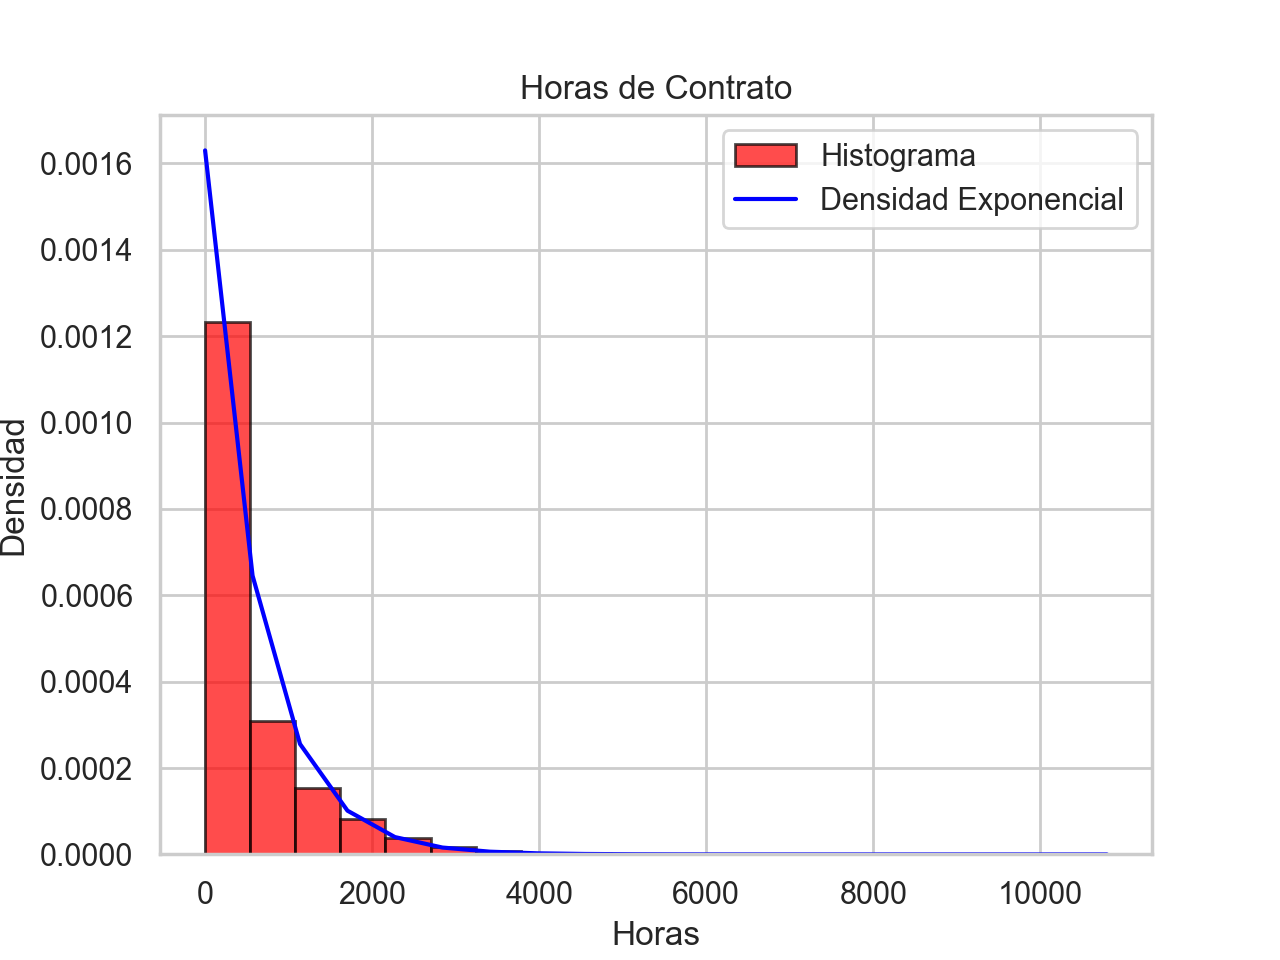

In [230]:
# Calculamos el promedio de HH_A
promedio_horas = df_regiones["HH_A"].mean()

# Creamos un histograma de las horas de contrato
plt.hist(df["HH_A"], bins=20, density=True, color="red", edgecolor="black", alpha=0.7, label="Histograma")

# Creamos la función de densidad exponencial
x = np.linspace(0, max(df["HH_A"]), 20)
lambda_parametro = 1 / promedio_horas
densidad_exponencial = expon.pdf(x, scale=1/lambda_parametro)

# Agregamos la función de densidad al gráfico
plt.plot(x, densidad_exponencial, color="blue", label="Densidad Exponencial")

# Configurar el gráfico
plt.title("Horas de Contrato")
plt.xlabel("Horas")
plt.ylabel("Densidad")
plt.legend()
plt.show()

Este proceso, nos indicó a simple vista que el promedio de la variable de horas de contrato tiene una distribución exponencial en el contexto del estudio educativo en Chile.

2. Evaluacion Estadıstica: Implemente un test de hipotesis de bondad de ajuste con un nivel de significancia de α = 0.05 que le permita concluir sobre la hipotesis planteada en el estudio. Recuerde que el test de bondad
de ajuste le permite analizar si los datos se comportan como una distribucion en especıfico.

In [231]:
promedio_horas = df_regiones["HH_A"].mean()

# Crear la función de densidad exponencial
x = np.linspace(0, max(df["HH_A"]), 20)
lambda_parametro = 1 / promedio_horas
densidad_exponencial = stats.expon.pdf(x, scale=1/lambda_parametro)

# Ajustar la distribución exponencial al histograma
freq, _ = np.histogram(df["HH_A"], bins=20, density=True)
expected = densidad_exponencial * np.sum(freq)
observed = freq

# Calcular el estadístico chi-cuadrado y el p-valor
chi_squared_stat = np.sum((observed - expected) ** 2 / expected)
p_value = 1 - stats.chi2.cdf(chi_squared_stat, df=len(observed) - 1)

# Mostrar el p-valor
print("El p-valor es:", p_value)

# Establecer el nivel de significancia
alpha = 0.05

# Comprobar la significancia estadística
if p_value < alpha:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución exponencial.")
else:
    print("No se puede rechazar la hipótesis nula: los datos podrían seguir una distribución exponencial.")

El p-valor es: 0.9999999995854396
No se puede rechazar la hipótesis nula: los datos podrían seguir una distribución exponencial.


3.4 Pregunta 3 (regresion lineal simple y multiple)

1. Regresion lineal simple: Implemente un modelo de regresion lineal simple que le permita modelar las
Horas de Contrato de los Docentes de Aula (variable HH_A) en funcion del Total de Docentes de aula (variable
DC_A).
Los pasos que debera realizar para dar respuesta a esta pregunta son:

(a) Obtenga la correlacion entre las variables involucradas.

In [232]:
correlacion = df_regiones['DC_A'].corr(df['HH_A'])
print(f"La correlación entre las variables de las Horas de Contrato de los Docentes de Aula y Total de Docentes de aula es: {correlacion}")

La correlación entre las variables de las Horas de Contrato de los Docentes de Aula y Total de Docentes de aula es: 0.9918627362907678


(b) Visualize la relacion entre las variables

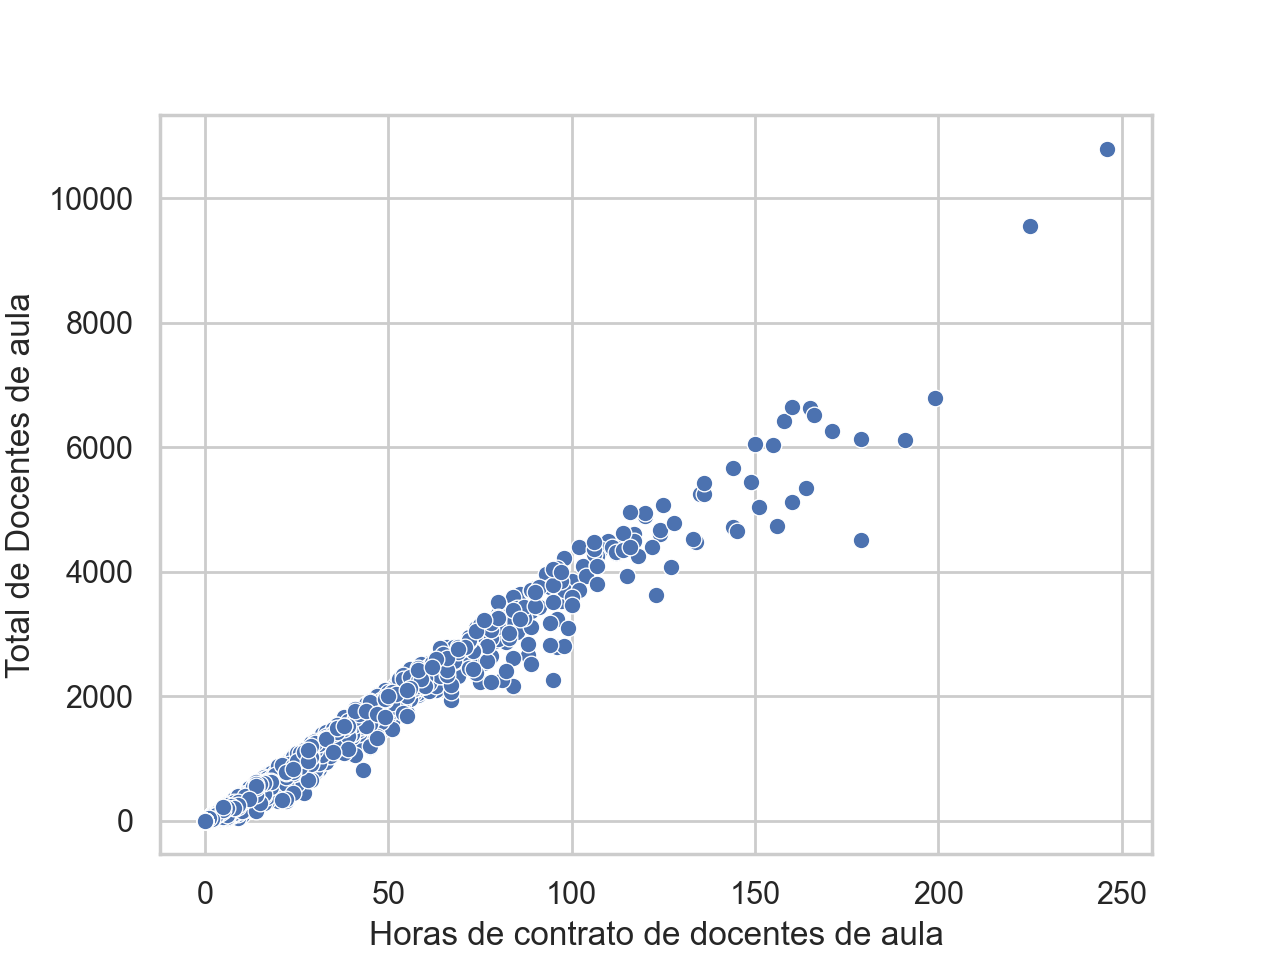

In [233]:
sns.scatterplot(df_regiones, x="DC_A", y="HH_A")
plt.xlabel("Horas de contrato de docentes de aula")
plt.ylabel("Total de Docentes de aula")
plt.show()

(c) Separe los datos en conjuntos de datos de entrenamiento y testeo. Luego ajuste el modelo de regresion.

In [234]:
# Utilizando solo las columnas 'DC_A' y 'HH_A' para el entrenamiento
X = df_regiones[['DC_A']]
y = df_regiones["HH_A"]

# Dividiendo los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creando el modelo de regresión lineal
modelo = LinearRegression()

# Entrenando el modelo
modelo.fit(X_train, y_train)

LinearRegression()

(d) Muestre en una tabla los coeficientes obtenidos (Intercepto y pendiente). Interprete sus resultados.

In [235]:
intercepto= modelo.intercept_
pendiente= modelo.coef_

resultados = pd.DataFrame({
    'Coeficiente': ['Intercepto', 'Pendiente'],
    'Valor': [intercepto, pendiente]
})

resultados

,Coeficiente,Valor
0,Intercepto,-14.35
1,Pendiente,[37.89996002595667]


En esta oportunidad, el intercepto nos informa el valor estimado de cuántas horas de contrato de docentes de aula cuando no hay docentes en el aula. Por otra parte, la pendiente, ya que es positiva, nos señala que a medida de que aumente el número total de docentes, se estima que las horas de contrato también aumentarán.

(e) Visualize el modelo de regresion utilizando los coeficientes encontrados en el paso anterior.

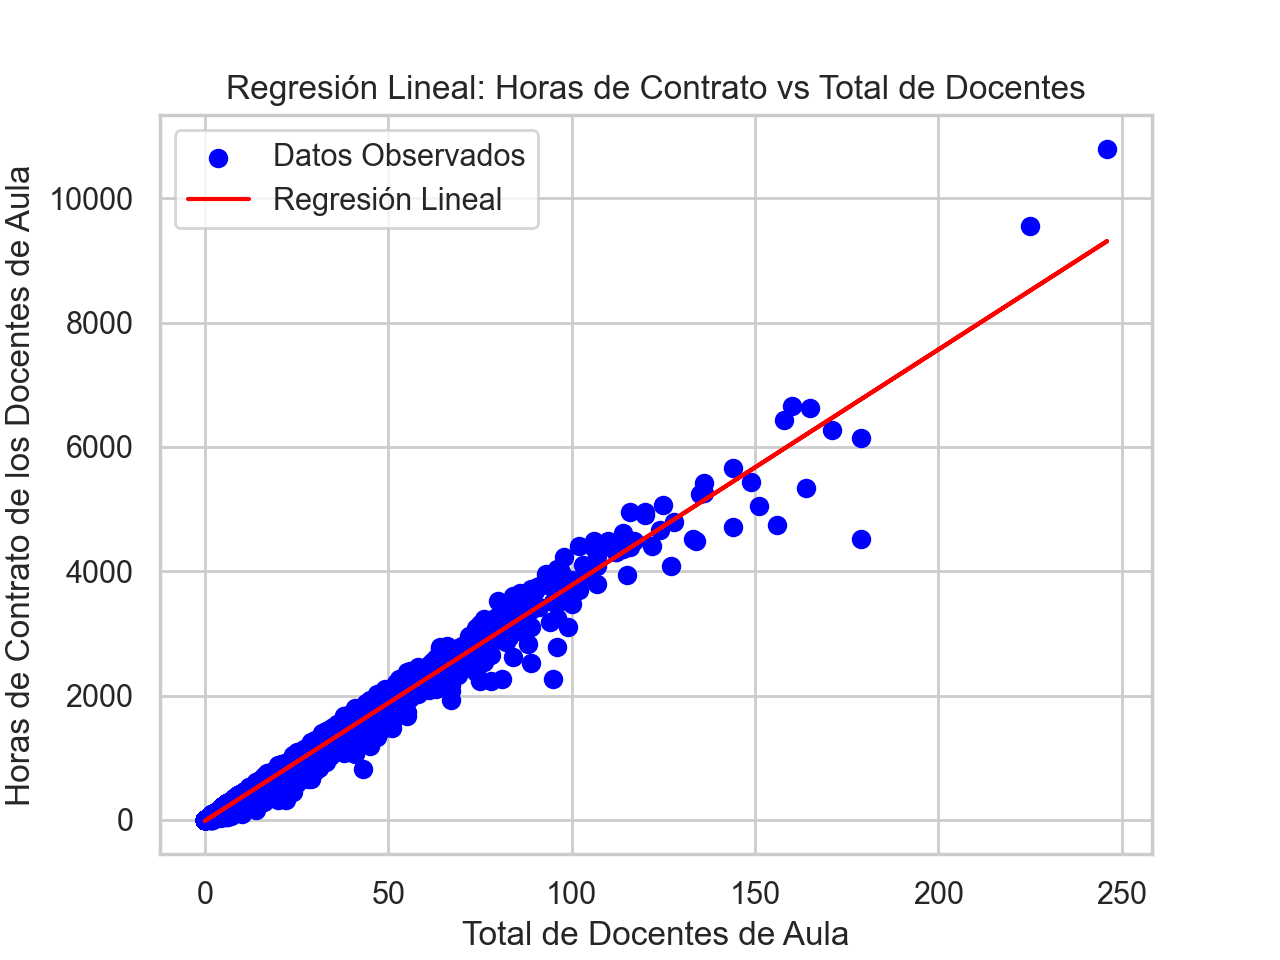

In [236]:
plt.scatter(X_train, y_train, color='blue', label='Datos Observados')
plt.plot(X_train, modelo.predict(X_train), color='red', label='Regresión Lineal')
plt.xlabel('Total de Docentes de Aula')
plt.ylabel('Horas de Contrato de los Docentes de Aula')
plt.title('Regresión Lineal: Horas de Contrato vs Total de Docentes')
plt.legend()
plt.show()

(f) Obtenga y comente el coeficiente de determinacion obtenido.

In [237]:
y_pred = modelo.predict(X_train)

# Calcular el coeficiente de determinación
r2 = r2_score(y_train, y_pred)

print(f"Coeficiente de determinación (R^2): {r2}")

Coeficiente de determinación (R^2): 0.9840123346922134


Que nos haya dado un valor de 0.98 sugiere que el modelo en cuestión explica el 98% de la variabilidad en la variable dependiente que es: Horas de Contrato de los Docentes de Aula, a partir de la variable independiente: Total de Docentes de Aula. Que hayamos obtenido un R^2 cercan a 1, indica que el modelo podra predecir con buena exactitud las Horas de Contrato de los Docentes de Aula en relación con el Total de Docentes de Aula.

(g) Evalue su modelo utilizando los datos del set de testeo. 
Para esto, calcule el MSE y RMSE predictivos
(error cuadratico medio y raız del error cuadratico medio). ¿Que significan los valores obtenidos?

In [238]:
# Haciendo predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calculando las métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse= np.sqrt(mse)

print(f"error cuadratico medio: {mse}")
print(f"raiz cuadrada del error cuadratico medio: {rmse}")
print(f"coeficiente de determinacion r2: {r2}")

error cuadratico medio: 14578.739957647813
raiz cuadrada del error cuadratico medio: 120.74245300493034
coeficiente de determinacion r2: 0.982799829782726


 Podemos interpretar a partir del ECM que la distancia entre las predicciones y los valores reales es relativamente grande, sin embargo, tomando en cuenta la escala de los datos, se considera aceptable un ECM y un RMSE de esa magnitud. 

2. Regresion lineal multiple: En esta pregunta se le pide que implemente un modelo de regresion lineal
multiple para modelar las Horas de Contrato de los Docentes de Aula (variable HH_A) en funcion del Total
de Docentes de aula (variable DC_A) y de tres variables mas que usted debe escoger. Para escoger
estas variables usted debe usar criterios claros y objetivos (por ejemplo, puede elegir las variables que mas se
correlacionan con la variable dependiente).
Utilizando la misma separacion de entrenamiento y testing realizada en el ıtem anterior responda: ¿Que
impacto tienen las variable adicionales en el rendimiento de su modelo? Comente en funcion de los nuevas
metricas obtenidas (error cuadratico medio y R2).

In [239]:
# usamos esto para saber cuales son las variables que mas se correlacionan 
df_numeric = df_regiones.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
print(correlation_matrix['HH_A'])

AGNO               NaN
RBD              -0.21
DGV_RBD          -0.01
COD_REG_RBD      -0.06
COD_PRO_RBD      -0.06
COD_COM_RBD      -0.06
COD_DEPROV_RBD    0.06
COD_DEPE         -0.08
COD_DEPE2        -0.04
RURAL_RBD        -0.11
ESTADO_ESTAB     -0.41
DC_A              0.99
HH_A              1.00
DC_UTP            0.46
HH_UTP            0.47
DC_PDIR           0.53
HH_PDIR           0.54
DC_DIR            0.50
HH_DIR            0.53
DC_OES            0.49
HH_OES            0.50
DC_OF             0.18
HH_OF             0.18
DC_JUTP           0.43
HH_JUTP           0.44
DC_IG             0.54
HH_IG             0.55
DC_OR             0.51
HH_OR             0.51
DC_DIR_SOST       0.12
HH_DIR_SOST       0.13
DC_TP_SOST        0.26
HH_TP_SOST        0.26
DC_SUP_SOST       0.07
HH_SUP_SOST       0.07
DC_SUBDIR         0.30
HH_SUBDIR         0.30
DC_PROF_ENC      -0.08
HH_PROF_ENC      -0.08
DC_EDUC_TRAD      0.08
HH_EDUC_TRAD      0.08
DC_TOT            0.99
HH_TOT            0.99
Name: HH_A,

In [240]:
# Seleccionamos las variables independientes
X = df_regiones[['DC_A', 'HH_TOT', 'DC_TOT', 'HH_IG']]
# Seleccionamos la variable dependiente
y = df_regiones['HH_A']
# Dividimos los datos de conjuntos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
# Entrenar el modelo
regressor.fit(X_train, y_train)
# Haz predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)
# Calcula el error cuadrático medio y el coeficiente de determinación R^2
emse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')
print(f'Coeficiente de determinación R^2: {r2}')

Error cuadrático medio: 14578.739957647813
Coeficiente de determinación R^2: 0.9986054874471127


Podemos deducir que el modelo de regrecion lineal es bueno yaque tiene un error cuadratico medio es relatibamnete pequeño esto nos indica que no esta sobre entrenado y el Coeficiente de derminacion esa muy secano al 1 y nos indica que el modelo se esta adaptando de forma correcta a los datos entregados.

**3.5 Pregunta 4 (clasificacion y validacion)**

En esta pregunta se le pide que implemente dos modelos de clasificacion: Support Vector Machine y Regresion
Logıstica. El objetivo es generar un modelo que prediga si la variable Horas de Contrato de los Docentes de Aula
(variable HH A) es mayor a 160 horas. Los modelos deben ser implementados usando validacion simple y K-Fold
Cross validation. Los pasos para responder la pregunta son:

1. Genere una nueva variable a partir de Horas de Contrato de los Docentes de Aula (variable HH A) que tome
el valor de 1 si supera las 160 horas, y tenga valor 0 si es menor o igual a este valor.

In [241]:
df_regiones.loc[df["HH_A"] <= 160, "HH_A_BINARIO"] = 0
df_regiones.loc[df["HH_A"] > 160, "HH_A_BINARIO"] = 1

/var/folders/39/m6n3f2ns5lz21nbwqtf6m5xc0000gn/T/ipykernel_63985/2948221448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [242]:
df_regiones["HH_A_BINARIO"].unique()

array([0., 1.])

2. Seleccione la variable Total de Docentes de aula (variable DC A) y las tres mejores variables. Para escoger
estas variables usted debe justificar usando criterios claros y objetivos.

In [243]:
variables_cuantitativas = df_regiones.select_dtypes(include=['int', 'float'])
corr_matrix = variables_cuantitativas.corr()
corr_matrix['HH_A_BINARIO'].sort_values(ascending=False)

HH_A_BINARIO      1.00
HH_DIR            0.79
DC_DIR            0.77
DC_TOT            0.62
HH_TOT            0.62
DC_A              0.60
HH_A              0.59
HH_JUTP           0.48
DC_JUTP           0.48
DC_IG             0.45
HH_IG             0.45
HH_OES            0.37
DC_OES            0.37
DC_PDIR           0.32
HH_PDIR           0.32
DC_OR             0.31
HH_OR             0.31
DC_UTP            0.30
HH_UTP            0.29
DC_TP_SOST        0.18
HH_TP_SOST        0.18
HH_SUBDIR         0.17
DC_SUBDIR         0.17
DC_OF             0.14
HH_OF             0.13
DC_DIR_SOST       0.09
HH_DIR_SOST       0.09
COD_DEPROV_RBD    0.07
DC_SUP_SOST       0.07
DC_EDUC_TRAD      0.06
HH_EDUC_TRAD      0.06
HH_SUP_SOST       0.06
DGV_RBD           0.00
HH_PROF_ENC      -0.03
DC_PROF_ENC      -0.03
COD_PRO_RBD      -0.06
COD_COM_RBD      -0.06
COD_REG_RBD      -0.07
RURAL_RBD        -0.07
COD_DEPE2        -0.12
COD_DEPE         -0.15
RBD              -0.23
ESTADO_ESTAB     -0.66
AGNO       

Seleccionamos las variables HH_DIR, DC_DIR Y DC_TOT, al ser las que tienen mayor correlación con la variable de interes

3. Genere un nuevo dataframe que contenga: la variable Total de Docentes de aula, las 3 variables que escogio
y la nueva variable generada

In [244]:
df_4=df_regiones[["HH_A_BINARIO","HH_DIR","DC_DIR","DC_TOT","DC_A"]]


4. Con el data frame obtenido, aplique el modelo SVM utilizando la tecnica de validacion simple. Obtenga los
valores de las metricas: accuracy, recall, precision y f1 score. Explique como interpretarıa los resultados de
estas metricas.

In [245]:

X = df_4.drop("HH_A_BINARIO", axis=1)  
y = df_4["HH_A_BINARIO"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:{accuracy}\nRecall:{recall}\nPrecision:{precision}\nF1 Score:{f1}")

Accuracy:0.9674234945705824
Recall:0.961335676625659
Precision:0.9802867383512545
F1 Score:0.9707187222715172


El valor de Accuracy dió aproximadamente 0.9674, lo que significa que un 96% de las predicciones realizadas son correctas
El valor de Recall dió aproximadamente 0.96133, lo que indica que se idetificó correctamente el 96% de los docentes que tiene contratos mayor a 160 horas y el 4% de las veces no se identificó que los docentes tenían contratos mayor a 160 horas. 
El valor de la precision dió aproximadamente 0.9802, lo que indica que se identificó correctamente el 98% de los casos en los que la variable era positiva, es decir, de 100 predicciones positivas (horas de contrato mayor a 160) acertó 98 veces y erró en 2 ocasiones.
El valor de F1 dió aproximadamente 0.9707, esta metrica indica que hay un buen balance entre recall y precision, indicando un buen funcionamiento en la validación simple del modelo y de la división de los datos realizada.

5. Con el data frame obtenido, aplique el modelo Regresion Logıstica utilizando la tecnica de validacion simple.
Obtenga los valores de las metricas: accuracy, recall, precision y f1 score. Explique como interpretarıa los
resultados de estas metricas.

In [246]:
X = df_4.drop("HH_A_BINARIO", axis=1)
y = df_4["HH_A_BINARIO"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:{accuracy}\nRecall:{recall}\nPrecision:{precision}\nF1 Score:{f1}")

Accuracy:0.9703849950641659
Recall:0.9666080843585237
Precision:0.9803921568627451
F1 Score:0.9734513274336284


El valor de Accuracy dió aproximadamente 0.9703, lo que significa que un 97% de las predicciones realizadas son correctas
El valor de Recall dió aproximadamente 0.9666, lo que indica que se idetificó correctamente el 96% de los docentes que tiene contratos mayor a 160 horas y el 4% de las veces no se identificó que los docentes tenían contratos mayor a 160 horas. 
El valor de la precision dió aproximadamente 0.9803, lo que indica que se identificó correctamente el 98% de los casos en los que la variable era positiva, es decir, de 100 predicciones positivas (horas de contrato mayor a 160) acertó 98 veces y erró en 2 ocasiones.
El valor de F1 dió aproximadamente 0.9734, esta metrica indica que hay un buen balance entre recall y precision, indicando un buen funcionamiento en la validación simple del modelo y de la división de los datos realizada.

6. Mencione la principal deficiencia de aplicar validacion simple aplicada para este caso.

La principal deficiencia de aplicar la técnica de validación simple es que el modelo aplicado depende en gran medida de la forma en que se realizó la división entre los datos de prueba y de los de predicción.
Y si justo la división realizada resulta no ser representativa del conjunto de datos, los resultados del modelo pueden ser sesgados en base a dicha división, resultando en una predicción que no representa el resto de datos
Teniendo lo anterior en cuenta la principal deficiencia de la validación simple podría ser la dependencia a como se hizo la división de los datos del modelo.

7. Con el data frame obtenido, aplique el modelo SVM utilizando la tecnica de validacion cruzada. Obtenga
los valores de las metricas: accuracy, recall, precision y f1 score. Determine si su modelo se encuentra sobre
entrenado.

In [247]:
X = df_4.drop("HH_A_BINARIO", axis=1)  
y = df_4["HH_A_BINARIO"] 

svm_model = SVC()

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

cv_results = cross_validate(svm_model, X, y, cv=5, scoring=scoring)

print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Recall: {cv_results['test_recall'].mean()}")
print(f"Precision: {cv_results['test_precision'].mean()}")
print(f"F1 Score: {cv_results['test_f1'].mean()}")

Accuracy: 0.9628507271088498
Recall: 0.9557566872893067
Precision: 0.9762888982560541
F1 Score: 0.9652390330035725


Las metricas son las siguientes: Accuracy: 0.9628, Recall: 0.9557, Precision: 0.9762 y F1 Score: 0.9652. Las cuales nos indican que hay unas buenas medidas y que el modelo en general si está bien entrenado, debido a que generaliza bien la mayoría de los datos.

8. Con el data frame obtenido, aplique el modelo Regresion Logıstica utilizando la tecnica de validacion cruzada.
Obtenga los valores de las metricas: accuracy, recall, precision y f1 score. Determine si su modelo se encuentra
sobre entrenado.

In [248]:
X = df_4.drop("HH_A_BINARIO", axis=1)  
y = df_4["HH_A_BINARIO"] 

logistic_model = LogisticRegression()

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

cv_results = cross_validate(logistic_model, X, y, cv=5, scoring=scoring)

print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Recall: {cv_results['test_recall'].mean()}")
print(f"Precision: {cv_results['test_precision'].mean()}")
print(f"F1 Score: {cv_results['test_f1'].mean()}")

Accuracy: 0.9675934199282843
Recall: 0.9622315074331917
Precision: 0.978418357088738
F1 Score: 0.969926378558835


In [249]:
df_regiones.to_csv('archivo.csv', index=False)

In [251]:
df_regiones.isnull().sum()

AGNO              0
RBD               0
DGV_RBD           0
NOM_RBD           9
COD_REG_RBD       0
NOM_REG_RBD_A     0
COD_PRO_RBD       0
COD_COM_RBD       0
NOM_COM_RBD       0
COD_DEPROV_RBD    0
NOM_DEPROV_RBD    0
COD_DEPE          0
COD_DEPE2         0
RURAL_RBD         0
ESTADO_ESTAB      0
DC_A              0
HH_A              0
DC_UTP            0
HH_UTP            0
DC_PDIR           0
HH_PDIR           0
DC_DIR            0
HH_DIR            0
DC_OES            0
HH_OES            0
DC_OF             0
HH_OF             0
DC_JUTP           0
HH_JUTP           0
DC_IG             0
HH_IG             0
DC_OR             0
HH_OR             0
DC_DIR_SOST       0
HH_DIR_SOST       0
DC_TP_SOST        0
HH_TP_SOST        0
DC_SUP_SOST       0
HH_SUP_SOST       0
DC_SUBDIR         0
HH_SUBDIR         0
DC_PROF_ENC       0
HH_PROF_ENC       0
DC_EDUC_TRAD      0
HH_EDUC_TRAD      0
DC_TOT            0
HH_TOT            0
HH_A_BINARIO      0
dtype: int64

Las metricas son las siguientes:Accuracy: 0.9675, Recall: 0.9622, Precision: 0.97841 y F1 Score: 0.9699, Las cuales nos indican que hay unas buenas medidas y que el modelo en general si está bien entrenado, debido a que generaliza bien la mayoría de los datos.